In [ ]:
import pandas as pd

Load our cleaned DataFrames

In [ ]:
# orders_qu.csv
url = "https://drive.google.com/file/d/1MDcXAM-03-rT58QhiIipRu2AAXjKU76e/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1c91yHYINpKZaD5jxGMEG2bOTHsTvEmBL/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1EDUk-tXjHLAN_-qZOPeGaUGyXGGGVIzQ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

In [ ]:
orders_qu.shape

(40449, 4)

In [ ]:
orderlines_qu.shape

(52555, 7)

In [ ]:
products_cl.shape

(10009, 9)

In [ ]:
products_cl

sku                                           name  \
0      RAI0007              Silver Rain Design mStand Support   
1      APP0023              Apple Mac Keyboard Keypad Spanish   
2      APP0025               Mighty Mouse Apple Mouse for Mac   
3      APP0072  Apple Dock to USB Cable iPhone and iPod white   
4      KIN0007    Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM   
...        ...                                            ...   
10004  BEL0376        Belkin Travel Support Apple Watch Black   
10005  THU0060   Enroute Thule 14L Backpack MacBook 13 "Black   
10006  THU0061    Enroute Thule 14L Backpack MacBook 13 "Blue   
10007  THU0062     Enroute Thule 14L Backpack MacBook 13 "Red   
10008  THU0063   Enroute Thule 14L Backpack MacBook 13 "Green   

                                                    desc  price  promo_price  \
0           Aluminum support compatible with all MacBook  59.99          NaN   
1              USB ultrathin keyboard Apple Mac Spanish.  59.00          NaN   
2                                 mouse Apple USB cable.  59.00          NaN   
3                  IPhone dock and USB Cable Apple iPod.  25.00          NaN   
4      2GB RAM Mac mini and iMac (2006/07) MacBook Pr...  34.99        31.99   
...                                                  ...    ...          ...   
10004  compact and portable stand vertically or horiz...  29.99          NaN   
10005  Backpack with capacity of 14 liter compartment...  69.95          NaN   
10006  Backpack with capacity of 14 liter compartment...  69.95          NaN   
10007  Backpack with capacity of 14 liter compartment...  69.95          NaN   
10008  Backpack with capacity of 14 liter compartment...  69.95          NaN   

       in_stock      type  main_category   sub_category  
0             1      8696          other          other  
1             0  13855401     peripherie  input_devices  
2             0      1387     peripherie  input_devices  
3             0      1230          other          other  
4             1      1364  pc_components         memory  
...         ...       ...            ...            ...  
10004         1     12282          other          other  
10005         1      1392          other          other  
10006         1      1392          other          other  
10007         0      1392          other          other  
10008         1      1392          other          other  

[10009 rows x 9 columns]

In [ ]:
orders_df = orders_qu.copy()
orderlines_df = orderlines_qu.copy()
products_df = products_cl.copy()

In [ ]:
orders_df['created_date'] = pd.to_datetime(orders_df['created_date'])

In [ ]:
orderlines_df['date'] = pd.to_datetime(orderlines_df['date'])

# Discount

In [ ]:
# Merge on sku orderlines on the left
orderlines_products_discount = orderlines_df.merge(products_df, on='sku', how='left')

# Add a new column:discount
orderlines_products_discount['discount'] = orderlines_products_discount['price'] - orderlines_products_discount['unit_price']

orderlines_products_discount

id  order_id  product_id  product_quantity        sku  unit_price  \
0      1119116    299545           0                 1    OWC0100       47.49   
1      1119119    299546           0                 1    IOT0014       18.99   
2      1119120    295347           0                 1    APP0700       72.19   
3      1119134    299556           0                 1  CRU0039-A       60.90   
4      1119145    299561           0                 1    PEB0015      142.49   
...        ...       ...         ...               ...        ...         ...   
52550  1649447    527035           0                 1    APP0698        9.99   
52551  1649512    527070           0                 2    APP0698        9.99   
52552  1649522    527074           0                 2    APP0698        9.99   
52553  1649565    527096           0                 3    APP0698        9.99   
52554  1649593    527112           0                 1    APP0698        9.99   

                     date                                               name  \
0     2017-01-01 01:46:16  OWC In-line Digital Temperature Sensor Kit HDD...   
1     2017-01-01 01:50:34               iOttie Easy View 2 Car Black Support   
2     2017-01-01 01:54:11  Apple 85W MagSafe 2 charger MacBook Pro screen...   
3     2017-01-01 02:20:14                 (Open) Crucial 240GB SSD 7mm BX200   
4     2017-01-01 02:38:50                 Pebble Smartwatch Time Steel Black   
...                   ...                                                ...   
52550 2018-03-14 11:42:41  Apple Lightning Cable Connector to USB 1m Whit...   
52551 2018-03-14 11:49:01  Apple Lightning Cable Connector to USB 1m Whit...   
52552 2018-03-14 11:49:36  Apple Lightning Cable Connector to USB 1m Whit...   
52553 2018-03-14 11:54:35  Apple Lightning Cable Connector to USB 1m Whit...   
52554 2018-03-14 11:58:13  Apple Lightning Cable Connector to USB 1m Whit...   

                                                    desc   price  promo_price  \
0      Kit temperature sensor for HDD iMac 21 inch an...   60.99          NaN   
1      IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...   22.95          NaN   
2      Apple MagSafe 2 Charger for MacBook Pro 15-inc...   89.00          NaN   
3      SSD hard drive and high-speed performance with...   76.99          NaN   
4      Bluetooth Smart Watch with steel case leather ...  299.99          NaN   
...                                                  ...     ...          ...   
52550  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   
52551  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   
52552  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   
52553  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   
52554  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   

       in_stock      type main_category    sub_category  discount  
0             1  12755395         other           other     13.50  
1             0      5720         other           other      3.96  
2             1  13005399         other           other     16.81  
3             0      1298         other     open, other     16.09  
4             0  11905404      wireless  wirless_device    157.50  
...         ...       ...           ...             ...       ...  
52550         1      1230         other           other     15.01  
52551         1      1230         other           other     15.01  
52552         1      1230         other           other     15.01  
52553         1      1230         other           other     15.01  
52554         1      1230         other           other     15.01  

[52555 rows x 16 columns]

In [ ]:
orderlines_products_discount.shape

(52555, 16)

## products have many products which were never been sold and dont have a unit_price & discount. We remove the products which are not in Orderlines

In [ ]:
products_df["sku"].nunique(), orderlines_df["sku"].nunique()

(10009, 5104)

In [ ]:
orderlines_products = orderlines_df.merge(products_df, how="inner", on="sku")
orderlines_products

id  order_id  product_id  product_quantity        sku  unit_price  \
0      1119116    299545           0                 1    OWC0100       47.49   
1      1119119    299546           0                 1    IOT0014       18.99   
2      1119120    295347           0                 1    APP0700       72.19   
3      1119134    299556           0                 1  CRU0039-A       60.90   
4      1119145    299561           0                 1    PEB0015      142.49   
...        ...       ...         ...               ...        ...         ...   
52550  1649447    527035           0                 1    APP0698        9.99   
52551  1649512    527070           0                 2    APP0698        9.99   
52552  1649522    527074           0                 2    APP0698        9.99   
52553  1649565    527096           0                 3    APP0698        9.99   
52554  1649593    527112           0                 1    APP0698        9.99   

                     date                                               name  \
0     2017-01-01 01:46:16  OWC In-line Digital Temperature Sensor Kit HDD...   
1     2017-01-01 01:50:34               iOttie Easy View 2 Car Black Support   
2     2017-01-01 01:54:11  Apple 85W MagSafe 2 charger MacBook Pro screen...   
3     2017-01-01 02:20:14                 (Open) Crucial 240GB SSD 7mm BX200   
4     2017-01-01 02:38:50                 Pebble Smartwatch Time Steel Black   
...                   ...                                                ...   
52550 2018-03-14 11:42:41  Apple Lightning Cable Connector to USB 1m Whit...   
52551 2018-03-14 11:49:01  Apple Lightning Cable Connector to USB 1m Whit...   
52552 2018-03-14 11:49:36  Apple Lightning Cable Connector to USB 1m Whit...   
52553 2018-03-14 11:54:35  Apple Lightning Cable Connector to USB 1m Whit...   
52554 2018-03-14 11:58:13  Apple Lightning Cable Connector to USB 1m Whit...   

                                                    desc   price  promo_price  \
0      Kit temperature sensor for HDD iMac 21 inch an...   60.99          NaN   
1      IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...   22.95          NaN   
2      Apple MagSafe 2 Charger for MacBook Pro 15-inc...   89.00          NaN   
3      SSD hard drive and high-speed performance with...   76.99          NaN   
4      Bluetooth Smart Watch with steel case leather ...  299.99          NaN   
...                                                  ...     ...          ...   
52550  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   
52551  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   
52552  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   
52553  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   
52554  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   

       in_stock      type main_category    sub_category  
0             1  12755395         other           other  
1             0      5720         other           other  
2             1  13005399         other           other  
3             0      1298         other     open, other  
4             0  11905404      wireless  wirless_device  
...         ...       ...           ...             ...  
52550         1      1230         other           other  
52551         1      1230         other           other  
52552         1      1230         other           other  
52553         1      1230         other           other  
52554         1      1230         other           other  

[52555 rows x 15 columns]

In [ ]:
# skus that are in both tables
common_skus = orderlines_products["sku"].unique()
common_skus

array(['OWC0100', 'IOT0014', 'APP0700', ..., 'WAC0252', 'PAC2235',
       'DLK0044-A'], dtype=object)

In [ ]:
common_skus.shape # unique skus

(5104,)

In [ ]:
# keep those skus in products
products_df = products_df.loc[products_df["sku"].isin(common_skus), :]

# keep those skus in orderlines
orderlines_df = orderlines_df.loc[orderlines_df["sku"].isin(common_skus), :]

## Now, products do not have the products (skus) which cant be used in analysis

In [ ]:
products_df["sku"].nunique(), orderlines_df["sku"].nunique() # lets check again

(5104, 5104)

In [ ]:
orderlines_df.shape

(52555, 7)

## now there are no null values for discount

In [ ]:
products_df

sku                                               name  \
0     RAI0007                  Silver Rain Design mStand Support   
1     APP0023                  Apple Mac Keyboard Keypad Spanish   
2     APP0025                   Mighty Mouse Apple Mouse for Mac   
3     APP0072      Apple Dock to USB Cable iPhone and iPod white   
4     KIN0007        Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM   
...       ...                                                ...   
9974  APP1466                          Apple Magic Mouse 2 (OEM)   
9981  MMW0014       My MW Case MacBook Pro 13 "(Late 2016) Coral   
9983  MMW0013  My MW Case MacBook Pro 13 "(Late 2016) White S...   
9984  MMW0016       My MW Case MacBook Pro 13 "(Late 2016) Black   
9985  MMW0015        My MW Case MacBook Pro 13 "(Late 2016) Gray   

                                                   desc  price  promo_price  \
0          Aluminum support compatible with all MacBook  59.99          NaN   
1             USB ultrathin keyboard Apple Mac Spanish.  59.00          NaN   
2                                mouse Apple USB cable.  59.00          NaN   
3                 IPhone dock and USB Cable Apple iPod.  25.00          NaN   
4     2GB RAM Mac mini and iMac (2006/07) MacBook Pr...  34.99        31.99   
...                                                 ...    ...          ...   
9974        Apple Bluetooth wireless mouse original box  89.00          NaN   
9981  Avoid shock and damage to your MacBook Pro 13-...  29.99        20.99   
9983  Avoid shock and damage to your MacBook Pro 13-...  29.99        20.99   
9984  Avoid shock and damage to your MacBook Pro 13-...  29.99        20.99   
9985  Avoid shock and damage to your MacBook Pro 13-...  29.99        20.99   

      in_stock      type  main_category   sub_category  
0            1      8696          other          other  
1            0  13855401     peripherie  input_devices  
2            0      1387     peripherie  input_devices  
3            0      1230          other          other  
4            1      1364  pc_components         memory  
...        ...       ...            ...            ...  
9974         1      1387     peripherie  input_devices  
9981         1  13835403           case   macbook_case  
9983         1  13835403           case   macbook_case  
9984         1  13835403           case   macbook_case  
9985         1  13835403           case   macbook_case  

[5104 rows x 9 columns]

In [ ]:
orderlines_df.shape

(52555, 7)

In [ ]:
orderlines_products_discount

id  order_id  product_id  product_quantity        sku  unit_price  \
0      1119116    299545           0                 1    OWC0100       47.49   
1      1119119    299546           0                 1    IOT0014       18.99   
2      1119120    295347           0                 1    APP0700       72.19   
3      1119134    299556           0                 1  CRU0039-A       60.90   
4      1119145    299561           0                 1    PEB0015      142.49   
...        ...       ...         ...               ...        ...         ...   
52550  1649447    527035           0                 1    APP0698        9.99   
52551  1649512    527070           0                 2    APP0698        9.99   
52552  1649522    527074           0                 2    APP0698        9.99   
52553  1649565    527096           0                 3    APP0698        9.99   
52554  1649593    527112           0                 1    APP0698        9.99   

                     date                                               name  \
0     2017-01-01 01:46:16  OWC In-line Digital Temperature Sensor Kit HDD...   
1     2017-01-01 01:50:34               iOttie Easy View 2 Car Black Support   
2     2017-01-01 01:54:11  Apple 85W MagSafe 2 charger MacBook Pro screen...   
3     2017-01-01 02:20:14                 (Open) Crucial 240GB SSD 7mm BX200   
4     2017-01-01 02:38:50                 Pebble Smartwatch Time Steel Black   
...                   ...                                                ...   
52550 2018-03-14 11:42:41  Apple Lightning Cable Connector to USB 1m Whit...   
52551 2018-03-14 11:49:01  Apple Lightning Cable Connector to USB 1m Whit...   
52552 2018-03-14 11:49:36  Apple Lightning Cable Connector to USB 1m Whit...   
52553 2018-03-14 11:54:35  Apple Lightning Cable Connector to USB 1m Whit...   
52554 2018-03-14 11:58:13  Apple Lightning Cable Connector to USB 1m Whit...   

                                                    desc   price  promo_price  \
0      Kit temperature sensor for HDD iMac 21 inch an...   60.99          NaN   
1      IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...   22.95          NaN   
2      Apple MagSafe 2 Charger for MacBook Pro 15-inc...   89.00          NaN   
3      SSD hard drive and high-speed performance with...   76.99          NaN   
4      Bluetooth Smart Watch with steel case leather ...  299.99          NaN   
...                                                  ...     ...          ...   
52550  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   
52551  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   
52552  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   
52553  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   
52554  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   

       in_stock      type main_category    sub_category  discount  
0             1  12755395         other           other     13.50  
1             0      5720         other           other      3.96  
2             1  13005399         other           other     16.81  
3             0      1298         other     open, other     16.09  
4             0  11905404      wireless  wirless_device    157.50  
...         ...       ...           ...             ...       ...  
52550         1      1230         other           other     15.01  
52551         1      1230         other           other     15.01  
52552         1      1230         other           other     15.01  
52553         1      1230         other           other     15.01  
52554         1      1230         other           other     15.01  

[52555 rows x 16 columns]

## is there any negative discounts?

In [ ]:
print((orderlines_products_discount["discount"] < 0).sum()) # 1565 negative discounts

1565


In [ ]:
print((orderlines_products_discount["discount"] > 0).sum())

48782


In [ ]:
print((orderlines_products_discount["discount"] == 0).sum())

2208


In [ ]:
negative_discount_df = orderlines_products_discount[orderlines_products_discount["discount"] < 0]
negative_discount_df

id  order_id  product_id  product_quantity      sku  unit_price  \
44     1119604    299776           0                 1  BNQ0053      398.99   
55     1119702    299829           0                 1  LAC0171      275.49   
75     1119872    299909           0                 1  LAC0159      176.69   
84     1119948    299959           0                 2  IFX0079        5.99   
102    1120094    300035           0                 1  APP1641      909.00   
...        ...       ...         ...               ...      ...         ...   
51912  1640104    523202           0                 1  IFX0032       39.99   
51918  1640131    523214           0                 1  CRU0021       81.99   
51995  1641030    523627           0                 1  NOM0021       39.99   
52053  1641326    523776           0                 1  PAC2428      636.99   
52149  1644333    524782           0                 1  SAN0146       15.00   

                     date                                               name  \
44    2017-01-01 16:34:28  PD2700Q Monitor Benq 27 "QHD 10bit HDMI pivotable   
55    2017-01-01 17:50:48  LaCie Porsche Design Desktop Drive 8TB USB 3.0...   
75    2017-01-01 19:50:09  LaCie Porsche Design Desktop Drive 5TB USB 3.0...   
84    2017-01-01 20:47:34  iFixit part adhesive strips Battery iPhone 6 / 6S   
102   2017-01-01 22:05:04                    Apple iPhone 7 Plus 32GB Silver   
...                   ...                                                ...   
51912 2018-03-08 11:16:08  iFixit 127mm Optical Bay SATA Adapter iMac / M...   
51918 2018-03-08 11:32:53        Crucial Mac Memory 8GB 1600MHZ DDR3 SO-DIMM   
51995 2018-03-09 09:21:25           Nomad 8/7 Leather Case iPhone Case Brown   
52053 2018-03-09 12:50:14              Synology DS918 + NAS Server | 8GB RAM   
52149 2018-03-10 11:41:32       Pendrive 16GB SanDisk Ultra Dual USB-C / USB   

                                                    desc   price  promo_price  \
44     2K monitor 27 for design professionals sRGB 10...  337.00          NaN   
55     External Hard Drive 8TB 35-inch USB 3.0 for Ma...  249.99          NaN   
75     External Hard Drive 5TB 35-inch USB 3.0 for Ma...  174.99          NaN   
84     adhesive strips replacement battery for iPhone...    5.95          NaN   
102              New Apple iPhone 32GB 7 plus free Plata  779.00          NaN   
...                                                  ...     ...          ...   
51912  Replacement tray optical bay hard drive for iM...   39.95          NaN   
51918  8GB RAM 135V / 15V MacBook iMac (2012/2013) Ma...   79.99          NaN   
51995  Leather case high quality microfiber interior ...   39.95          NaN   
52053  NAS server of the Plus Series for companies se...  636.98          NaN   
52149  16GB flash drive with two different USB-C and ...   13.99          NaN   

       in_stock      type  main_category      sub_category  discount  
44            0      1296        monitor           monitor    -61.99  
55            1  11935397        storage  external_storage    -25.50  
75            0  11935397        storage  external_storage     -1.70  
84            1      5407     peripherie           battery     -0.04  
102           0  85651716     smartphone        smartphone   -130.00  
...         ...       ...            ...               ...       ...  
51912         0  12755395          other             other     -0.04  
51918         1      1364  pc_components            memory     -2.00  
51995         1  11865403           case       iphone_case     -0.04  
52053         0  12175397         server            server     -0.01  
52149         1  11935397        storage  external_storage     -1.01  

[1565 rows x 16 columns]

In [ ]:
# Savig the rows with negative discounts
negative_discounts = orderlines_products_discount[orderlines_products_discount["discount"] < 0]

# Delete those rows from the original DataFrame
orderlines_products_discount = orderlines_products_discount[orderlines_products_discount["discount"] >= 0]
orderlines_products_discount

id  order_id  product_id  product_quantity        sku  unit_price  \
0      1119116    299545           0                 1    OWC0100       47.49   
1      1119119    299546           0                 1    IOT0014       18.99   
2      1119120    295347           0                 1    APP0700       72.19   
3      1119134    299556           0                 1  CRU0039-A       60.90   
4      1119145    299561           0                 1    PEB0015      142.49   
...        ...       ...         ...               ...        ...         ...   
52550  1649447    527035           0                 1    APP0698        9.99   
52551  1649512    527070           0                 2    APP0698        9.99   
52552  1649522    527074           0                 2    APP0698        9.99   
52553  1649565    527096           0                 3    APP0698        9.99   
52554  1649593    527112           0                 1    APP0698        9.99   

                     date                                               name  \
0     2017-01-01 01:46:16  OWC In-line Digital Temperature Sensor Kit HDD...   
1     2017-01-01 01:50:34               iOttie Easy View 2 Car Black Support   
2     2017-01-01 01:54:11  Apple 85W MagSafe 2 charger MacBook Pro screen...   
3     2017-01-01 02:20:14                 (Open) Crucial 240GB SSD 7mm BX200   
4     2017-01-01 02:38:50                 Pebble Smartwatch Time Steel Black   
...                   ...                                                ...   
52550 2018-03-14 11:42:41  Apple Lightning Cable Connector to USB 1m Whit...   
52551 2018-03-14 11:49:01  Apple Lightning Cable Connector to USB 1m Whit...   
52552 2018-03-14 11:49:36  Apple Lightning Cable Connector to USB 1m Whit...   
52553 2018-03-14 11:54:35  Apple Lightning Cable Connector to USB 1m Whit...   
52554 2018-03-14 11:58:13  Apple Lightning Cable Connector to USB 1m Whit...   

                                                    desc   price  promo_price  \
0      Kit temperature sensor for HDD iMac 21 inch an...   60.99          NaN   
1      IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...   22.95          NaN   
2      Apple MagSafe 2 Charger for MacBook Pro 15-inc...   89.00          NaN   
3      SSD hard drive and high-speed performance with...   76.99          NaN   
4      Bluetooth Smart Watch with steel case leather ...  299.99          NaN   
...                                                  ...     ...          ...   
52550  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   
52551  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   
52552  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   
52553  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   
52554  Apple Lightning USB Cable 1 meter to charge an...   25.00          NaN   

       in_stock      type main_category    sub_category  discount  
0             1  12755395         other           other     13.50  
1             0      5720         other           other      3.96  
2             1  13005399         other           other     16.81  
3             0      1298         other     open, other     16.09  
4             0  11905404      wireless  wirless_device    157.50  
...         ...       ...           ...             ...       ...  
52550         1      1230         other           other     15.01  
52551         1      1230         other           other     15.01  
52552         1      1230         other           other     15.01  
52553         1      1230         other           other     15.01  
52554         1      1230         other           other     15.01  

[50990 rows x 16 columns]

In [ ]:
print((orderlines_products_discount["discount"] < 0).sum()) # check again

0


In [ ]:
orderlines_products_discount.drop(columns=["id","product_id","desc","promo_price","in_stock"], inplace=True)

<ipython-input-28-579145b838d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount.drop(columns=["id","product_id","desc","promo_price","in_stock"], inplace=True)


In [ ]:
orderlines_products_discount.shape

(50990, 11)

## **Percentages of Discount Products**


In [ ]:
orderlines_products_discount['discount_status'] = orderlines_products_discount['discount'].apply(
    lambda x: 'discounted' if x > 0 else 'not discounted'
)
# Count of each category
counts = orderlines_products_discount['discount_status'].value_counts()

# Percentage of each category
percentages = orderlines_products_discount['discount_status'].value_counts(normalize=True) * 100

# Combine into one DataFrame for clarity
summary = pd.DataFrame({
    'count': counts,
    'percentage': percentages
})
summary

<ipython-input-30-aba2f817cfc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['discount_status'] = orderlines_products_discount['discount'].apply(


count  percentage
discount_status                   
discounted       48782   95.669739
not discounted    2208    4.330261

<ipython-input-31-9078e3fb5b7f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


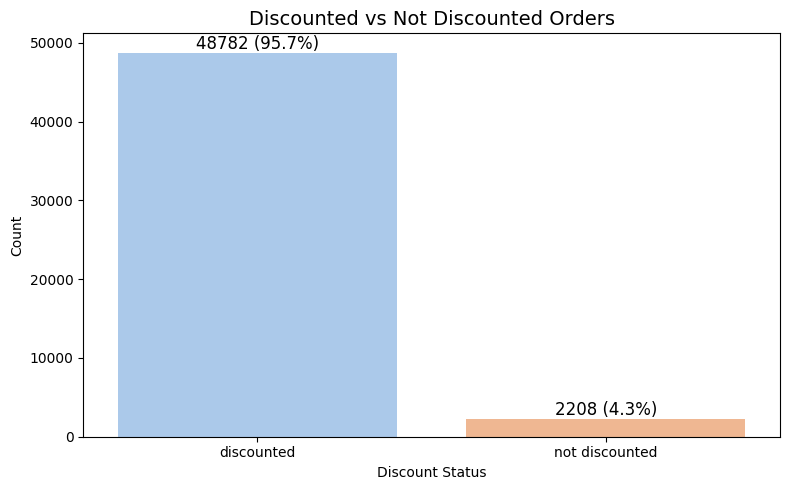

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure 'summary' is sorted in the desired order
summary = summary.reset_index().rename(columns={'index': 'discount_status'})

# Create the bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=summary,
    x='discount_status',
    y='count',
    palette='pastel'
)

# Annotate each bar with count and percentage
for i, row in summary.iterrows():
    ax.text(
        i,                      # x position
        row['count'] + 5,       # y position (slightly above bar)
        f"{int(row['count'])} ({row['percentage']:.1f}%)",  # label
        ha='center', va='bottom', fontsize=12
    )

# Titles and labels
plt.title("Discounted vs Not Discounted Orders", fontsize=14)
plt.xlabel("Discount Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## Discounts Percentages for Each Category

In [ ]:
# Group the main_categories to see how many discount_status
grouped = orderlines_products_discount.groupby(['main_category', 'discount_status']).size().reset_index(name='count')

# See the percentages within each main_category
grouped['percentage'] = grouped.groupby('main_category')['count'].transform(lambda x: (x / x.sum()) * 100)


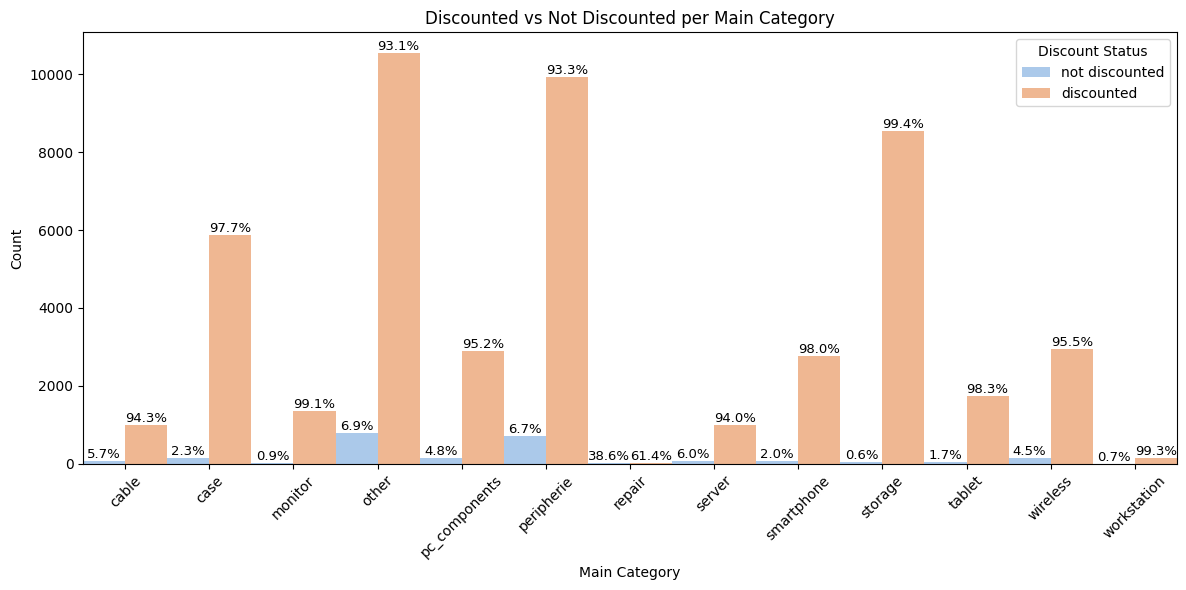

In [ ]:
import seaborn as sns
import numpy as np


# Example: Assuming your grouped DataFrame looks like this:
# grouped = pd.DataFrame({
#     'main_category': [...],
#     'discount_status': [...],  # 'discounted' or 'not discounted'
#     'count': [...],
#     'percentage': [...],  # percentage for each group
# })

# Define the hue order explicitly
hue_order = ['not discounted', 'discounted']

# Ensure discount_status is categorical with fixed order
grouped['discount_status'] = pd.Categorical(grouped['discount_status'], categories=hue_order, ordered=True)

plt.figure(figsize=(12, 6))

# Create the seaborn barplot
ax = sns.barplot(
    data=grouped,
    x='main_category',
    y='count',
    hue='discount_status',
    hue_order=hue_order,
    palette='pastel',
    width=1
)

# Create a lookup dictionary for quick access of count and percentage
lookup = {(row['main_category'], row['discount_status']): (row['count'], row['percentage']) for _, row in grouped.iterrows()}

main_categories = list(grouped['main_category'].unique())

# Convert xticks to numpy array for vectorized operations
xticks = np.array(ax.get_xticks())

# Initialize a dict to hold bars by category index
bars_by_category = {i: [] for i in range(len(main_categories))}

# Assign each bar to its closest main_category based on x position
for bar in ax.patches:
    bar_x_center = bar.get_x() + bar.get_width() / 2
    category_idx = np.argmin(np.abs(xticks - bar_x_center))
    bars_by_category[category_idx].append(bar)

# Now, for each category group of bars, sort them left to right and assign labels based on hue order
for category_idx, bars in bars_by_category.items():
    bars.sort(key=lambda b: b.get_x())  # sort bars from left to right
    main_cat = main_categories[category_idx]

    for hue_idx, bar in enumerate(bars):
        # Guard: Skip bars if there are more bars than expected hues
        if hue_idx >= len(hue_order):
            continue
        discount_status = hue_order[hue_idx]
        count, percentage = lookup.get((main_cat, discount_status), (None, None))
        if percentage is None:
            continue

        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2

        ax.text(
            x,
            height,
            f"{percentage:.1f}%",
            ha='center',
            va='bottom',
            fontsize=9.5
        )

plt.title("Discounted vs Not Discounted per Main Category")
plt.xlabel("Main Category")
plt.ylabel("Count")
plt.legend(title="Discount Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


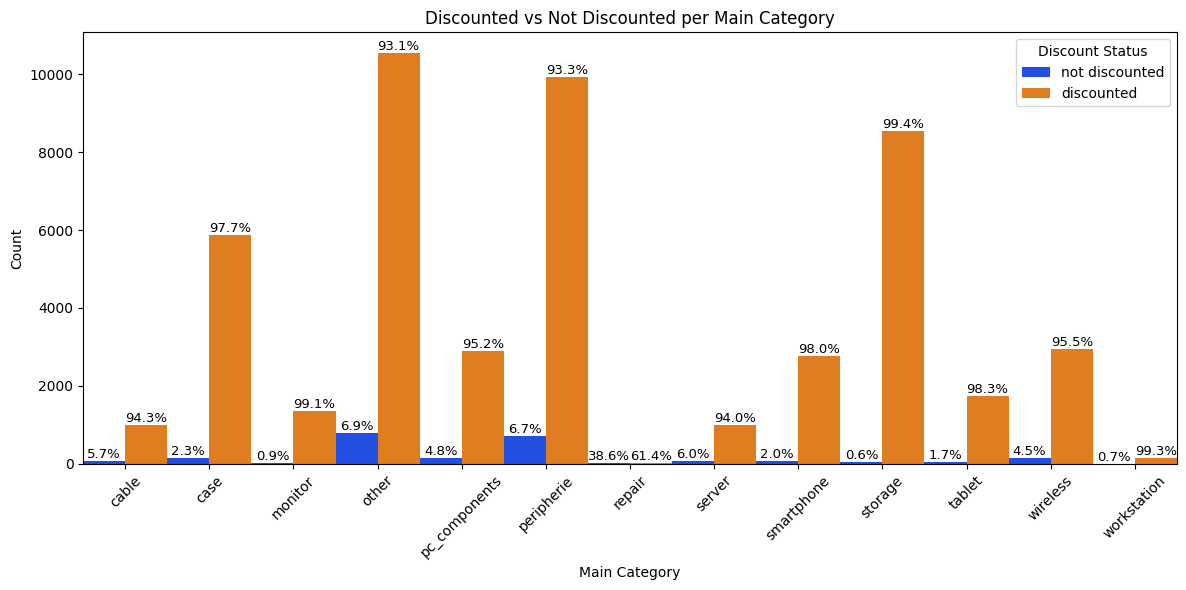

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example: Assuming your grouped DataFrame looks like this:
# grouped = pd.DataFrame({
#     'main_category': [...],
#     'discount_status': [...],  # 'discounted' or 'not discounted'
#     'count': [...],
#     'percentage': [...],  # percentage for each group
# })

# Define the hue order explicitly
hue_order = ['not discounted', 'discounted']

# Ensure discount_status is categorical with fixed order
grouped['discount_status'] = pd.Categorical(grouped['discount_status'], categories=hue_order, ordered=True)

plt.figure(figsize=(12, 6))

# Create the seaborn barplot
ax = sns.barplot(
    data=grouped,
    x='main_category',
    y='count',
    hue='discount_status',
    hue_order=hue_order,
    palette='bright',
    width=1
)

# Create a lookup dictionary for quick access of count and percentage
lookup = {(row['main_category'], row['discount_status']): (row['count'], row['percentage']) for _, row in grouped.iterrows()}

main_categories = list(grouped['main_category'].unique())

# Convert xticks to numpy array for vectorized operations
xticks = np.array(ax.get_xticks())

# Initialize a dict to hold bars by category index
bars_by_category = {i: [] for i in range(len(main_categories))}

# Assign each bar to its closest main_category based on x position
for bar in ax.patches:
    bar_x_center = bar.get_x() + bar.get_width() / 2
    category_idx = np.argmin(np.abs(xticks - bar_x_center))
    bars_by_category[category_idx].append(bar)

# Now, for each category group of bars, sort them left to right and assign labels based on hue order
for category_idx, bars in bars_by_category.items():
    bars.sort(key=lambda b: b.get_x())  # sort bars from left to right
    main_cat = main_categories[category_idx]

    for hue_idx, bar in enumerate(bars):
        # Guard: Skip bars if there are more bars than expected hues
        if hue_idx >= len(hue_order):
            continue
        discount_status = hue_order[hue_idx]
        count, percentage = lookup.get((main_cat, discount_status), (None, None))
        if percentage is None:
            continue

        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2

        ax.text(
            x,
            height,
            f"{percentage:.1f}%",
            ha='center',
            va='bottom',
            fontsize=9.5
        )

plt.title("Discounted vs Not Discounted per Main Category")
plt.xlabel("Main Category")
plt.ylabel("Count")
plt.legend(title="Discount Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Discounts as Percentage (an extra column)

In [ ]:
orderlines_products_discount['discount_percentage'] = (
    (orderlines_products_discount['discount'] / orderlines_products_discount['price']) * 100
).round(2)

<ipython-input-35-6648b4a8c99a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['discount_percentage'] = (


In [ ]:
print((orderlines_products_discount["discount_percentage"] < 0).sum()) # check if any negaive discount

0


In [ ]:
orderlines_products_discount.shape

(50990, 13)

In [ ]:
x = orderlines_products_discount[orderlines_products_discount['discount'] ==0].count()

x


order_id               2208
product_quantity       2208
sku                    2208
unit_price             2208
date                   2208
name                   2208
price                  2208
type                   2205
main_category          2208
sub_category           2208
discount               2208
discount_status        2208
discount_percentage    2208
dtype: int64

# Delivery Cost

## The unit_price_total = orderlines.unit_price * orderlines.product_quantity

In [ ]:
orderlines_df["unit_price_total"] = orderlines_df["product_quantity"] * orderlines_df["unit_price"]
orderlines_df

id  order_id  product_id  product_quantity        sku  unit_price  \
0      1119116    299545           0                 1    OWC0100       47.49   
1      1119119    299546           0                 1    IOT0014       18.99   
2      1119120    295347           0                 1    APP0700       72.19   
3      1119134    299556           0                 1  CRU0039-A       60.90   
4      1119145    299561           0                 1    PEB0015      142.49   
...        ...       ...         ...               ...        ...         ...   
52550  1649447    527035           0                 1    APP0698        9.99   
52551  1649512    527070           0                 2    APP0698        9.99   
52552  1649522    527074           0                 2    APP0698        9.99   
52553  1649565    527096           0                 3    APP0698        9.99   
52554  1649593    527112           0                 1    APP0698        9.99   

                     date  unit_price_total  
0     2017-01-01 01:46:16             47.49  
1     2017-01-01 01:50:34             18.99  
2     2017-01-01 01:54:11             72.19  
3     2017-01-01 02:20:14             60.90  
4     2017-01-01 02:38:50            142.49  
...                   ...               ...  
52550 2018-03-14 11:42:41              9.99  
52551 2018-03-14 11:49:01             19.98  
52552 2018-03-14 11:49:36             19.98  
52553 2018-03-14 11:54:35             29.97  
52554 2018-03-14 11:58:13              9.99  

[52555 rows x 8 columns]

## Group by `id_order`, summarising by the sum of `unit_price_total`

use this tables: orderlines_order_ids.unit_price_total to calculate the delivery prices. compare with total_paid

In [ ]:
orderlines_order_ids = orderlines_df.groupby("order_id", as_index=False)["unit_price_total"].sum()
orderlines_order_ids

order_id  unit_price_total
0        241423            129.16
1        242832             10.77
2        243330             77.99
3        245275            149.00
4        245595            105.98
...         ...               ...
40444    527042             13.99
40445    527070             19.98
40446    527074             19.98
40447    527096             29.97
40448    527112              9.99

[40449 rows x 2 columns]

In [ ]:
orders_df

order_id        created_date  total_paid      state
0        241423 2017-11-06 13:10:02      136.15  Completed
1        242832 2017-12-31 17:40:03       15.76  Completed
2        243330 2017-02-16 10:59:38       84.98  Completed
3        245275 2017-06-28 11:35:37      149.00  Completed
4        245595 2017-01-21 12:52:47      112.97  Completed
...         ...                 ...         ...        ...
40444    527042 2018-03-14 11:47:50       18.98  Completed
40445    527070 2018-03-14 11:50:48       24.97  Completed
40446    527074 2018-03-14 11:51:42       24.97  Completed
40447    527096 2018-03-14 11:58:40       34.96  Completed
40448    527112 2018-03-14 12:03:52       14.98  Completed

[40449 rows x 4 columns]

In [ ]:
merged_orders_df = orders_df.merge(orderlines_order_ids, on="order_id", how="inner")
merged_orders_df

order_id        created_date  total_paid      state  unit_price_total
0        241423 2017-11-06 13:10:02      136.15  Completed            129.16
1        242832 2017-12-31 17:40:03       15.76  Completed             10.77
2        243330 2017-02-16 10:59:38       84.98  Completed             77.99
3        245275 2017-06-28 11:35:37      149.00  Completed            149.00
4        245595 2017-01-21 12:52:47      112.97  Completed            105.98
...         ...                 ...         ...        ...               ...
40444    527042 2018-03-14 11:47:50       18.98  Completed             13.99
40445    527070 2018-03-14 11:50:48       24.97  Completed             19.98
40446    527074 2018-03-14 11:51:42       24.97  Completed             19.98
40447    527096 2018-03-14 11:58:40       34.96  Completed             29.97
40448    527112 2018-03-14 12:03:52       14.98  Completed              9.99

[40449 rows x 5 columns]

In [ ]:
merged_orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40449 entries, 0 to 40448
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          40449 non-null  int64         
 1   created_date      40449 non-null  datetime64[ns]
 2   total_paid        40449 non-null  float64       
 3   state             40449 non-null  object        
 4   unit_price_total  40449 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 1.5+ MB



## Now we can calculate the delivery costs: What is the average difference between `total_paid` and `unit_price_total`?

In [ ]:
# diff_df = orders_df.merge(orderlines_order_ids, left_on="order_id", right_on="order_id")

merged_orders_df["difference"] = merged_orders_df["total_paid"] - merged_orders_df["unit_price_total"]
merged_orders_df.head(10)

order_id        created_date  total_paid      state  unit_price_total  \
0    241423 2017-11-06 13:10:02      136.15  Completed            129.16   
1    242832 2017-12-31 17:40:03       15.76  Completed             10.77   
2    243330 2017-02-16 10:59:38       84.98  Completed             77.99   
3    245275 2017-06-28 11:35:37      149.00  Completed            149.00   
4    245595 2017-01-21 12:52:47      112.97  Completed            105.98   
5    247524 2018-01-09 14:21:34      167.98  Completed            162.99   
6    247643 2017-05-26 11:50:35      153.54  Completed            153.54   
7    250275 2017-11-19 22:34:54       54.99  Completed             51.00   
8    251302 2017-05-10 12:27:33      140.99  Completed            140.99   
9    253220 2017-10-04 19:37:10     1610.00  Completed           1609.99   

   difference  
0        6.99  
1        4.99  
2        6.99  
3        0.00  
4        6.99  
5        4.99  
6        0.00  
7        3.99  
8        0.00  
9        0.01

## The negative Differences

In [ ]:
print((merged_orders_df["difference"] < 0).sum())

763


In [ ]:
print((merged_orders_df["difference"] == 0).sum())

10428


In [ ]:
print((merged_orders_df["difference"] > 0).sum())

29258


In [ ]:
print((merged_orders_df["difference"] < 0.1).sum())

11815


In [ ]:
merged_orders_df.shape[0]

40449

In [ ]:
# Group product_quantity by order_id
product_qty_by_order = orderlines_df.groupby('order_id')['product_quantity'].sum().reset_index()

# Merge total product_quantity into diff_df
merged_orders_df = merged_orders_df.merge(product_qty_by_order, on='order_id', how='left')
merged_orders_df['difference'] = merged_orders_df['difference'].round(2)
merged_orders_df

order_id        created_date  total_paid      state  unit_price_total  \
0        241423 2017-11-06 13:10:02      136.15  Completed            129.16   
1        242832 2017-12-31 17:40:03       15.76  Completed             10.77   
2        243330 2017-02-16 10:59:38       84.98  Completed             77.99   
3        245275 2017-06-28 11:35:37      149.00  Completed            149.00   
4        245595 2017-01-21 12:52:47      112.97  Completed            105.98   
...         ...                 ...         ...        ...               ...   
40444    527042 2018-03-14 11:47:50       18.98  Completed             13.99   
40445    527070 2018-03-14 11:50:48       24.97  Completed             19.98   
40446    527074 2018-03-14 11:51:42       24.97  Completed             19.98   
40447    527096 2018-03-14 11:58:40       34.96  Completed             29.97   
40448    527112 2018-03-14 12:03:52       14.98  Completed              9.99   

       difference  product_quantity  
0            6.99                 1  
1            4.99                 1  
2            6.99                 1  
3            0.00                 1  
4            6.99                 2  
...           ...               ...  
40444        4.99                 1  
40445        4.99                 2  
40446        4.99                 2  
40447        4.99                 3  
40448        4.99                 1  

[40449 rows x 7 columns]

In [ ]:
print(merged_orders_df['product_quantity'].value_counts())

product_quantity
1     29544
2      7072
3      2215
4       837
5       359
6       172
8        57
7        53
10       46
9        32
12        9
11        8
18        6
16        4
20        4
13        4
14        4
27        4
15        4
32        2
35        2
21        2
17        2
30        2
24        1
72        1
33        1
50        1
37        1
Name: count, dtype: int64


In [ ]:
negative_diff_df = merged_orders_df[merged_orders_df["difference"] < 0]
negative_diff_df

order_id        created_date  total_paid      state  unit_price_total  \
26       261978 2017-01-10 00:19:44      109.98  Completed            109.99   
46       279891 2017-01-16 22:59:07       64.99  Completed             69.99   
58       287311 2017-01-29 22:56:57       54.99  Completed             59.99   
79       297220 2017-01-07 15:15:29      112.98  Completed            112.99   
80       297572 2017-01-27 23:59:50       51.99  Completed             56.99   
...         ...                 ...         ...        ...               ...   
36291    503215 2018-01-31 20:21:39       49.00  Completed             54.00   
36306    503261 2018-01-31 22:01:07       49.00  Completed             54.00   
36326    503359 2018-01-31 22:40:34       49.99  Completed             54.99   
37666    511399 2018-02-14 12:33:29      161.99  Completed            162.00   
39381    520191 2018-03-02 16:44:15      149.96  Completed            149.97   

       difference  product_quantity  
26          -0.01                 1  
46          -5.00                 1  
58          -5.00                 1  
79          -0.01                 1  
80          -5.00                 1  
...           ...               ...  
36291       -5.00                 1  
36306       -5.00                 1  
36326       -5.00                 1  
37666       -0.01                 2  
39381       -0.01                 3  

[448 rows x 7 columns]

## Orders which delivery cost more than 0.1

In [ ]:
orders_with_and_without_delivery_costs = merged_orders_df[merged_orders_df["difference"] >= 0]

In [ ]:
orders_with_delivery_costs = merged_orders_df[merged_orders_df["difference"] > 0.1]

In [ ]:
orders_with_delivery_costs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28634 entries, 0 to 40448
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          28634 non-null  int64         
 1   created_date      28634 non-null  datetime64[ns]
 2   total_paid        28634 non-null  float64       
 3   state             28634 non-null  object        
 4   unit_price_total  28634 non-null  float64       
 5   difference        28634 non-null  float64       
 6   product_quantity  28634 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 1.7+ MB


In [ ]:
orders_with_delivery_costs = orders_with_delivery_costs.rename(columns={"difference": "delivery_costs"})


## Delivery Costs as Percentage

In [ ]:
orders_with_delivery_costs['delivery_cost_percentages'] = (
    orders_with_delivery_costs['delivery_costs'] / orders_with_delivery_costs['total_paid']
) * 100

In [ ]:
orders_with_delivery_costs['delivery_cost_percentages']

0         5.134043
1        31.662437
2         8.225465
4         6.187483
5         2.970592
           ...    
40444    26.290832
40445    19.983981
40446    19.983981
40447    14.273455
40448    33.311081
Name: delivery_cost_percentages, Length: 28634, dtype: float64

## Delivery Costs as Percentage AVG Monthly Plot

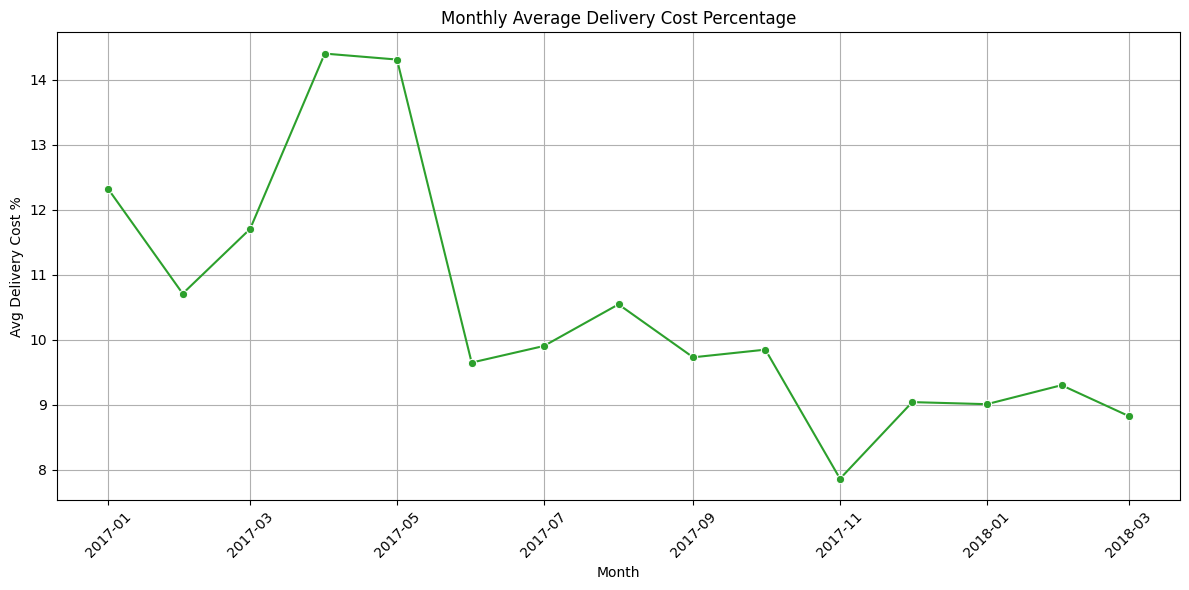

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'period' column with monthly periods as timestamps
orders_with_delivery_costs['period'] = orders_with_delivery_costs['created_date'].dt.to_period('M').dt.to_timestamp()

# Calculate monthly average delivery cost percentage
monthly_avg_delivery_pct = (
    orders_with_delivery_costs
    .groupby('period')['delivery_cost_percentages']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_delivery_pct, x='period', y='delivery_cost_percentages', marker='o', color='tab:green')
plt.title('Monthly Average Delivery Cost Percentage')
plt.xlabel('Month')
plt.ylabel('Avg Delivery Cost %')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Delivery costs over time

In [ ]:
# Ensure 'period' exists in both dataframes
orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)
orders_with_delivery_costs['period'] = orders_with_delivery_costs['created_date'].dt.to_period('M').astype(str)

# Create monthly average discount
monthly_avg_discount = orderlines_products_discount.groupby('period').agg(
    discount_percentage=('discount_percentage', 'mean')
).reset_index()

# Create monthly average delivery cost
monthly_avg_delivery = orders_with_delivery_costs.groupby('period').agg(
    delivery_costs=('delivery_costs', 'mean')
).reset_index()
monthly_avg_delivery = monthly_avg_delivery.rename(columns={'delivery_costs': 'avg_delivery_costs'})


<ipython-input-60-d3b9bf188492>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)


In [ ]:
# For monthly_avg_discount, convert 'period' to year-month string (YYYY-MM)
monthly_avg_discount['period'] = pd.to_datetime(monthly_avg_discount['period']).dt.to_period('M').astype(str)

# For monthly_avg_delivery, ensure 'period' is year-month string (should already be)
monthly_avg_delivery['period'] = pd.to_datetime(monthly_avg_delivery['period']).dt.to_period('M').astype(str)

combined_df = pd.merge(monthly_avg_discount, monthly_avg_delivery, on='period', how='inner')



In [ ]:
combined_df['period'] = pd.to_datetime(combined_df['period'])


<ipython-input-63-57382b724785>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['season'] = 'Regular'
<ipython-input-63-57382b724785>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)


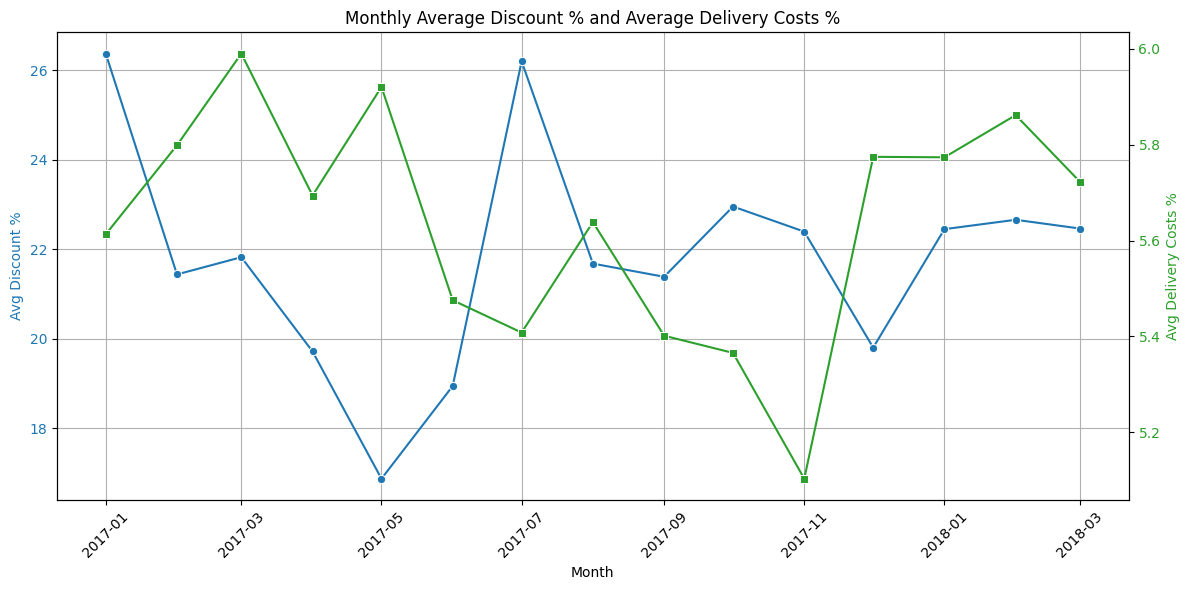

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Season assignment as you had it ---
black_friday_range = ((orderlines_products_discount['date'].dt.month == 11) &
                      (orderlines_products_discount['date'].dt.day >= 24) &
                      (orderlines_products_discount['date'].dt.day <= 30))

christmas_range = ((orderlines_products_discount['date'].dt.month == 12) &
                   (orderlines_products_discount['date'].dt.day >= 20) &
                   (orderlines_products_discount['date'].dt.day <= 26))

orderlines_products_discount['season'] = 'Regular'
orderlines_products_discount.loc[black_friday_range, 'season'] = 'Black Friday'
orderlines_products_discount.loc[christmas_range, 'season'] = 'Christmas'

# --- Create 'period' as YYYY-MM for discount data ---
orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)

# --- Calculate monthly average discount percentage ---
monthly_avg_discount = orderlines_products_discount.groupby('period')['discount_percentage'].mean().reset_index()

# --- For delivery costs data ---
orders_with_delivery_costs['period'] = orders_with_delivery_costs['created_date'].dt.to_period('M').astype(str)

monthly_avg_delivery = orders_with_delivery_costs.groupby('period')['delivery_costs'].mean().reset_index()
monthly_avg_delivery = monthly_avg_delivery.rename(columns={'delivery_costs': 'avg_delivery_costs'})

# --- Fix period formatting for both (ensure YYYY-MM strings) ---
monthly_avg_discount['period'] = pd.to_datetime(monthly_avg_discount['period']).dt.to_period('M').astype(str)
monthly_avg_delivery['period'] = pd.to_datetime(monthly_avg_delivery['period']).dt.to_period('M').astype(str)

# --- Merge on period ---
combined_df = pd.merge(monthly_avg_discount, monthly_avg_delivery, on='period', how='inner')

# --- Convert 'period' to datetime for plotting ---
combined_df['period'] = pd.to_datetime(combined_df['period'])

# --- Plot with dual y-axis ---
fig, ax1 = plt.subplots(figsize=(12, 6))

color1 = 'tab:blue'
sns.lineplot(data=combined_df, x='period', y='discount_percentage', marker='o', ax=ax1, color=color1)
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Discount %', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_title("Monthly Average Discount % and Average Delivery Costs %")
ax1.grid(True)
plt.xticks(rotation=45)

ax2 = ax1.twinx()
color2 = 'tab:green'
sns.lineplot(data=combined_df, x='period', y='avg_delivery_costs', marker='s', ax=ax2, color=color2)
ax2.set_ylabel('Avg Delivery Costs %', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.tight_layout()
plt.show()


with percentages

<ipython-input-64-6b92cd4ae399>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['season'] = 'Regular'
<ipython-input-64-6b92cd4ae399>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)


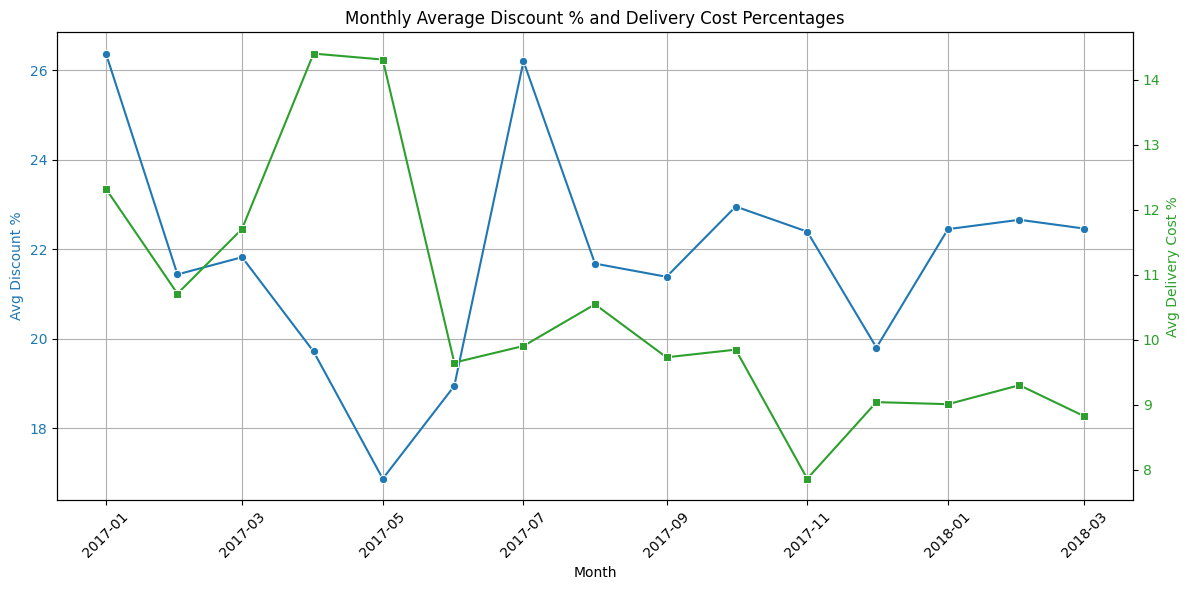

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Season assignment as you had it ---
black_friday_range = ((orderlines_products_discount['date'].dt.month == 11) &
                      (orderlines_products_discount['date'].dt.day >= 24) &
                      (orderlines_products_discount['date'].dt.day <= 30))

christmas_range = ((orderlines_products_discount['date'].dt.month == 12) &
                   (orderlines_products_discount['date'].dt.day >= 20) &
                   (orderlines_products_discount['date'].dt.day <= 26))

orderlines_products_discount['season'] = 'Regular'
orderlines_products_discount.loc[black_friday_range, 'season'] = 'Black Friday'
orderlines_products_discount.loc[christmas_range, 'season'] = 'Christmas'

# --- Create 'period' as YYYY-MM for discount data ---
orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)

# --- Calculate monthly average discount percentage ---
monthly_avg_discount = orderlines_products_discount.groupby('period')['discount_percentage'].mean().reset_index()

# --- For delivery percentages data ---
orders_with_delivery_costs['period'] = orders_with_delivery_costs['created_date'].dt.to_period('M').astype(str)

# Calculate delivery cost percentages if not already calculated
if 'delivery_cost_percentages' not in orders_with_delivery_costs.columns:
    orders_with_delivery_costs['delivery_cost_percentages'] = (
        orders_with_delivery_costs['delivery_costs'] / orders_with_delivery_costs['total_paid'] * 100
    )

monthly_avg_delivery_pct = orders_with_delivery_costs.groupby('period')['delivery_cost_percentages'].mean().reset_index()
monthly_avg_delivery_pct = monthly_avg_delivery_pct.rename(columns={'delivery_cost_percentages': 'avg_delivery_percentages'})

# --- Fix period formatting for both (ensure YYYY-MM strings) ---
monthly_avg_discount['period'] = pd.to_datetime(monthly_avg_discount['period']).dt.to_period('M').astype(str)
monthly_avg_delivery_pct['period'] = pd.to_datetime(monthly_avg_delivery_pct['period']).dt.to_period('M').astype(str)

# --- Merge on period ---
combined_df = pd.merge(monthly_avg_discount, monthly_avg_delivery_pct, on='period', how='inner')

# --- Convert 'period' to datetime for plotting ---
combined_df['period'] = pd.to_datetime(combined_df['period'])

# --- Plot with dual y-axis ---
fig, ax1 = plt.subplots(figsize=(12, 6))

color1 = 'tab:blue'
sns.lineplot(data=combined_df, x='period', y='discount_percentage', marker='o', ax=ax1, color=color1)
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Discount %', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_title("Monthly Average Discount % and Delivery Cost Percentages")
ax1.grid(True)
plt.xticks(rotation=45)

ax2 = ax1.twinx()
color2 = 'tab:green'
sns.lineplot(data=combined_df, x='period', y='avg_delivery_percentages', marker='s', ax=ax2, color=color2)
ax2.set_ylabel('Avg Delivery Cost %', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.tight_layout()
plt.show()


In [ ]:
# Monthly order count line on secondary y-axis
#ax2 = ax1.twinx()
#color2 = 'tab:cyan'
#line2 = sns.lineplot(data=combined_df, x='period', y='order_count', marker='s', ax=ax2, color=color2)
#ax2.set_ylabel('Monthly Order Count', color=color2)
#ax2.tick_params(axis='y', labelcolor=color2)


<ipython-input-66-e77b3eeaa5df>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['season'] = 'Regular'
<ipython-input-66-e77b3eeaa5df>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)


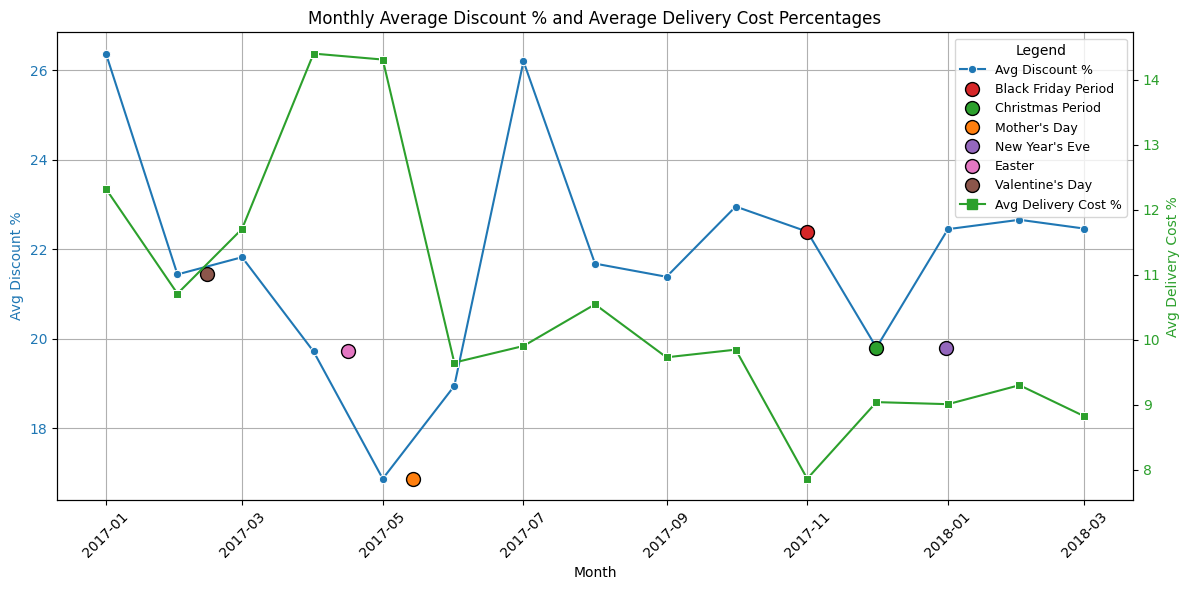

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Season assignment (as you provided) ---
black_friday_range = ((orderlines_products_discount['date'].dt.month == 11) &
                      (orderlines_products_discount['date'].dt.day >= 24) &
                      (orderlines_products_discount['date'].dt.day <= 30))

christmas_range = ((orderlines_products_discount['date'].dt.month == 12) &
                   (orderlines_products_discount['date'].dt.day >= 20) &
                   (orderlines_products_discount['date'].dt.day <= 26))

orderlines_products_discount['season'] = 'Regular'
orderlines_products_discount.loc[black_friday_range, 'season'] = 'Black Friday'
orderlines_products_discount.loc[christmas_range, 'season'] = 'Christmas'

# --- Create 'period' as YYYY-MM ---
orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)

# --- Monthly average discount percentage ---
monthly_avg_discount = orderlines_products_discount.groupby('period')['discount_percentage'].mean().reset_index()

# Add 'season' info to monthly_avg_discount for Black Friday and Christmas periods
monthly_avg_discount['season'] = 'Regular'
monthly_avg_discount.loc[
    monthly_avg_discount['period'].isin(orderlines_products_discount.loc[black_friday_range, 'period']),
    'season'] = 'Black Friday'
monthly_avg_discount.loc[
    monthly_avg_discount['period'].isin(orderlines_products_discount.loc[christmas_range, 'period']),
    'season'] = 'Christmas'

# --- Delivery percentages ---
orders_with_delivery_costs['period'] = orders_with_delivery_costs['created_date'].dt.to_period('M').astype(str)

if 'delivery_cost_percentages' not in orders_with_delivery_costs.columns:
    orders_with_delivery_costs['delivery_cost_percentages'] = (
        orders_with_delivery_costs['delivery_costs'] / orders_with_delivery_costs['total_paid'] * 100
    )

monthly_avg_delivery_pct = orders_with_delivery_costs.groupby('period')['delivery_cost_percentages'].mean().reset_index()
monthly_avg_delivery_pct = monthly_avg_delivery_pct.rename(columns={'delivery_cost_percentages': 'avg_delivery_percentages'})

# Fix period formatting for merging and plotting
monthly_avg_discount['period'] = pd.to_datetime(monthly_avg_discount['period'])
monthly_avg_delivery_pct['period'] = pd.to_datetime(monthly_avg_delivery_pct['period'])

# Merge datasets on period
combined_df = pd.merge(monthly_avg_discount, monthly_avg_delivery_pct, on='period', how='inner')

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot discount percentage line
color1 = 'tab:blue'
line1 = sns.lineplot(data=combined_df, x='period', y='discount_percentage', marker='o', ax=ax1, color=color1, label='Avg Discount %')
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Discount %', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_title("Monthly Average Discount % and Average Delivery Cost Percentages")
ax1.grid(True)
plt.xticks(rotation=45)

# Highlight Black Friday and Christmas dots on discount %
for season, color in {'Black Friday': 'tab:red', 'Christmas': 'tab:green'}.items():
    season_data = combined_df[combined_df['season'] == season]
    ax1.scatter(season_data['period'], season_data['discount_percentage'], s=100, color=color, label=f'{season} Period', zorder=5, edgecolor='black')

# --- Special days to highlight, using exact dates ---
special_days = {
    'Mother\'s Day': '2017-05-14',
    'New Year\'s Eve': '2017-12-31',
    'Easter': '2017-04-16',
    'Valentine\'s Day': '2017-02-14',
}
special_colors = {
    'Mother\'s Day': 'tab:orange',
    'New Year\'s Eve': 'tab:purple',
    'Easter': 'tab:pink',
    'Valentine\'s Day': 'tab:brown',
}

special_days_dt = {k: pd.to_datetime(v) for k, v in special_days.items()}

# Plot dots for special days with exact date on x-axis and average discount % on y
for day, dt_val in special_days_dt.items():
    period_str = dt_val.to_period('M').strftime('%Y-%m')
    day_data = combined_df[combined_df['period'] == pd.to_datetime(period_str)]
    if not day_data.empty:
        y_val = day_data['discount_percentage'].values[0]
        ax1.scatter(dt_val, y_val, s=100, color=special_colors[day], label=day, zorder=6, edgecolor='black')

# Plot delivery percentage on secondary axis
ax2 = ax1.twinx()
color2 = 'tab:green'
line2 = sns.lineplot(data=combined_df, x='period', y='avg_delivery_percentages', marker='s', ax=ax2, color=color2)
ax2.set_ylabel('Avg Delivery Cost %', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Create custom legend handles and labels
handles = [line1.get_lines()[0]]
labels = ['Avg Discount %']

# Add season dots legend handles/labels (avoid duplicates)
for season, color in {'Black Friday': 'tab:red', 'Christmas': 'tab:green'}.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, markeredgecolor='black'))
    labels.append(f'{season} Period')

# Add special days legend
for day, color in special_colors.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, markeredgecolor='black'))
    labels.append(day)

# Add delivery percentage line manually (since no label in line2)
handles.append(plt.Line2D([0], [0], marker='s', color=color2, linestyle='-', markersize=7))
labels.append('Avg Delivery Cost %')

ax1.legend(handles, labels, loc='upper right', title='Legend', fontsize=9, title_fontsize=10)

plt.tight_layout()
plt.show()


## Plot with also zero delivery costs included

In [ ]:
orders_with_and_without_delivery_costs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40001 entries, 0 to 40448
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          40001 non-null  int64         
 1   created_date      40001 non-null  datetime64[ns]
 2   total_paid        40001 non-null  float64       
 3   state             40001 non-null  object        
 4   unit_price_total  40001 non-null  float64       
 5   difference        40001 non-null  float64       
 6   product_quantity  40001 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 2.4+ MB


In [ ]:
orders_with_delivery_costs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28634 entries, 0 to 40448
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   order_id                   28634 non-null  int64         
 1   created_date               28634 non-null  datetime64[ns]
 2   total_paid                 28634 non-null  float64       
 3   state                      28634 non-null  object        
 4   unit_price_total           28634 non-null  float64       
 5   delivery_costs             28634 non-null  float64       
 6   product_quantity           28634 non-null  int64         
 7   delivery_cost_percentages  28634 non-null  float64       
 8   period                     28634 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 2.2+ MB


<ipython-input-69-a979d538858f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['season'] = 'Regular'
<ipython-input-69-a979d538858f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)
<ipython-input-69-a979d538858f>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

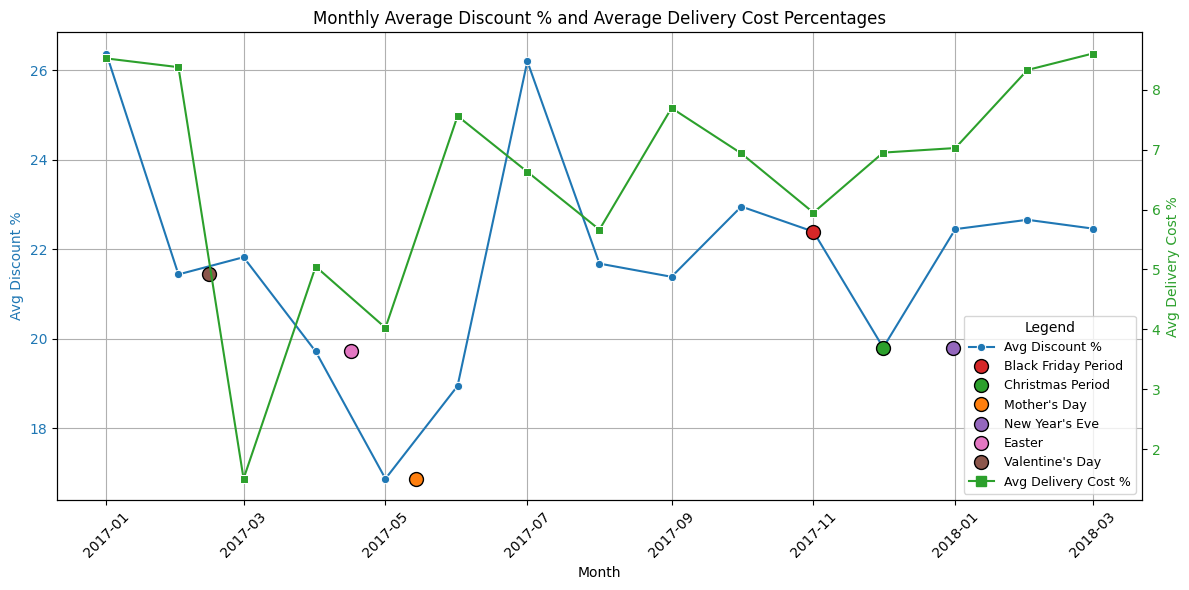

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Season assignment (as you provided) ---
black_friday_range = ((orderlines_products_discount['date'].dt.month == 11) &
                      (orderlines_products_discount['date'].dt.day >= 24) &
                      (orderlines_products_discount['date'].dt.day <= 30))

christmas_range = ((orderlines_products_discount['date'].dt.month == 12) &
                   (orderlines_products_discount['date'].dt.day >= 20) &
                   (orderlines_products_discount['date'].dt.day <= 26))

orderlines_products_discount['season'] = 'Regular'
orderlines_products_discount.loc[black_friday_range, 'season'] = 'Black Friday'
orderlines_products_discount.loc[christmas_range, 'season'] = 'Christmas'

# --- Create 'period' as YYYY-MM ---
orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)

# --- Monthly average discount percentage ---
monthly_avg_discount = orderlines_products_discount.groupby('period')['discount_percentage'].mean().reset_index()

# Add 'season' info to monthly_avg_discount for Black Friday and Christmas periods
monthly_avg_discount['season'] = 'Regular'
monthly_avg_discount.loc[
    monthly_avg_discount['period'].isin(orderlines_products_discount.loc[black_friday_range, 'period']),
    'season'] = 'Black Friday'
monthly_avg_discount.loc[
    monthly_avg_discount['period'].isin(orderlines_products_discount.loc[christmas_range, 'period']),
    'season'] = 'Christmas'

# --- Delivery percentages ---
orders_with_and_without_delivery_costs['period'] = orders_with_and_without_delivery_costs['created_date'].dt.to_period('M').astype(str)

if 'delivery_cost_percentages' not in orders_with_and_without_delivery_costs.columns:
    orders_with_and_without_delivery_costs['delivery_cost_percentages'] = (
        orders_with_and_without_delivery_costs['difference'] / orders_with_and_without_delivery_costs['total_paid'] * 100
    )

monthly_avg_delivery_pct = orders_with_and_without_delivery_costs.groupby('period')['delivery_cost_percentages'].mean().reset_index()
monthly_avg_delivery_pct = monthly_avg_delivery_pct.rename(columns={'delivery_cost_percentages': 'avg_delivery_percentages'})

# Fix period formatting for merging and plotting
monthly_avg_discount['period'] = pd.to_datetime(monthly_avg_discount['period'])
monthly_avg_delivery_pct['period'] = pd.to_datetime(monthly_avg_delivery_pct['period'])

# Merge datasets on period
combined_df = pd.merge(monthly_avg_discount, monthly_avg_delivery_pct, on='period', how='inner')

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot discount percentage line
color1 = 'tab:blue'
line1 = sns.lineplot(data=combined_df, x='period', y='discount_percentage', marker='o', ax=ax1, color=color1, label='Avg Discount %')
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Discount %', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_title("Monthly Average Discount % and Average Delivery Cost Percentages")
ax1.grid(True)
plt.xticks(rotation=45)

# Highlight Black Friday and Christmas dots on discount %
for season, color in {'Black Friday': 'tab:red', 'Christmas': 'tab:green'}.items():
    season_data = combined_df[combined_df['season'] == season]
    ax1.scatter(season_data['period'], season_data['discount_percentage'], s=100, color=color, label=f'{season} Period', zorder=5, edgecolor='black')

# --- Special days to highlight, using exact dates ---
special_days = {
    'Mother\'s Day': '2017-05-14',
    'New Year\'s Eve': '2017-12-31',
    'Easter': '2017-04-16',
    'Valentine\'s Day': '2017-02-14',
}
special_colors = {
    'Mother\'s Day': 'tab:orange',
    'New Year\'s Eve': 'tab:purple',
    'Easter': 'tab:pink',
    'Valentine\'s Day': 'tab:brown',
}

special_days_dt = {k: pd.to_datetime(v) for k, v in special_days.items()}

# Plot dots for special days with exact date on x-axis and average discount % on y
for day, dt_val in special_days_dt.items():
    period_str = dt_val.to_period('M').strftime('%Y-%m')
    day_data = combined_df[combined_df['period'] == pd.to_datetime(period_str)]
    if not day_data.empty:
        y_val = day_data['discount_percentage'].values[0]
        ax1.scatter(dt_val, y_val, s=100, color=special_colors[day], label=day, zorder=6, edgecolor='black')

# Plot delivery percentage on secondary axis
ax2 = ax1.twinx()
color2 = 'tab:green'
line2 = sns.lineplot(data=combined_df, x='period', y='avg_delivery_percentages', marker='s', ax=ax2, color=color2)
ax2.set_ylabel('Avg Delivery Cost %', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Create custom legend handles and labels
handles = [line1.get_lines()[0]]
labels = ['Avg Discount %']

# Add season dots legend handles/labels (avoid duplicates)
for season, color in {'Black Friday': 'tab:red', 'Christmas': 'tab:green'}.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, markeredgecolor='black'))
    labels.append(f'{season} Period')

# Add special days legend
for day, color in special_colors.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, markeredgecolor='black'))
    labels.append(day)

# Add delivery percentage line manually (since no label in line2)
handles.append(plt.Line2D([0], [0], marker='s', color=color2, linestyle='-', markersize=7))
labels.append('Avg Delivery Cost %')

ax1.legend(handles, labels, loc='lower right', title='Legend', fontsize=9, title_fontsize=10)

plt.tight_layout()
plt.show()


## Then we can remove the negative values in difference

In [ ]:
diff_df = merged_orders_df[~merged_orders_df['order_id'].isin(negative_diff_df['order_id'])]

In [ ]:
diff_df.difference.describe()

count    40001.000000
mean         3.987511
std          2.787647
min          0.000000
25%          0.000000
50%          4.990000
75%          6.990000
max         16.970000
Name: difference, dtype: float64

In [ ]:
print(negative_diff_df['product_quantity'].value_counts())

product_quantity
1     208
2     119
3      48
4      26
5      15
6      12
18      4
10      3
9       3
27      2
11      2
7       1
20      1
13      1
12      1
24      1
8       1
Name: count, dtype: int64


# Revenue

##  Total Revenue

In [ ]:
total_revenue = orders_df["total_paid"].sum()
print(f"Total Revenue: {total_revenue:.2f}")

Total Revenue: 7861506.97


## Revenue without Delivery Costs

In [ ]:
total_revenue_without_delivery = merged_orders_df["unit_price_total"].sum()
print(f"Total Revenue: {total_revenue_without_delivery:.2f}") # we used this revenue in further calculaions

Total Revenue: 7702688.96


In [ ]:
merged_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40449 entries, 0 to 40448
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          40449 non-null  int64         
 1   created_date      40449 non-null  datetime64[ns]
 2   total_paid        40449 non-null  float64       
 3   state             40449 non-null  object        
 4   unit_price_total  40449 non-null  float64       
 5   difference        40449 non-null  float64       
 6   product_quantity  40449 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 2.2+ MB


##  Montly revenue

In [ ]:
# A copy with 'date' as index
orders_by_date = merged_orders_df.copy()
orders_by_date

order_id        created_date  total_paid      state  unit_price_total  \
0        241423 2017-11-06 13:10:02      136.15  Completed            129.16   
1        242832 2017-12-31 17:40:03       15.76  Completed             10.77   
2        243330 2017-02-16 10:59:38       84.98  Completed             77.99   
3        245275 2017-06-28 11:35:37      149.00  Completed            149.00   
4        245595 2017-01-21 12:52:47      112.97  Completed            105.98   
...         ...                 ...         ...        ...               ...   
40444    527042 2018-03-14 11:47:50       18.98  Completed             13.99   
40445    527070 2018-03-14 11:50:48       24.97  Completed             19.98   
40446    527074 2018-03-14 11:51:42       24.97  Completed             19.98   
40447    527096 2018-03-14 11:58:40       34.96  Completed             29.97   
40448    527112 2018-03-14 12:03:52       14.98  Completed              9.99   

       difference  product_quantity  
0            6.99                 1  
1            4.99                 1  
2            6.99                 1  
3            0.00                 1  
4            6.99                 2  
...           ...               ...  
40444        4.99                 1  
40445        4.99                 2  
40446        4.99                 2  
40447        4.99                 3  
40448        4.99                 1  

[40449 rows x 7 columns]

In [ ]:
# Set 'created_date' as the index
orders_by_date = merged_orders_df.set_index('created_date').copy()

# Resample on the copy - Monthly
monthly_revenue = orders_by_date.resample('M')['unit_price_total'].sum().reset_index()
monthly_revenue.rename(columns={'unit_price_total': 'monthly_revenue'}, inplace=True)
print(monthly_revenue)

   created_date  monthly_revenue
0    2017-01-31        604682.67
1    2017-02-28        332672.25
2    2017-03-31         24871.01
3    2017-04-30        228300.51
4    2017-05-31        328477.04
5    2017-06-30        285781.62
6    2017-07-31        597748.85
7    2017-08-31        375196.37
8    2017-09-30        381151.39
9    2017-10-31        527136.26
10   2017-11-30       1462848.65
11   2017-12-31        970003.88
12   2018-01-31        860710.09
13   2018-02-28        506635.36
14   2018-03-31        216473.01


<ipython-input-77-7c444bcaec32>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = orders_by_date.resample('M')['unit_price_total'].sum().reset_index()


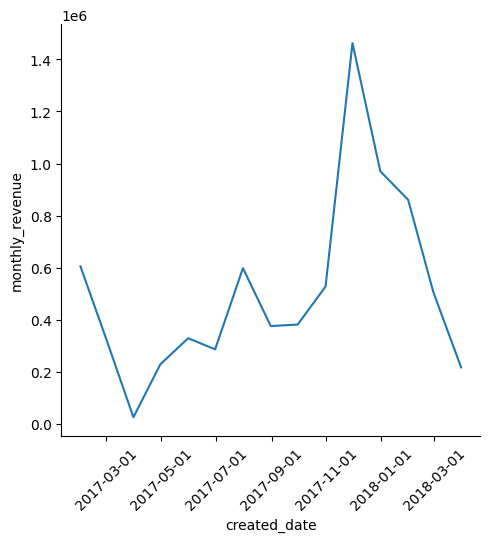

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

x= sns.relplot(kind="line",
            data=monthly_revenue,
            x='created_date',
            y='monthly_revenue');

x.set_xticklabels(rotation=45)

## Weekly revenue

In [ ]:
weekly_revenue = orders_by_date['unit_price_total'].resample('W').sum().reset_index()
weekly_revenue.rename(columns={'unit_price_total': 'weekly_revenue'}, inplace=True)
weekly_revenue

created_date  weekly_revenue
0    2017-01-01        16343.03
1    2017-01-08       142773.97
2    2017-01-15       146899.19
3    2017-01-22       113731.50
4    2017-01-29       118170.86
..          ...             ...
59   2018-02-18       122794.17
60   2018-02-25       106096.58
61   2018-03-04       140419.92
62   2018-03-11       118496.21
63   2018-03-18        37623.88

[64 rows x 2 columns]

#  Revenue without Repair and Open Products

In [ ]:
orderlines_open_mask = (orderlines_products_discount["sub_category"].str.contains("open", na=False)) | (orderlines_products_discount["main_category"].str.contains("repair", na=False))
orderlines_without_open = orderlines_products_discount[~orderlines_open_mask]

In [ ]:
grouped_withOrders = orderlines_without_open.groupby('order_id', as_index=False).size().drop(columns='size')

In [ ]:
orders_without_open = grouped_withOrders.merge(merged_orders_df, on='order_id', how='left')
orders_without_open.shape

(37998, 7)

## Total Revenue without Repair and Open products

In [ ]:
total_revenue = orders_without_open["unit_price_total"].sum()
print(f"Total Revenue: {total_revenue:.2f}")

Total Revenue: 7061195.17


## Monthly Revenue without Repair and Open Products

In [ ]:
# A copy with 'date' as index
orders_by_date = orders_without_open.set_index('created_date').copy()

# Resample on the copy- Monthly
monthly_revenue = orders_by_date['unit_price_total'].resample('M').sum().reset_index()
monthly_revenue.rename(columns={'unit_price_total': 'monthly_revenue'}, inplace=True)
monthly_revenue

<ipython-input-84-071ed9add5a1>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = orders_by_date['unit_price_total'].resample('M').sum().reset_index()


created_date  monthly_revenue
0    2017-01-31        543331.98
1    2017-02-28        285962.24
2    2017-03-31         21383.89
3    2017-04-30        208801.74
4    2017-05-31        288736.72
5    2017-06-30        241955.49
6    2017-07-31        523084.64
7    2017-08-31        343436.03
8    2017-09-30        338898.98
9    2017-10-31        499190.98
10   2017-11-30       1394191.56
11   2017-12-31        905606.15
12   2018-01-31        810375.19
13   2018-02-28        455004.95
14   2018-03-31        201234.63

## Weekly Revenue without Repair and Open Products

In [ ]:
weekly_revenue = orders_by_date['unit_price_total'].resample('W').sum().reset_index()
weekly_revenue.rename(columns={'unit_price_total': 'weekly_revenue'}, inplace=True)
weekly_revenue

created_date  weekly_revenue
0    2017-01-01        12636.88
1    2017-01-08       125724.04
2    2017-01-15       133216.01
3    2017-01-22       103746.28
4    2017-01-29       104700.80
..          ...             ...
59   2018-02-18       111047.92
60   2018-02-25        97104.04
61   2018-03-04       127778.66
62   2018-03-11       108175.10
63   2018-03-18        35990.96

[64 rows x 2 columns]

# Number of Orders

In [ ]:
num_orders = len(orders_df)
num_orders

40449

## How many orders made each month

In [ ]:
orders_by_date = orders_df.set_index('created_date').copy()

In [ ]:
# Monthly
monthly_order_count = orders_by_date['order_id'].resample('M').nunique().reset_index()
monthly_order_count.rename(columns={'order_id': 'order_count'}, inplace=True)
monthly_order_count

<ipython-input-88-8ac229eea730>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_order_count = orders_by_date['order_id'].resample('M').nunique().reset_index()


created_date  order_count
0    2017-01-31         4606
1    2017-02-28         2048
2    2017-03-31          164
3    2017-04-30         1462
4    2017-05-31         1647
5    2017-06-30         1327
6    2017-07-31         3069
7    2017-08-31         2081
8    2017-09-30         1856
9    2017-10-31         2677
10   2017-11-30         6043
11   2017-12-31         4790
12   2018-01-31         4505
13   2018-02-28         2843
14   2018-03-31         1331

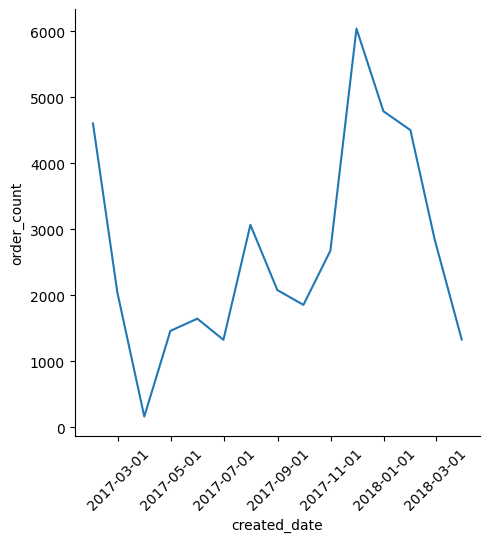

In [ ]:
x= sns.relplot(kind="line",
            data=monthly_order_count,
            x='created_date',
            y='order_count');

x.set_xticklabels(rotation=45)

##  How many orders made each week

In [ ]:
# Weekly count of orders
weekly_order_count = orders_by_date['order_id'].resample('W').nunique().reset_index()
weekly_order_count.rename(columns={'order_id': 'order_count'}, inplace=True)
weekly_order_count

created_date  order_count
0    2017-01-01           96
1    2017-01-08         1150
2    2017-01-15         1193
3    2017-01-22          854
4    2017-01-29          906
..          ...          ...
59   2018-02-18          838
60   2018-02-25          606
61   2018-03-04          809
62   2018-03-11          660
63   2018-03-18          252

[64 rows x 2 columns]

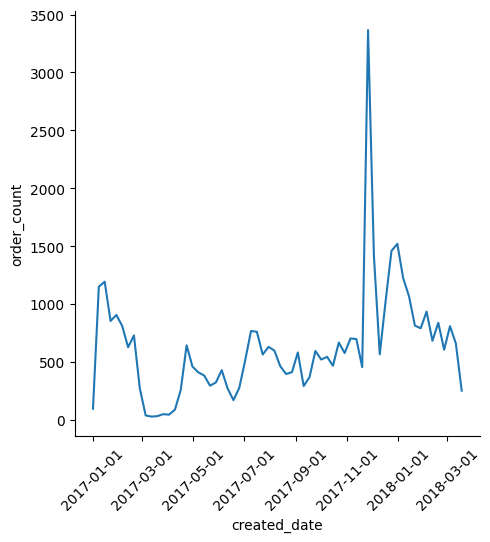

In [ ]:
x= sns.relplot(kind="line",
            data=weekly_order_count,
            x='created_date',
            y='order_count');

x.set_xticklabels(rotation=45)

#  Number of Orders without Repair and Open Products

In [ ]:
num_orders_without_open = len(orders_without_open)
num_orders_without_open

37998

## How many orders made each month - without Rep & Open

In [ ]:
orders_by_date = orders_without_open.set_index('created_date').copy()

In [ ]:
# Monthly
monthly_order_count_without_open = orders_by_date['order_id'].resample('M').nunique().reset_index()
monthly_order_count_without_open.rename(columns={'order_id': 'order_count'}, inplace=True)
monthly_order_count_without_open

<ipython-input-94-92e7f9ec920b>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_order_count_without_open = orders_by_date['order_id'].resample('M').nunique().reset_index()


created_date  order_count
0    2017-01-31         4321
1    2017-02-28         1850
2    2017-03-31          140
3    2017-04-30         1360
4    2017-05-31         1504
5    2017-06-30         1203
6    2017-07-31         2830
7    2017-08-31         1936
8    2017-09-30         1703
9    2017-10-31         2546
10   2017-11-30         5806
11   2017-12-31         4587
12   2018-01-31         4284
13   2018-02-28         2658
14   2018-03-31         1270

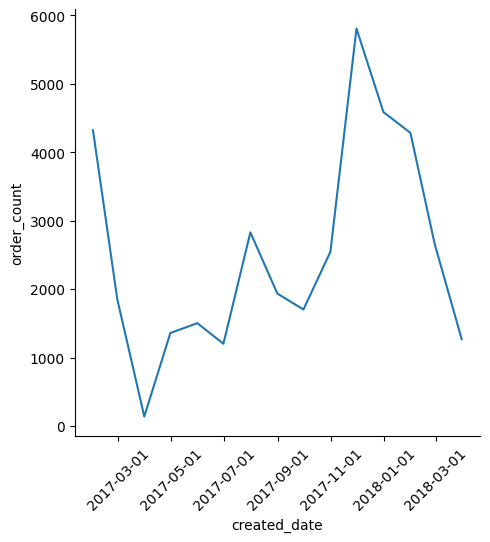

In [ ]:
x= sns.relplot(kind="line",
            data=monthly_order_count_without_open,
            x='created_date',
            y='order_count');

x.set_xticklabels(rotation=45)

## Monthly Orders (total) with Monthly Discounts (average) Percentages

In [ ]:
import pandas as pd

# --- Ensure period columns are in the same string format ---
monthly_avg_discount['period'] = pd.to_datetime(monthly_avg_discount['period']).dt.to_period('M').astype(str)
monthly_avg_delivery['period'] = pd.to_datetime(monthly_avg_delivery['period']).dt.to_period('M').astype(str)

# --- Merge discount and delivery data ---
combined_df = pd.merge(monthly_avg_discount, monthly_avg_delivery, on='period', how='inner')

# --- Prepare and add order count ---
orders_with_delivery_costs['period'] = orders_with_delivery_costs['created_date'].dt.to_period('M').astype(str)
monthly_order_counts = orders_with_delivery_costs.groupby('period').size().reset_index(name='order_count')

# --- Merge order counts into combined_df ---
combined_df = pd.merge(combined_df, monthly_order_counts, on='period', how='left')

# --- Convert period to datetime for plotting ---
combined_df['period'] = pd.to_datetime(combined_df['period'])


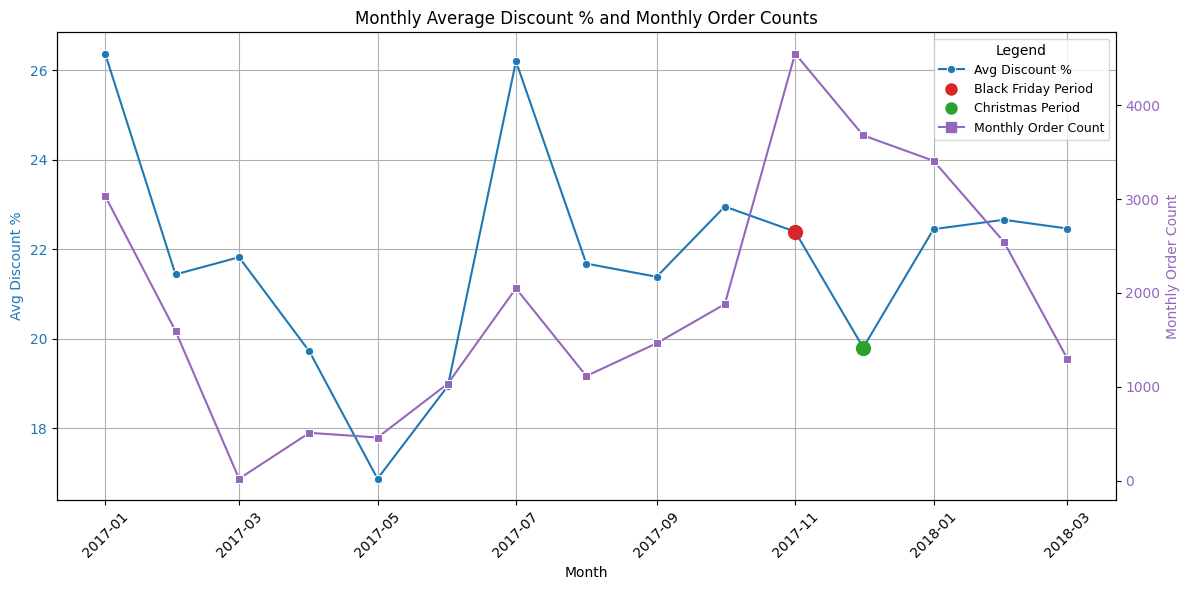

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(12, 6))

# Discount percentage line
color1 = 'tab:blue'
line1 = sns.lineplot(data=combined_df, x='period', y='discount_percentage', marker='o', ax=ax1, color=color1, label='Avg Discount %')
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Discount %', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_title("Monthly Average Discount % and Monthly Order Counts")
ax1.grid(True)
plt.xticks(rotation=45)

# Black Friday and Christmas dots on discount %
season_colors = {'Black Friday': 'tab:red', 'Christmas': 'tab:green'}
for season, color in season_colors.items():
    season_data = combined_df[combined_df['season'] == season]
    ax1.scatter(season_data['period'], season_data['discount_percentage'], s=100, color=color, label=f'{season} Period', zorder=5)

# Monthly order count line on secondary y-axis
ax2 = ax1.twinx()
color2 = 'tab:purple'
line2 = sns.lineplot(data=combined_df, x='period', y='order_count', marker='s', ax=ax2, color=color2)
ax2.set_ylabel('Monthly Order Count', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Manually create legend handles and labels
handles = [line1.get_lines()[0]]  # Avg Discount line
labels = ['Avg Discount %']

for season, color in season_colors.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10))
    labels.append(f'{season} Period')

handles.append(plt.Line2D([0], [0], marker='s', color=color2, linestyle='-', markersize=7))
labels.append('Monthly Order Count')

ax1.legend(handles, labels, loc='upper right', title='Legend', fontsize=9, title_fontsize=10)

plt.tight_layout()
plt.show()


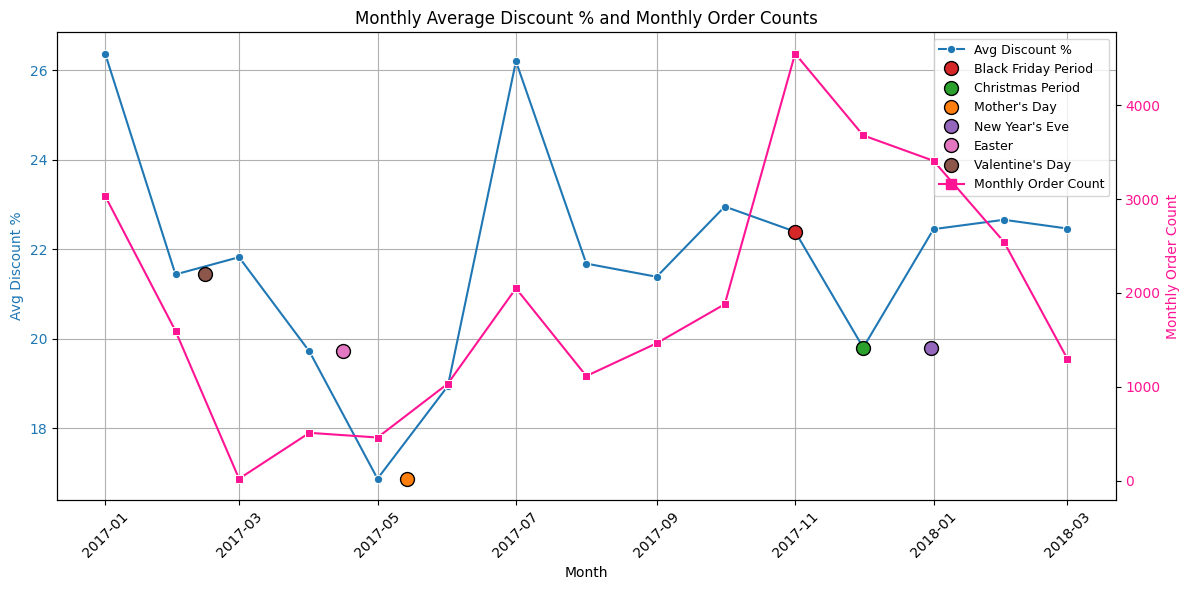

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 1: Ensure 'period' column is uniform in all dataframes ---
monthly_avg_discount['period'] = pd.to_datetime(monthly_avg_discount['period']).dt.to_period('M').astype(str)
monthly_avg_delivery['period'] = pd.to_datetime(monthly_avg_delivery['period']).dt.to_period('M').astype(str)
orders_with_delivery_costs['period'] = orders_with_delivery_costs['created_date'].dt.to_period('M').astype(str)

# --- STEP 2: Compute monthly order count ---
monthly_order_counts = orders_with_delivery_costs.groupby('period').size().reset_index(name='order_count')

# --- STEP 3: Merge all into combined_df ---
combined_df = pd.merge(monthly_avg_discount, monthly_avg_delivery, on='period', how='inner')
combined_df = pd.merge(combined_df, monthly_order_counts, on='period', how='left')
combined_df['period'] = pd.to_datetime(combined_df['period'])

# --- STEP 4: Plotting ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary axis: Discount %
color1 = 'tab:blue'
line1 = sns.lineplot(data=combined_df, x='period', y='discount_percentage', marker='o', ax=ax1, color=color1, label='Avg Discount %')
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Discount %', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_title("Monthly Average Discount % and Monthly Order Counts")
ax1.grid(True)
plt.xticks(rotation=45)

# Season dots
season_colors = {'Black Friday': 'tab:red', 'Christmas': 'tab:green'}
for season, color in season_colors.items():
    season_data = combined_df[combined_df['season'] == season]
    ax1.scatter(season_data['period'], season_data['discount_percentage'], s=100, color=color, label=f'{season} Period', zorder=5, edgecolor='black')

# Special day dots
special_days = {
    'Mother\'s Day': '2017-05-14',
    'New Year\'s Eve': '2017-12-31',
    'Easter': '2017-04-16',
    'Valentine\'s Day': '2017-02-14',
}
special_colors = {
    'Mother\'s Day': 'tab:orange',
    'New Year\'s Eve': 'tab:purple',
    'Easter': 'tab:pink',
    'Valentine\'s Day': 'tab:brown',
}
for day, date_str in special_days.items():
    dt_val = pd.to_datetime(date_str)
    period_val = dt_val.to_period('M').to_timestamp()
    row = combined_df[combined_df['period'] == period_val]
    if not row.empty:
        y_val = row['discount_percentage'].values[0]
        ax1.scatter(dt_val, y_val, s=100, color=special_colors[day], label=day, zorder=6, edgecolor='black')

# Secondary axis: Monthly order count
ax2 = ax1.twinx()
color2 = 'deeppink'
line2 = sns.lineplot(data=combined_df, x='period', y='order_count', marker='s', ax=ax2, color=color2)
ax2.set_ylabel('Monthly Order Count', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Custom legend
handles = [line1.get_lines()[0]]
labels = ['Avg Discount %']

for season, color in season_colors.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, markeredgecolor='black'))
    labels.append(f'{season} Period')

for day, color in special_colors.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, markeredgecolor='black'))
    labels.append(day)

handles.append(plt.Line2D([0], [0], marker='s', color=color2, linestyle='-', markersize=7))
labels.append('Monthly Order Count')

ax1.legend(handles, labels, loc='upper right', fontsize=9, title_fontsize=10)

plt.tight_layout()
plt.show()


#Monthly Avg Discount X Avg Revenue

       period        season
0  2017-01-01           NaN
1  2017-02-01           NaN
2  2017-03-01           NaN
3  2017-04-01           NaN
4  2017-05-01           NaN
5  2017-06-01           NaN
6  2017-07-01           NaN
7  2017-08-01           NaN
8  2017-09-01           NaN
9  2017-10-01           NaN
10 2017-11-01  Black Friday
11 2017-12-01     Christmas
12 2018-01-01           NaN
13 2018-02-01           NaN
14 2018-03-01           NaN
Plotting season Black Friday dots at:
       period  discount_percentage
10 2017-11-01            22.395718
Plotting season Christmas dots at:
       period  discount_percentage
11 2017-12-01            19.805257


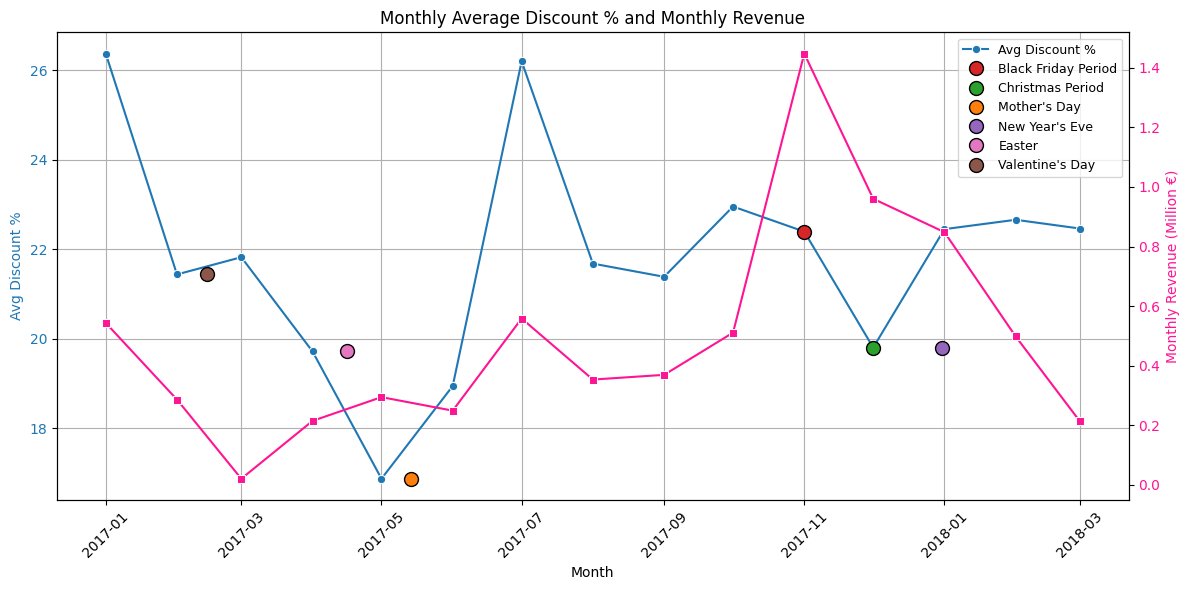

In [ ]:
# Copy your dataframe
df = orderlines_products_discount.copy()

# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# Create 'period' column for monthly grouping (start of month)
df['period'] = df['date'].dt.to_period('M').dt.to_timestamp()

# Calculate monthly average discount percentage
monthly_discount = df.groupby('period')['discount_percentage'].mean().reset_index()

# Calculate monthly total revenue: sum of (unit_price * product_quantity)
df['revenue'] = df['unit_price'] * df['product_quantity']
monthly_revenue = df.groupby('period')['revenue'].sum().reset_index()

# Merge discount and revenue into one dataframe
combined_df = monthly_discount.merge(monthly_revenue, on='period', how='left')

# Convert revenue to millions
combined_df['monthly_revenue_million'] = combined_df['revenue'] / 1_000_000

# --- Define season assignment function ---
def get_season(date):
    # date is Timestamp at start of month (e.g., 2017-11-01)
    # Black Friday is late November, so we check if period is November 2017
    if date == pd.Timestamp('2017-11-01'):
        return 'Black Friday'
    # Christmas season is December 2017
    elif date == pd.Timestamp('2017-12-01'):
        return 'Christmas'
    else:
        return np.nan

combined_df['season'] = combined_df['period'].apply(get_season)

# DEBUG: Check what periods and seasons you have
print(combined_df[['period', 'season']])

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Discount percentage line
color1 = 'tab:blue'
line1 = sns.lineplot(data=combined_df, x='period', y='discount_percentage', marker='o', ax=ax1, color=color1, label='Avg Discount %')
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Discount %', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_title("Monthly Average Discount % and Monthly Revenue")
ax1.grid(True)
plt.xticks(rotation=45)

# Black Friday and Christmas dots on discount %
season_colors = {'Black Friday': 'tab:red', 'Christmas': 'tab:green'}

for season, color in season_colors.items():
    season_data = combined_df[combined_df['season'] == season]
    print(f"Plotting season {season} dots at:")
    print(season_data[['period', 'discount_percentage']])  # DEBUG to confirm data
    ax1.scatter(season_data['period'], season_data['discount_percentage'], s=100, color=color, label=f'{season} Period', edgecolor='black', zorder=5)

# Special days to highlight
special_days = {
    'Mother\'s Day': '2017-05-14',
    'New Year\'s Eve': '2017-12-31',
    'Easter': '2017-04-16',
    'Valentine\'s Day': '2017-02-14',
}
special_colors = {
    'Mother\'s Day': 'tab:orange',
    'New Year\'s Eve': 'tab:purple',
    'Easter': 'tab:pink',
    'Valentine\'s Day': 'tab:brown',
}

special_days_dt = {k: pd.to_datetime(v) for k, v in special_days.items()}

# Plot dots for special days on discount %
for day, dt_val in special_days_dt.items():
    period_start = dt_val.to_period('M').to_timestamp()
    day_data = combined_df[combined_df['period'] == period_start]
    if not day_data.empty:
        y_val = day_data['discount_percentage'].values[0]
        ax1.scatter(dt_val, y_val, s=100, color=special_colors[day], label=day, zorder=6, edgecolor='black')

# Monthly revenue line on secondary y-axis
ax2 = ax1.twinx()
color2 = 'deeppink'
line2 = sns.lineplot(data=combined_df, x='period', y='monthly_revenue_million', marker='s', ax=ax2, color=color2)
ax2.set_ylabel('Monthly Revenue (Million €)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Create legend manually to avoid duplicate 'Monthly Revenue' label
handles = [line1.get_lines()[0]]  # Avg Discount line
labels = ['Avg Discount %']

for season, color in season_colors.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, markeredgecolor='black'))
    labels.append(f'{season} Period')

for day, color in special_colors.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, markeredgecolor='black'))
    labels.append(day)

ax1.legend(handles, labels, loc='upper right', fontsize=9, title_fontsize=10)

plt.tight_layout()
plt.show()


## How many orders made each week - without Rep & Open

In [ ]:
# Weekly
weekly_order_count_without_open = orders_by_date['order_id'].resample('W').nunique().reset_index()
weekly_order_count_without_open.rename(columns={'order_id': 'order_count'}, inplace=True)
weekly_order_count_without_open

created_date  order_count
0    2017-01-01           89
1    2017-01-08         1076
2    2017-01-15         1127
3    2017-01-22          792
4    2017-01-29          854
..          ...          ...
59   2018-02-18          797
60   2018-02-25          571
61   2018-03-04          765
62   2018-03-11          621
63   2018-03-18          246

[64 rows x 2 columns]

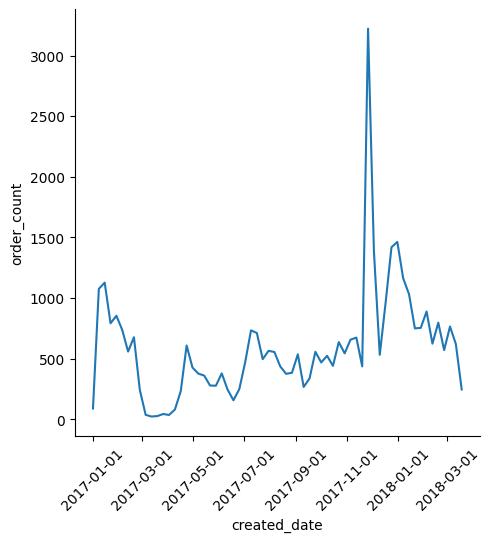

In [ ]:
x= sns.relplot(kind="line",
            data=weekly_order_count_without_open,
            x='created_date',
            y='order_count');

x.set_xticklabels(rotation=45)

#Monthly Avg Discount X Avg Order Prices

# Variations. one product sometimes sold with different prices

In [ ]:
merged_orders_df

order_id        created_date  total_paid      state  unit_price_total  \
0        241423 2017-11-06 13:10:02      136.15  Completed            129.16   
1        242832 2017-12-31 17:40:03       15.76  Completed             10.77   
2        243330 2017-02-16 10:59:38       84.98  Completed             77.99   
3        245275 2017-06-28 11:35:37      149.00  Completed            149.00   
4        245595 2017-01-21 12:52:47      112.97  Completed            105.98   
...         ...                 ...         ...        ...               ...   
40444    527042 2018-03-14 11:47:50       18.98  Completed             13.99   
40445    527070 2018-03-14 11:50:48       24.97  Completed             19.98   
40446    527074 2018-03-14 11:51:42       24.97  Completed             19.98   
40447    527096 2018-03-14 11:58:40       34.96  Completed             29.97   
40448    527112 2018-03-14 12:03:52       14.98  Completed              9.99   

       difference  product_quantity  
0            6.99                 1  
1            4.99                 1  
2            6.99                 1  
3            0.00                 1  
4            6.99                 2  
...           ...               ...  
40444        4.99                 1  
40445        4.99                 2  
40446        4.99                 2  
40447        4.99                 3  
40448        4.99                 1  

[40449 rows x 7 columns]

In [ ]:
price_variations = orderlines_products_discount.groupby('sku')['unit_price'].unique().reset_index()
price_variations

sku            unit_price
0     8MO0001-A               [12.96]
1     8MO0003-A               [12.85]
2       8MO0007        [23.99, 19.99]
3       8MO0008        [23.99, 19.99]
4       8MO0009  [23.99, 16.99, 14.7]
...         ...                   ...
5038    ZAG0040               [26.99]
5039    ZAG0041               [19.99]
5040    ZAG0042               [19.99]
5041    ZEP0007              [125.99]
5042    par0072       [199.0, 209.99]

[5043 rows x 2 columns]

# Find and Analyse the Most Sold Product in the Database

In [ ]:
# Count distinct unit prices per SKU
sku_price_counts = orderlines_products_discount.groupby('sku')['unit_price'].nunique().reset_index()

# Rename for clarity
sku_price_counts = sku_price_counts.rename(columns={'unit_price': 'num_distinct_unit_prices'})

# Sort to find the SKUs with the most unit price variations
sku_price_counts = sku_price_counts.sort_values(by='num_distinct_unit_prices', ascending=False)

top_variable_price_skus = sku_price_counts.head(10)
print(top_variable_price_skus)


            sku  num_distinct_unit_prices
3878    SAM0074                        40
4854    WDT0183                        28
2223    LAC0185                        26
4870    WDT0249                        25
4850    WDT0141                        24
1198  CRU0026-2                        24
2253    LAC0212                        24
3877    SAM0073                        23
4849    WDT0140                        23
4886    WDT0318                        22


In [ ]:
orderlines_products_discount[orderlines_products_discount['sku'] == 'SAM0074']['unit_price'].unique()


array([153.89, 155.99, 169.99, 161.99, 156.74, 136.36, 164.99, 165.15,
       162.99, 154.84, 167.99, 159.59, 163.99, 165.99, 150.5 , 156.99,
       153.99, 160.58, 155.73, 161.58, 152.88, 155.58, 158.78, 149.8 ,
       149.34, 149.99, 154.99, 154.95, 149.9 , 148.69, 144.99, 142.99,
       143.99, 139.99, 137.99, 136.99, 134.99, 132.43, 132.03, 135.9 ])

In [ ]:
sku_info = orderlines_products_discount[orderlines_products_discount['sku'] == 'SAM0074']

sku_info[['name', 'main_category']].drop_duplicates()


name main_category
79  Samsung 850 EVO SSD Disk 500GB       storage

In [ ]:
orderlines_products_discount.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50990 entries, 0 to 52554
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             50990 non-null  int64         
 1   product_quantity     50990 non-null  int64         
 2   sku                  50990 non-null  object        
 3   unit_price           50990 non-null  float64       
 4   date                 50990 non-null  datetime64[ns]
 5   name                 50990 non-null  object        
 6   price                50990 non-null  float64       
 7   type                 50983 non-null  object        
 8   main_category        50990 non-null  object        
 9   sub_category         50990 non-null  object        
 10  discount             50990 non-null  float64       
 11  discount_status      50990 non-null  object        
 12  discount_percentage  50990 non-null  float64       
 13  period               50990 non-null 

## Monthly Avg Unit Price and Avg Discount % Over Time for SKU

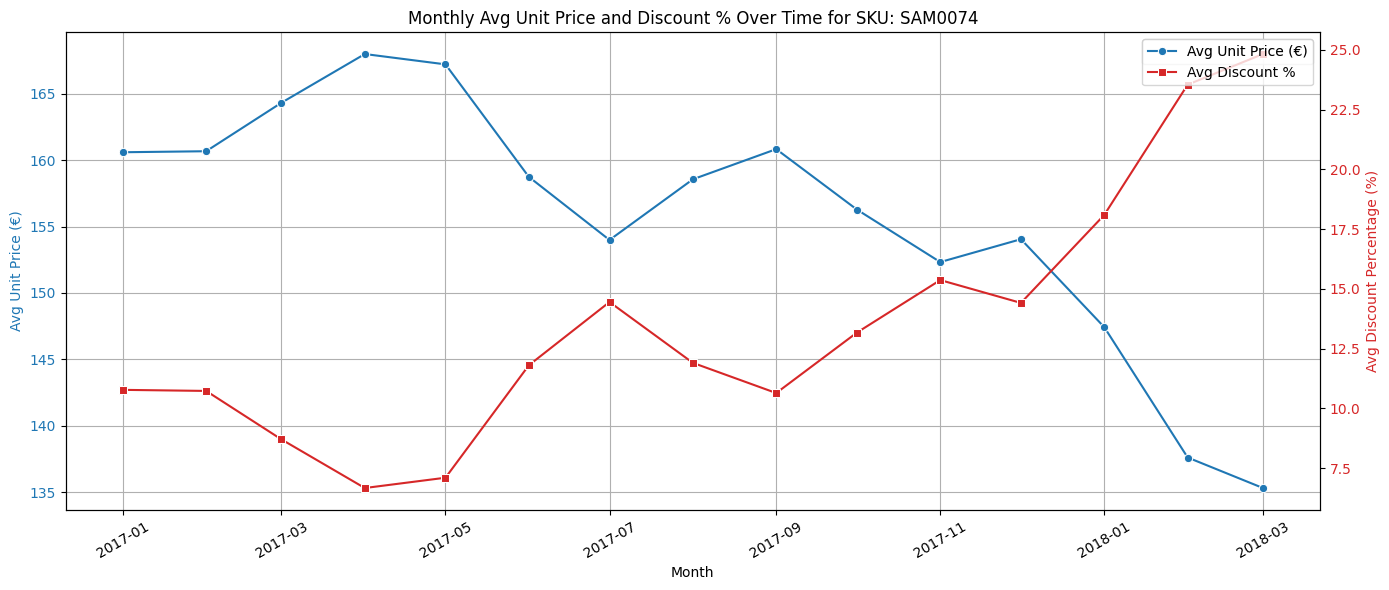

In [ ]:
# Filter for the SKU
sku = 'SAM0074'
sku_df = orderlines_products_discount[orderlines_products_discount['sku'] == sku].copy()

# Convert to datetime if not already
sku_df['date'] = pd.to_datetime(sku_df['date'])

# Create 'period' column for monthly grouping (year-month)
sku_df['period'] = sku_df['date'].dt.to_period('M').dt.to_timestamp()

# Calculate monthly averages
monthly_avg = sku_df.groupby('period').agg({
    'unit_price': 'mean',
    'discount_percentage': 'mean'  # Changed here from 'revenue' to 'discount_percentage'
}).reset_index()

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot average unit_price on left y-axis with label
color1 = 'tab:blue'
line1 = sns.lineplot(data=monthly_avg, x='period', y='unit_price', ax=ax1, color=color1, marker='o', label='Avg Unit Price (€)')
ax1.set_ylabel('Avg Unit Price (€)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlabel('Month')
ax1.grid(True)
ax1.set_title(f"Monthly Avg Unit Price and Discount % Over Time for SKU: {sku}")

# Rotate x-axis labels 30 degrees
for label in ax1.get_xticklabels():
    label.set_rotation(30)

# Plot average discount_percentage on right y-axis with label
ax2 = ax1.twinx()
color2 = 'tab:red'
line2 = sns.lineplot(data=monthly_avg, x='period', y='discount_percentage', ax=ax2, color=color2, marker='s', label='Avg Discount %')
ax2.set_ylabel('Avg Discount Percentage (%)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Combine legends from both axes
lines = line1.get_lines() + line2.get_lines()
labels = [line.get_label() for line in lines]
ax2.legend(lines, labels, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


## Monthly Avg Unit Price and Quantity of Orders Over Time for SKU

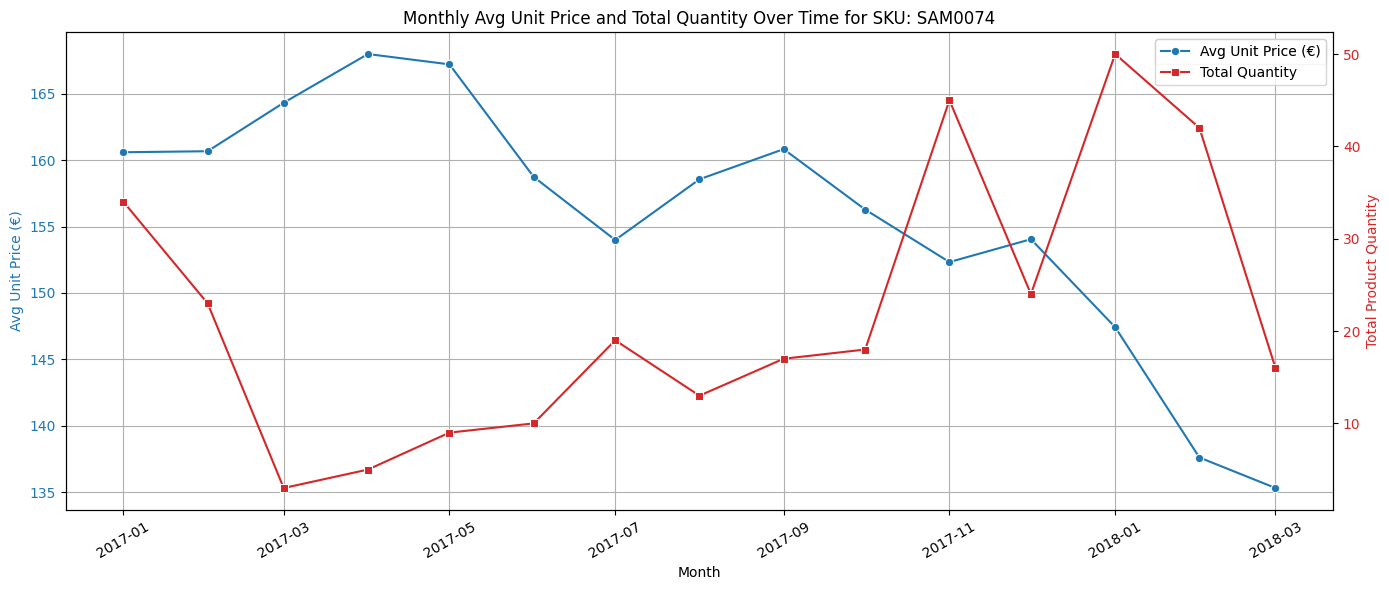

In [ ]:
# Filter for the SKU
sku = 'SAM0074'
sku_df = orderlines_products_discount[orderlines_products_discount['sku'] == sku].copy()

# Convert to datetime if not already
sku_df['date'] = pd.to_datetime(sku_df['date'])

# Create 'period' column for monthly grouping (year-month)
sku_df['period'] = sku_df['date'].dt.to_period('M').dt.to_timestamp()

# Calculate monthly averages for unit_price and sum of product_quantity (or mean if you want average quantity)
monthly_avg = sku_df.groupby('period').agg({
    'unit_price': 'mean',
    'product_quantity': 'sum'  # Using sum to get total quantity sold per month
}).reset_index()

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot average unit_price on left y-axis with label
color1 = 'tab:blue'
line1 = sns.lineplot(data=monthly_avg, x='period', y='unit_price', ax=ax1, color=color1, marker='o', label='Avg Unit Price (€)')
ax1.set_ylabel('Avg Unit Price (€)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlabel('Month')
ax1.grid(True)
ax1.set_title(f"Monthly Avg Unit Price and Total Quantity Over Time for SKU: {sku}")

# Rotate x-axis labels 30 degrees
for label in ax1.get_xticklabels():
    label.set_rotation(30)

# Plot total product_quantity on right y-axis with label
ax2 = ax1.twinx()
color2 = 'tab:red'
line2 = sns.lineplot(data=monthly_avg, x='period', y='product_quantity', ax=ax2, color=color2, marker='s', label='Total Quantity')
ax2.set_ylabel('Total Product Quantity', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Combine legends from both axes
lines = line1.get_lines() + line2.get_lines()
labels = [line.get_label() for line in lines]
ax2.legend(lines, labels, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


with average discount

<ipython-input-110-b7188263d525>:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


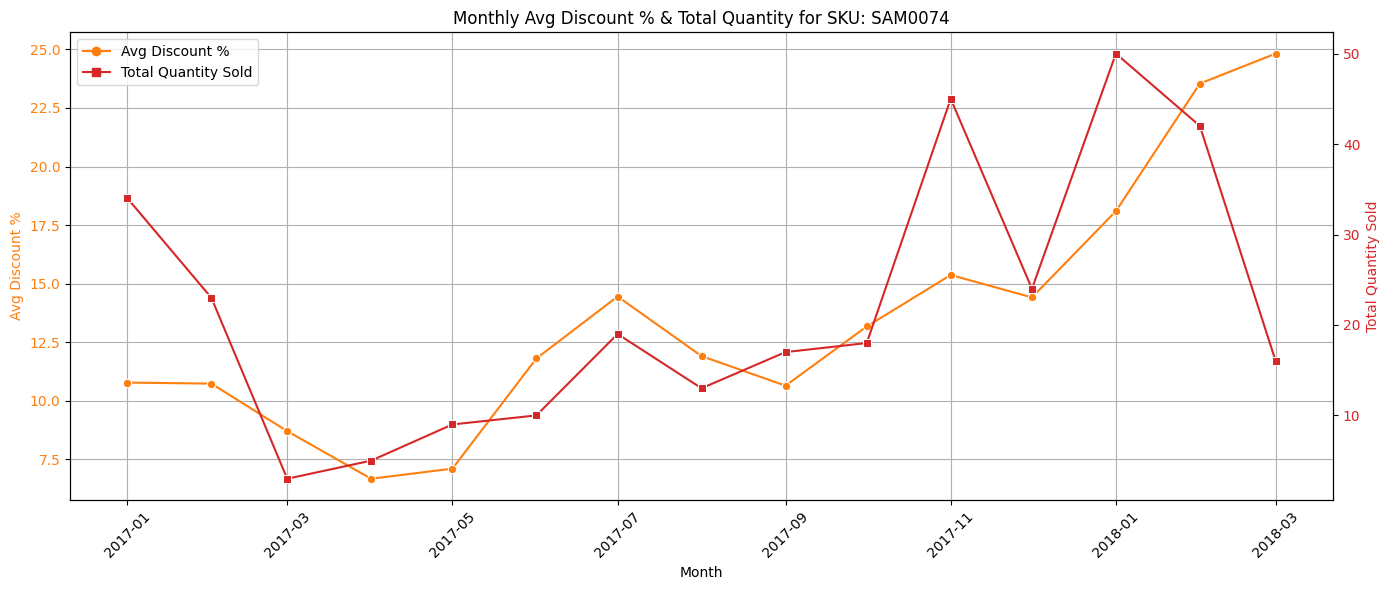

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for the specific SKU
sku = 'SAM0074'
sku_df = orderlines_products_discount[orderlines_products_discount['sku'] == sku].copy()

# Ensure datetime
sku_df['date'] = pd.to_datetime(sku_df['date'])

# Create monthly period
sku_df['period'] = sku_df['date'].dt.to_period('M').astype(str)

# Group by month: calculate average discount % and total quantity
monthly_stats = (
    sku_df.groupby('period').agg({
        'discount_percentage': 'mean',
        'product_quantity': 'sum'
    }).reset_index()
)

# Convert period to datetime for plotting
monthly_stats['period'] = pd.to_datetime(monthly_stats['period'])

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left y-axis: Avg discount %
color1 = 'tab:orange'
sns.lineplot(data=monthly_stats, x='period', y='discount_percentage', ax=ax1,
             color=color1, marker='o')
ax1.set_ylabel('Avg Discount %', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlabel('Month')
ax1.set_title(f"Monthly Avg Discount % & Total Quantity for SKU: {sku}")
ax1.grid(True)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Right y-axis: Total quantity
ax2 = ax1.twinx()
color2 = 'tab:red'
sns.lineplot(data=monthly_stats, x='period', y='product_quantity', ax=ax2,
             color=color2, marker='s')
ax2.set_ylabel('Total Quantity Sold', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Custom legend (manual)
custom_lines = [
    plt.Line2D([0], [0], color=color1, marker='o', label='Avg Discount %'),
    plt.Line2D([0], [0], color=color2, marker='s', label='Total Quantity Sold')
]
ax1.legend(handles=custom_lines, loc='upper left')

plt.tight_layout()
plt.show()


with special days

<ipython-input-111-8ab61d89629c>:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


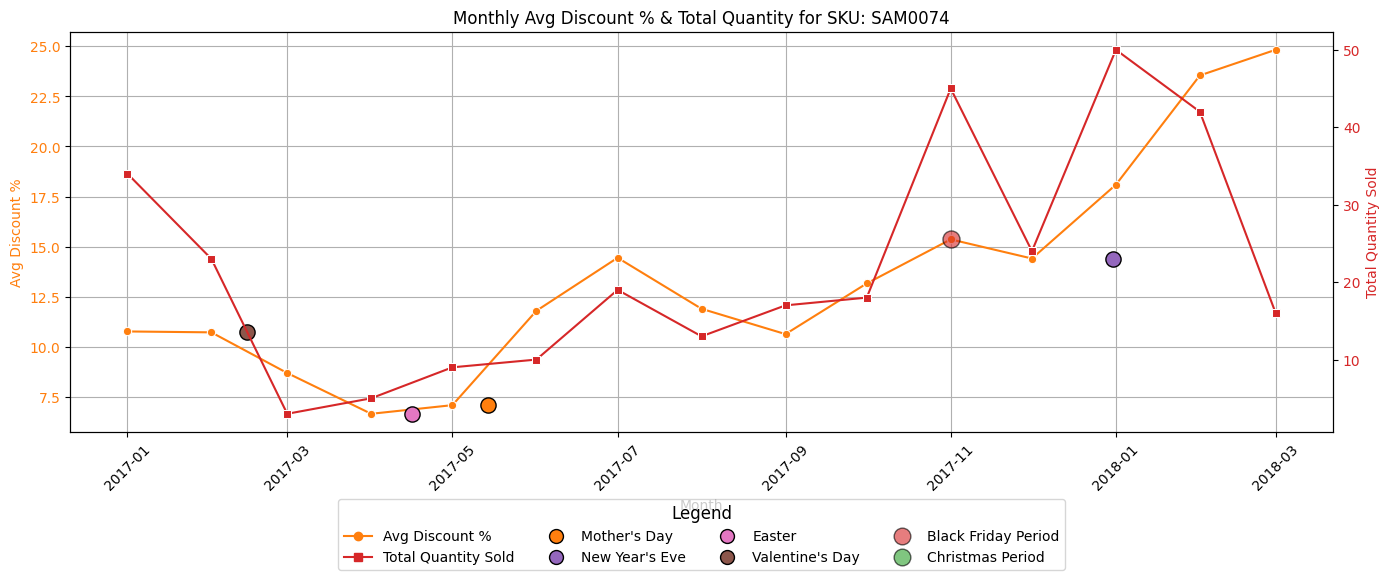

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for the specific SKU
sku = 'SAM0074'
sku_df = orderlines_products_discount[orderlines_products_discount['sku'] == sku].copy()

# Ensure datetime
sku_df['date'] = pd.to_datetime(sku_df['date'])

# Create monthly period
sku_df['period'] = sku_df['date'].dt.to_period('M').astype(str)

# Define Black Friday and Christmas ranges
black_friday_range = (
    (sku_df['date'].dt.month == 11) &
    (sku_df['date'].dt.day >= 24) &
    (sku_df['date'].dt.day <= 30)
)
christmas_range = (
    (sku_df['date'].dt.month == 12) &
    (sku_df['date'].dt.day >= 20) &
    (sku_df['date'].dt.day <= 26)
)

# Assign season column
sku_df['season'] = 'Regular'
sku_df.loc[black_friday_range, 'season'] = 'Black Friday'
sku_df.loc[christmas_range, 'season'] = 'Christmas'

# Group by month: calculate average discount % and total quantity
monthly_stats = (
    sku_df.groupby('period').agg({
        'discount_percentage': 'mean',
        'product_quantity': 'sum',
        'season': lambda x: x.mode()[0]  # most frequent season label in the month
    }).reset_index()
)

# Convert period to datetime for plotting
monthly_stats['period'] = pd.to_datetime(monthly_stats['period'])

# --- Define special days and colors ---
special_days = {
    "Mother's Day": '2017-05-14',
    "New Year's Eve": '2017-12-31',
    "Easter": '2017-04-16',
    "Valentine's Day": '2017-02-14',
}
special_colors = {
    "Mother's Day": 'tab:orange',
    "New Year's Eve": 'tab:purple',
    "Easter": 'tab:pink',
    "Valentine's Day": 'tab:brown',
}
special_days_dt = {k: pd.to_datetime(v) for k, v in special_days.items()}

season_colors = {
    'Black Friday': 'tab:red',
    'Christmas': 'tab:green'
}

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left y-axis: Avg discount %
color1 = 'tab:orange'
sns.lineplot(data=monthly_stats, x='period', y='discount_percentage', ax=ax1,
             color=color1, marker='o', label='Avg Discount %')
ax1.set_ylabel('Avg Discount %', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlabel('Month')
ax1.set_title(f"Monthly Avg Discount % & Total Quantity for SKU: {sku}")
ax1.grid(True)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Plot special days on discount line
for day, dt_val in special_days_dt.items():
    month_start = dt_val.to_period('M').to_timestamp()
    match = monthly_stats[monthly_stats['period'] == month_start]
    if not match.empty:
        y_val = match['discount_percentage'].values[0]
        ax1.scatter(dt_val, y_val, s=120, color=special_colors[day], label=day, edgecolor='black', zorder=6)

# Plot Black Friday and Christmas periods on discount line
for season, color in season_colors.items():
    season_data = monthly_stats[monthly_stats['season'] == season]
    ax1.scatter(season_data['period'], season_data['discount_percentage'], s=150, color=color,
                label=f'{season} Period', edgecolor='black', alpha=0.6, zorder=5)

# Right y-axis: Total quantity
ax2 = ax1.twinx()
color2 = 'tab:red'
sns.lineplot(data=monthly_stats, x='period', y='product_quantity', ax=ax2,
             color=color2, marker='s', label='Total Quantity Sold')
ax2.set_ylabel('Total Quantity Sold', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# ---legends ---
ax1.legend_.remove() if ax1.get_legend() else None
ax2.legend_.remove() if ax2.get_legend() else None

# Custom combined legend below the plot
custom_lines = [
    plt.Line2D([0], [0], color=color1, marker='o', label='Avg Discount %'),
    plt.Line2D([0], [0], color=color2, marker='s', label='Total Quantity Sold')
]

for day, color in special_colors.items():
    custom_lines.append(plt.Line2D([0], [0], marker='o', color='w', label=day,
                                   markerfacecolor=color, markersize=10, markeredgecolor='black'))

for season, color in season_colors.items():
    custom_lines.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{season} Period',
                                   markerfacecolor=color, markersize=12, markeredgecolor='black', alpha=0.6))

ax1.legend(handles=custom_lines, loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=4, fontsize=10, title='Legend', title_fontsize=12)

plt.tight_layout()
plt.show()


## This plot shows Black Friday and Christmas on the day 25th November and 25th December.

<ipython-input-112-fe5e518cabd7>:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


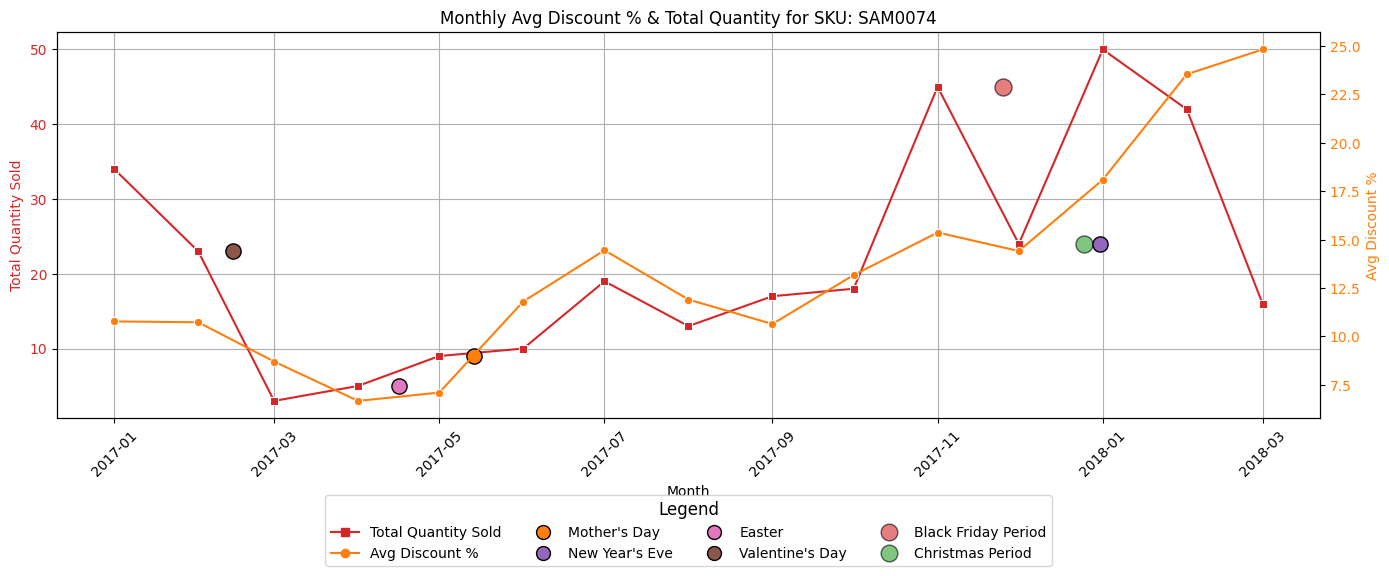

In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# This plot shows Black Friday and Christmas on the day 25th November and 25th December.
# Not on the monthly average. because of they are periods and not one day, soi assigned them to specific days

# Filter for the specific SKU
sku = 'SAM0074'
sku_df = orderlines_products_discount[orderlines_products_discount['sku'] == sku].copy()

# Ensure datetime
sku_df['date'] = pd.to_datetime(sku_df['date'])

# Create monthly period
sku_df['period'] = sku_df['date'].dt.to_period('M').astype(str)

# Define Black Friday and Christmas ranges
black_friday_range = (
    (sku_df['date'].dt.month == 11) &
    (sku_df['date'].dt.day >= 24) &
    (sku_df['date'].dt.day <= 30)
)
christmas_range = (
    (sku_df['date'].dt.month == 12) &
    (sku_df['date'].dt.day >= 20) &
    (sku_df['date'].dt.day <= 26)
)

# Assign season column
sku_df['season'] = 'Regular'
sku_df.loc[black_friday_range, 'season'] = 'Black Friday'
sku_df.loc[christmas_range, 'season'] = 'Christmas'

# Group by month: calculate average discount % and total quantity
monthly_stats = (
    sku_df.groupby('period').agg({
        'discount_percentage': 'mean',
        'product_quantity': 'sum',
        'season': lambda x: x.mode()[0]  # most frequent season label in the month
    }).reset_index()
)

# Convert period to datetime for plotting
monthly_stats['period'] = pd.to_datetime(monthly_stats['period'])

# --- Define special days and colors ---
special_days = {
    "Mother's Day": '2017-05-14',
    "New Year's Eve": '2017-12-31',
    "Easter": '2017-04-16',
    "Valentine's Day": '2017-02-14',
}
special_colors = {
    "Mother's Day": 'tab:orange',
    "New Year's Eve": 'tab:purple',
    "Easter": 'tab:pink',
    "Valentine's Day": 'tab:brown',
}
special_days_dt = {k: pd.to_datetime(v) for k, v in special_days.items()}

season_colors = {
    'Black Friday': 'tab:red',
    'Christmas': 'tab:green'
}

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left y-axis: Total quantity
color_qty = 'tab:red'
sns.lineplot(data=monthly_stats, x='period', y='product_quantity', ax=ax1,
             color=color_qty, marker='s', label='Total Quantity Sold')
ax1.set_ylabel('Total Quantity Sold', color=color_qty)
ax1.tick_params(axis='y', labelcolor=color_qty)
ax1.set_xlabel('Month')
ax1.set_title(f"Monthly Avg Discount % & Total Quantity for SKU: {sku}")
ax1.grid(True)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Plot special days on quantity line
for day, dt_val in special_days_dt.items():
    month_start = dt_val.to_period('M').to_timestamp()
    match = monthly_stats[monthly_stats['period'] == month_start]
    if not match.empty:
        y_val = match['product_quantity'].values[0]
        ax1.scatter(dt_val, y_val, s=120, color=special_colors[day], label=day, edgecolor='black', zorder=6)

# Plot single dots for Black Friday and Christmas on quantity line at fixed dates
black_friday_date = pd.to_datetime('2017-11-25')
christmas_date = pd.to_datetime('2017-12-25')

# Get y values for those months (if exists)
bf_qty = monthly_stats.loc[monthly_stats['period'] == black_friday_date.to_period('M').to_timestamp(), 'product_quantity']
xmas_qty = monthly_stats.loc[monthly_stats['period'] == christmas_date.to_period('M').to_timestamp(), 'product_quantity']

if not bf_qty.empty:
    ax1.scatter(black_friday_date, bf_qty.values[0], s=150, color=season_colors['Black Friday'],
                label='Black Friday Period', edgecolor='black', alpha=0.6, zorder=5)

if not xmas_qty.empty:
    ax1.scatter(christmas_date, xmas_qty.values[0], s=150, color=season_colors['Christmas'],
                label='Christmas Period', edgecolor='black', alpha=0.6, zorder=5)

# Right y-axis: Avg discount %
ax2 = ax1.twinx()
color_disc = 'tab:orange'
sns.lineplot(data=monthly_stats, x='period', y='discount_percentage', ax=ax2,
             color=color_disc, marker='o', label='Avg Discount %')
ax2.set_ylabel('Avg Discount %', color=color_disc)
ax2.tick_params(axis='y', labelcolor=color_disc)

# --- legends ---
if ax1.get_legend():
    ax1.legend_.remove()
if ax2.get_legend():
    ax2.legend_.remove()

# Custom combined legend below the plot
custom_lines = [
    plt.Line2D([0], [0], color=color_qty, marker='s', label='Total Quantity Sold'),
    plt.Line2D([0], [0], color=color_disc, marker='o', label='Avg Discount %')
]

for day, color in special_colors.items():
    custom_lines.append(plt.Line2D([0], [0], marker='o', color='w', label=day,
                                   markerfacecolor=color, markersize=10, markeredgecolor='black'))

for season, color in season_colors.items():
    custom_lines.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{season} Period',
                                   markerfacecolor=color, markersize=12, markeredgecolor='black', alpha=0.6))

ax1.legend(handles=custom_lines, loc='upper center', bbox_to_anchor=(0.5, -0.18),
           ncol=4, fontsize=10, title='Legend', title_fontsize=12)

plt.tight_layout()
plt.show()


## How many times it was sold over time?

In [ ]:
# How many times it was sold over time? (total)

sku = 'SAM0074'
total_units_sold = orderlines_products_discount.loc[
    orderlines_products_discount['sku'] == sku, 'product_quantity'
].sum()

print(f"Total units sold for {sku}: {total_units_sold}")
# it was sold 328 times and with 40 unit_prices

Total units sold for SAM0074: 328


## Monthly Avg Unit Price and Revenue Over Time for SKU

<ipython-input-114-d76df54d7528>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)


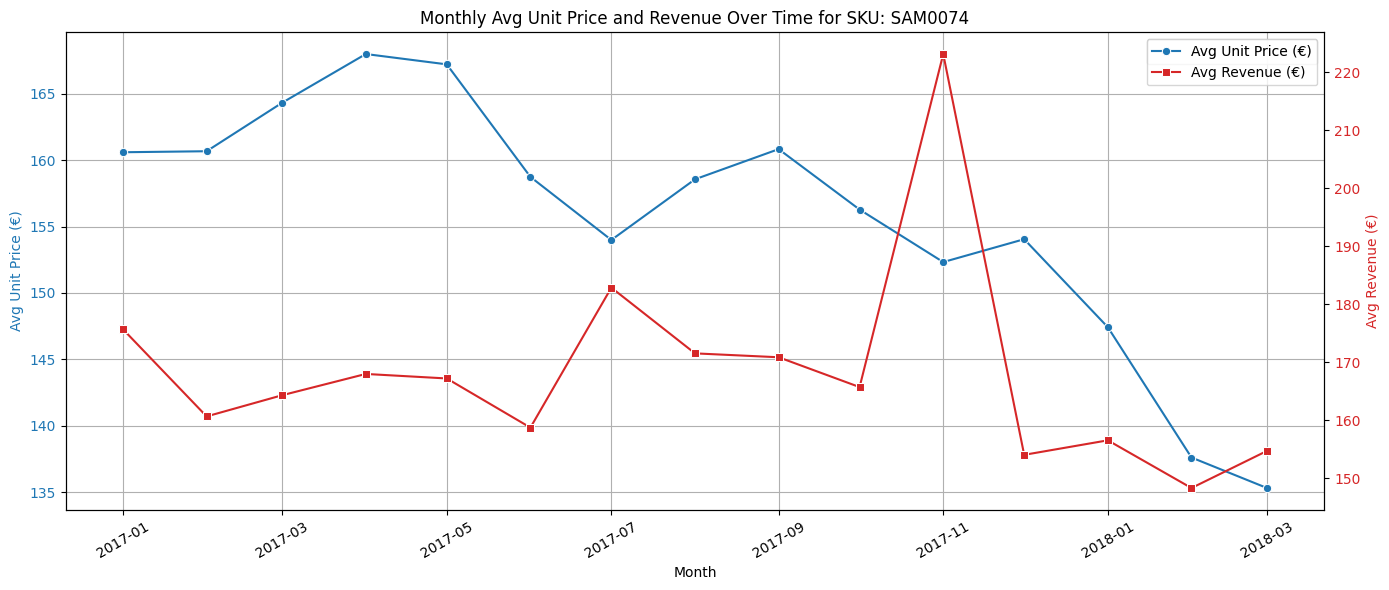

In [ ]:
# Filter for the SKU
sku = 'SAM0074'
sku_df = orderlines_products_discount[orderlines_products_discount['sku'] == sku].copy()

# Convert to datetime if not already
sku_df['date'] = pd.to_datetime(sku_df['date'])

# Create revenue column
sku_df['revenue'] = sku_df['product_quantity'] * sku_df['unit_price']

# Create 'period' column for monthly grouping (year-month)
sku_df['period'] = sku_df['date'].dt.to_period('M').dt.to_timestamp()

# Calculate monthly averages
monthly_avg = sku_df.groupby('period').agg({
    'unit_price': 'mean',
    'revenue': 'mean'
}).reset_index()

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot average unit_price on left y-axis with label
color1 = 'tab:blue'
line1 = sns.lineplot(data=monthly_avg, x='period', y='unit_price', ax=ax1, color=color1, marker='o', label='Avg Unit Price (€)')
ax1.set_ylabel('Avg Unit Price (€)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlabel('Month')
ax1.grid(True)
ax1.set_title(f"Monthly Avg Unit Price and Revenue Over Time for SKU: {sku}")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)

# Plot average revenue on right y-axis with label
ax2 = ax1.twinx()
color2 = 'tab:red'
line2 = sns.lineplot(data=monthly_avg, x='period', y='revenue', ax=ax2, color=color2, marker='s', label='Avg Revenue (€)')
ax2.set_ylabel('Avg Revenue (€)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Combine legends from both axes
lines = line1.get_lines() + line2.get_lines()
labels = [line.get_label() for line in lines]
ax2.legend(lines, labels, loc='upper right', fontsize=10)

# Final layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# Sales over Time (Seasonal, Christmas and Black Friday)

In [ ]:
merged_orders_df

order_id        created_date  total_paid      state  unit_price_total  \
0        241423 2017-11-06 13:10:02      136.15  Completed            129.16   
1        242832 2017-12-31 17:40:03       15.76  Completed             10.77   
2        243330 2017-02-16 10:59:38       84.98  Completed             77.99   
3        245275 2017-06-28 11:35:37      149.00  Completed            149.00   
4        245595 2017-01-21 12:52:47      112.97  Completed            105.98   
...         ...                 ...         ...        ...               ...   
40444    527042 2018-03-14 11:47:50       18.98  Completed             13.99   
40445    527070 2018-03-14 11:50:48       24.97  Completed             19.98   
40446    527074 2018-03-14 11:51:42       24.97  Completed             19.98   
40447    527096 2018-03-14 11:58:40       34.96  Completed             29.97   
40448    527112 2018-03-14 12:03:52       14.98  Completed              9.99   

       difference  product_quantity  
0            6.99                 1  
1            4.99                 1  
2            6.99                 1  
3            0.00                 1  
4            6.99                 2  
...           ...               ...  
40444        4.99                 1  
40445        4.99                 2  
40446        4.99                 2  
40447        4.99                 3  
40448        4.99                 1  

[40449 rows x 7 columns]

# Average Price of Products over Time

<ipython-input-116-bcf0a9549e98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['date'] = pd.to_datetime(orderlines_products_discount['date'])
<ipython-input-116-bcf0a9549e98>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['unit_price_total'] = (
<ipython-input-116-bcf0a9549e98>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

<Axes: xlabel='year_month', ylabel='avg_unit_price'>

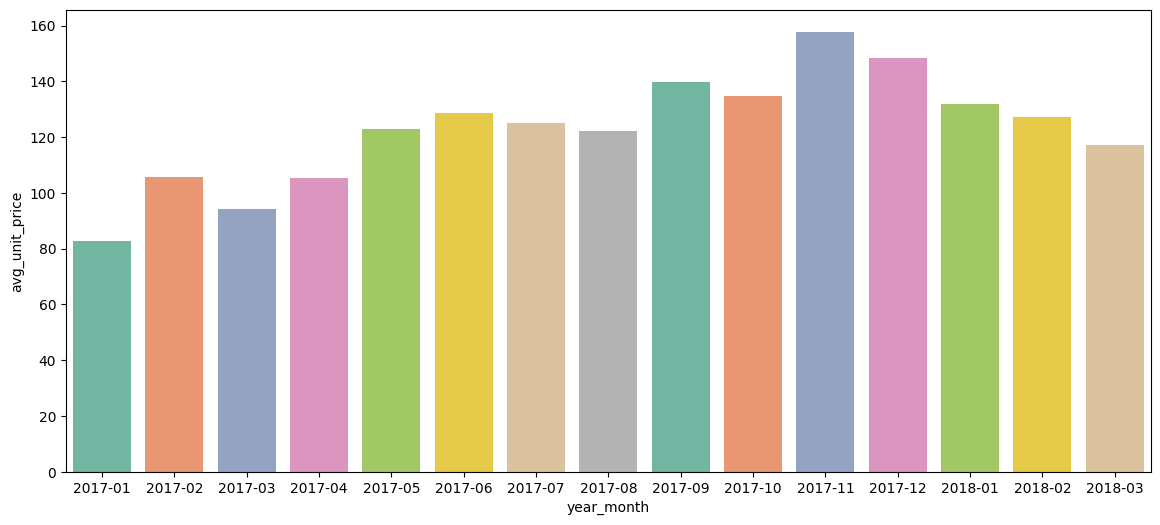

In [ ]:
# Make sure 'date' is datetime
orderlines_products_discount['date'] = pd.to_datetime(orderlines_products_discount['date'])

# Create 'unit_price_total' column
orderlines_products_discount['unit_price_total'] = (
    orderlines_products_discount['unit_price'] * orderlines_products_discount['product_quantity']
)

# Extract year-month as string, e.g. '2023-01'
orderlines_products_discount['year_month'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)

# Calculate total revenue and total quantity sold per month
monthly_data = orderlines_products_discount.groupby('year_month').agg({
    'unit_price_total': 'sum',   # total revenue
    'product_quantity': 'sum'    # total quantity sold
}).reset_index()

# Calculate weighted average unit price per month
monthly_data['avg_unit_price'] = monthly_data['unit_price_total'] / monthly_data['product_quantity']

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=monthly_data, x='year_month', y='avg_unit_price', palette='Set2')


## Average Price of Orders over Time

## In Area Plot

<ipython-input-117-0ef37dd2f950>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['date'] = pd.to_datetime(orderlines_products_discount['date'])
<ipython-input-117-0ef37dd2f950>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['year_month'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)


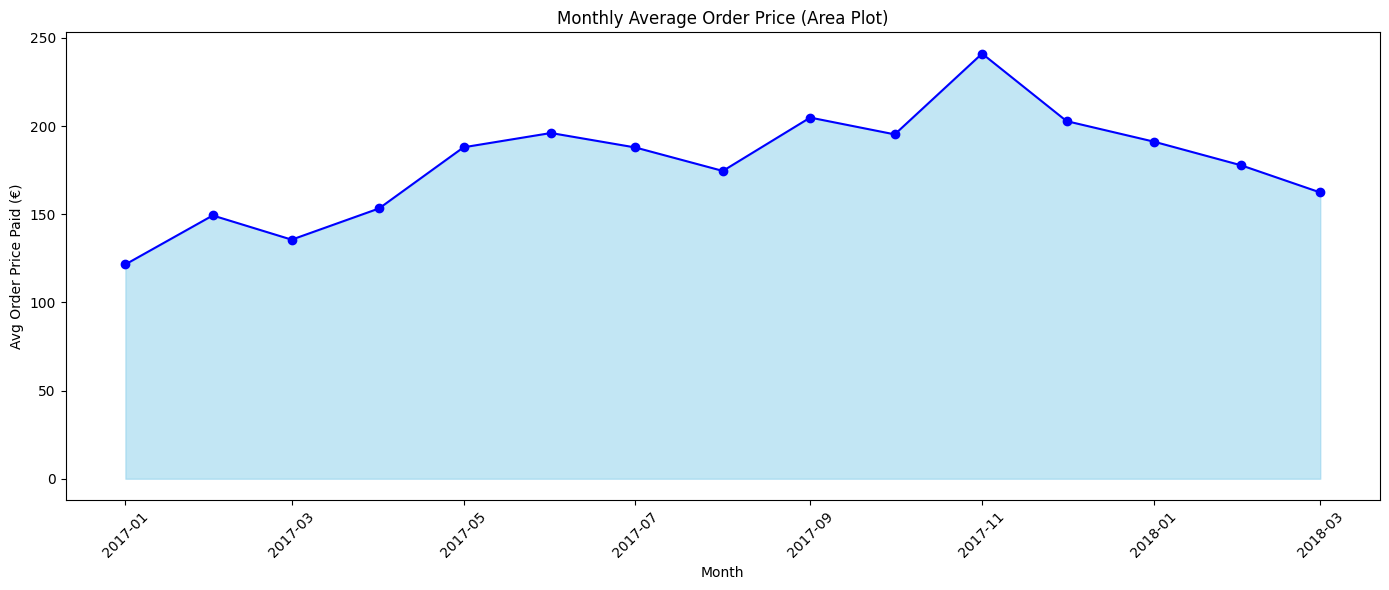

In [ ]:
# Make sure 'date' is datetime
orderlines_products_discount['date'] = pd.to_datetime(orderlines_products_discount['date'])

# Extract year-month as string
orderlines_products_discount['year_month'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)

# Group by order_id and year_month to get order-level revenue
order_level = orderlines_products_discount.groupby(['order_id', 'year_month'])['unit_price_total'].sum().reset_index()

# Now group by year_month to get total revenue and number of orders
monthly_orders = order_level.groupby('year_month').agg(
    total_revenue=('unit_price_total', 'sum'),
    num_orders=('order_id', 'count')
).reset_index()

# Calculate Average Order Value (AOV)
monthly_orders['avg_order_value'] = monthly_orders['total_revenue'] / monthly_orders['num_orders']

# Convert year_month to datetime for plotting
monthly_orders['year_month'] = pd.to_datetime(monthly_orders['year_month'])

# Plot using area chart
plt.figure(figsize=(14, 6))
plt.fill_between(
    monthly_orders['year_month'],
    monthly_orders['avg_order_value'],
    color='skyblue',
    alpha=0.5
)
plt.plot(
    monthly_orders['year_month'],
    monthly_orders['avg_order_value'],
    color='blue',
    marker='o'
)

plt.title('Monthly Average Order Price (Area Plot)')
plt.xlabel('Month')
plt.ylabel('Avg Order Price Paid (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## In Area Plot Including Monthly Avg Prices

<ipython-input-118-78c930a66ce7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['date'] = pd.to_datetime(orderlines_products_discount['date'])
<ipython-input-118-78c930a66ce7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['year_month'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)


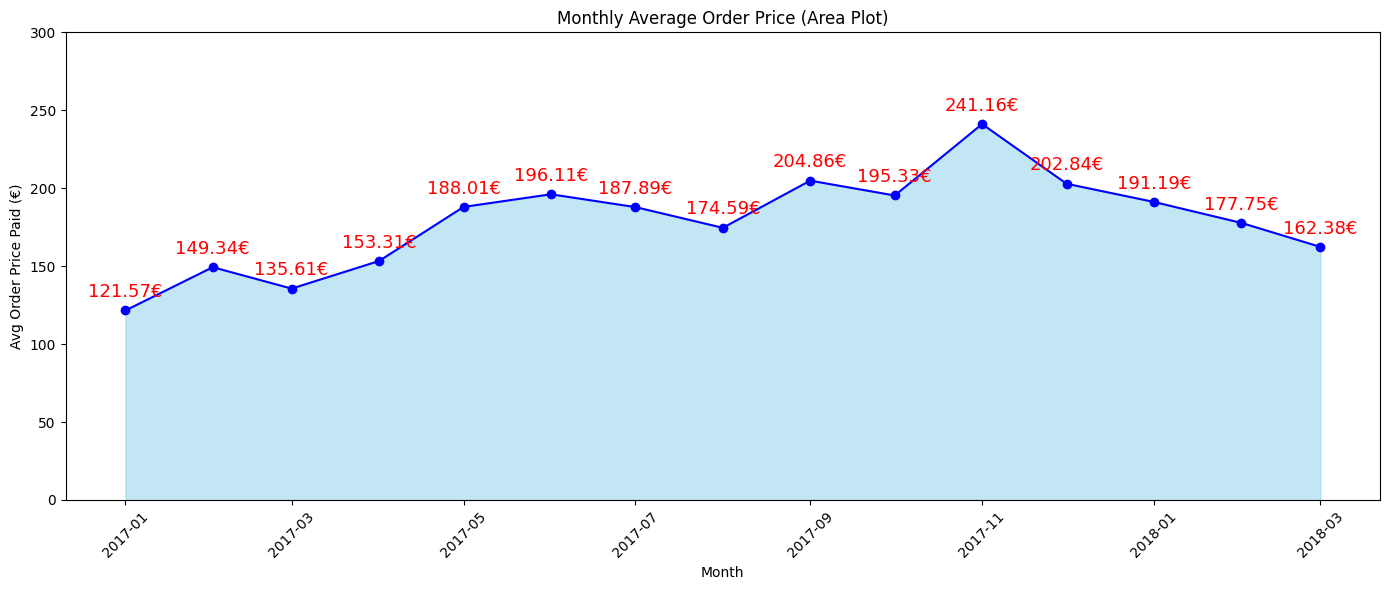

In [ ]:
# Make sure 'date' is datetime
orderlines_products_discount['date'] = pd.to_datetime(orderlines_products_discount['date'])

# Extract year-month as string
orderlines_products_discount['year_month'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)

# Group by order_id and year_month to get order-level revenue
order_level = orderlines_products_discount.groupby(['order_id', 'year_month'])['unit_price_total'].sum().reset_index()

# Now group by year_month to get total revenue and number of orders
monthly_orders = order_level.groupby('year_month').agg(
    total_revenue=('unit_price_total', 'sum'),
    num_orders=('order_id', 'count')
).reset_index()

# Calculate Average Order Value (AOV)
monthly_orders['avg_order_value'] = monthly_orders['total_revenue'] / monthly_orders['num_orders']

# Convert year_month to datetime for plotting
monthly_orders['year_month'] = pd.to_datetime(monthly_orders['year_month'])

# Plot using area chart
plt.figure(figsize=(14, 6))
plt.fill_between(
    monthly_orders['year_month'],
    monthly_orders['avg_order_value'],
    color='skyblue',
    alpha=0.5
)
plt.plot(
    monthly_orders['year_month'],
    monthly_orders['avg_order_value'],
    color='blue',
    marker='o'
)

# Set Y-axis limit with some padding
max_value = monthly_orders['avg_order_value'].max()
plt.ylim(0, 300)

# Add red labels with vertical offset
for i, row in monthly_orders.iterrows():
    plt.text(
        row['year_month'],
        row['avg_order_value'] + 6.0,
        f"{row['avg_order_value']:.2f}€",
        ha='center',
        va='bottom',
        fontsize=13,
        color='red'
    )

plt.title('Monthly Average Order Price (Area Plot)')
plt.xlabel('Month')
plt.ylabel('Avg Order Price Paid (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Sales over Time (Seasonal, Christmas and Black Friday)

Mother's Day → 2017-05-14

New Year's Eve → 2017-12-31

Easter → 2017-04-16

Valentine's Day → 2017-02-14

Black Friday: When the order date is in November and the day is between the 24th and the 30th.

Christmas: When the order date is in December and the day is between the 20th and the 26th.

## AVG Order Price

In [ ]:
# Step 1: Sum unit_price_total per order_id from order lines data
order_totals = orderlines_products_discount.groupby('order_id')['unit_price_total'].sum().reset_index()

# Rename the column to clarify it represents total order price
order_totals.rename(columns={'unit_price_total': 'total_order_price'}, inplace=True)

# Step 2: Merge this total_order_price back into the orders dataframe (merged_orders_df)
merged_orders_with_total = merged_orders_df.merge(order_totals, on='order_id', how='left')

# Optional: Check a few rows to verify
print(merged_orders_with_total[['order_id', 'total_order_price']].head())


   order_id  total_order_price
0    241423             129.16
1    242832              10.77
2    243330              77.99
3    245275             149.00
4    245595             105.98


## with Average Monthly Order Prices

<ipython-input-120-bd30f8a01c1b>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=season_summary, x='label', y='AOV', palette=palette, width=0.6)


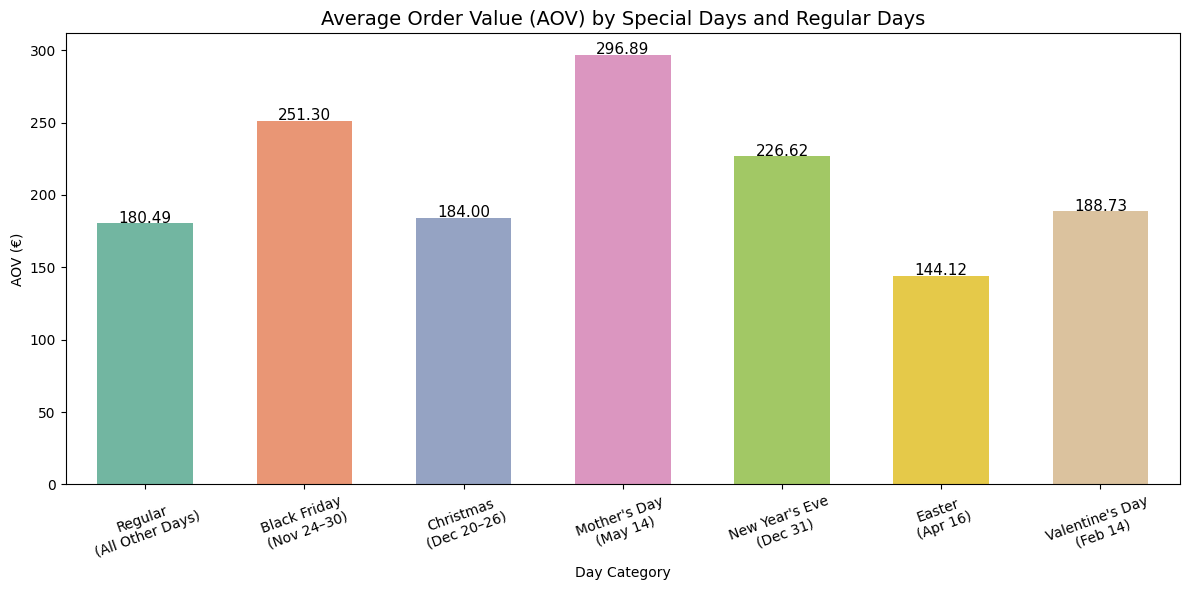

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Function to assign seasons/special days ---
def assign_season_flexible(date):
    if pd.isnull(date):
        return None
    if date.month == 11 and 24 <= date.day <= 30:
        return 'Black Friday'
    if date.month == 12 and 20 <= date.day <= 26:
        return 'Christmas'
    if date.month == 5 and date.day == 14:
        return "Mother's Day"
    if date.month == 12 and date.day == 31:
        return "New Year's Eve"
    if date.month == 4 and date.day == 16:
        return 'Easter'
    if date.month == 2 and date.day == 14:
        return "Valentine's Day"
    return None

# --- Apply season assignment ---
merged_orders_with_total['season'] = merged_orders_with_total['created_date'].apply(assign_season_flexible)

# --- Special Days ---
special_days_orders = merged_orders_with_total[merged_orders_with_total['season'].notna()]
special_summary = special_days_orders.groupby('season').agg(
    total_revenue=('total_order_price', 'sum'),
    order_count=('total_order_price', 'count')
).reset_index()
special_summary['AOV'] = special_summary['total_revenue'] / special_summary['order_count']

# --- Regular Days ---
regular_orders = merged_orders_with_total[merged_orders_with_total['season'].isna()]
regular_total = regular_orders['total_order_price'].sum()
regular_count = regular_orders['total_order_price'].count()
regular_aov = regular_total / regular_count
regular_summary = pd.DataFrame({
    'season': ['Regular'],
    'total_revenue': [regular_total],
    'order_count': [regular_count],
    'AOV': [regular_aov]
})

# --- Combine summaries ---
season_summary = pd.concat([special_summary, regular_summary], ignore_index=True)

# Desired display order
all_seasons_ordered = [
    'Regular', 'Black Friday', 'Christmas', "Mother's Day", "New Year's Eve", 'Easter', "Valentine's Day"
]

# Reindex and fill missing
season_summary = season_summary.set_index('season').reindex(all_seasons_ordered).fillna(0).reset_index()

# Labels with dates
season_dates = {
    'Regular': 'Regular\n(All Other Days)',
    'Black Friday': 'Black Friday\n(Nov 24–30)',
    'Christmas': 'Christmas\n(Dec 20–26)',
    "Mother's Day": "Mother's Day\n(May 14)",
    "New Year's Eve": "New Year's Eve\n(Dec 31)",
    'Easter': 'Easter\n(Apr 16)',
    "Valentine's Day": "Valentine's Day\n(Feb 14)"
}
season_summary['label'] = season_summary['season'].map(season_dates)

# --- Plot ---
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Set2", len(season_summary))
ax = sns.barplot(data=season_summary, x='label', y='AOV', palette=palette, width=0.6)

# Annotate bars
for i, row in season_summary.iterrows():
    ax.text(i, row['AOV'] + 0.5, f"{row['AOV']:.2f}", ha='center', fontsize=11)

plt.title("Average Order Value (AOV) by Special Days and Regular Days", fontsize=14)
plt.ylabel("AOV (€)")
plt.xlabel("Day Category")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


## AVG Discount %

<ipython-input-121-f13e70280afe>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=season_summary, x='label', y='avg_discount_pct', palette=palette, width=0.6)


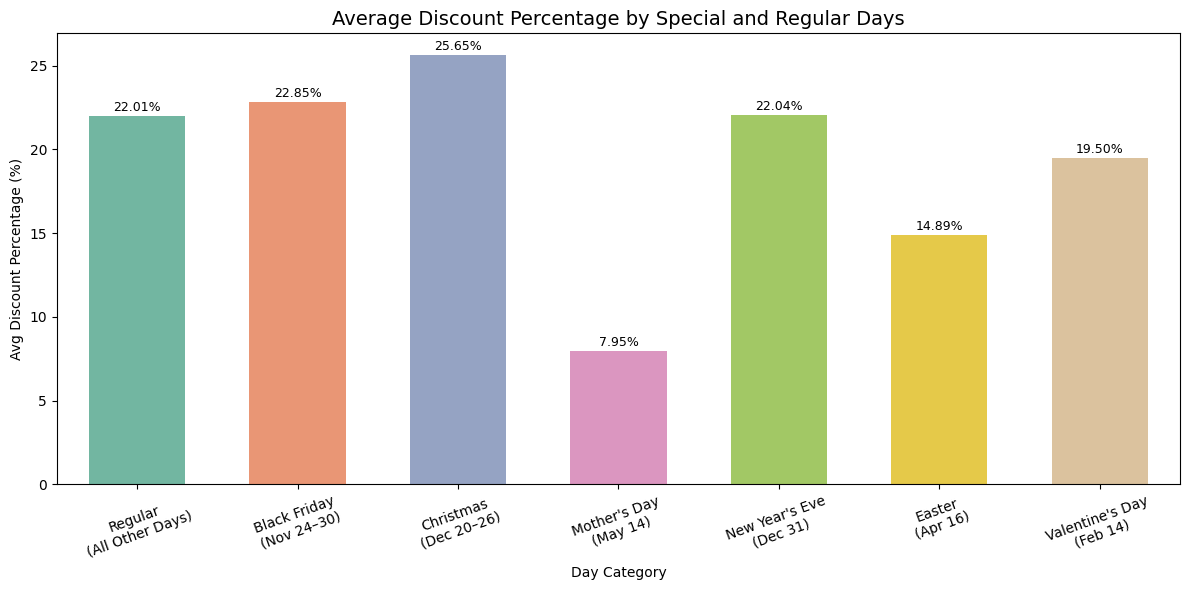

In [ ]:
# Step 1: Calculate average discount percentage per order from orderlines_products_discount
order_discount_pct = orderlines_products_discount.groupby('order_id')['discount_percentage'].mean().reset_index()
order_discount_pct.rename(columns={'discount_percentage': 'avg_discount_pct'}, inplace=True)

# Step 2: Merge average discount percentage into merged_orders_df
merged_orders_with_discount = merged_orders_df.merge(order_discount_pct, on='order_id', how='left')

# Step 3: Define function to assign season/special day
def assign_season_flexible(date):
    if pd.isnull(date):
        return None
    if date.month == 11 and 24 <= date.day <= 30:
        return 'Black Friday'
    if date.month == 12 and 20 <= date.day <= 26:
        return 'Christmas'
    if date.month == 5 and date.day == 14:
        return "Mother's Day"
    if date.month == 12 and date.day == 31:
        return "New Year's Eve"
    if date.month == 4 and date.day == 16:
        return 'Easter'
    if date.month == 2 and date.day == 14:
        return "Valentine's Day"
    return None  # will assign 'Regular' later

# Step 4: Apply season assignment
merged_orders_with_discount['season'] = merged_orders_with_discount['created_date'].apply(assign_season_flexible)

# Step 5: Assign 'Regular' to rows without a special season
merged_orders_with_discount['season'] = merged_orders_with_discount['season'].fillna('Regular')

# Step 6: Aggregate average discount percentage by season
season_summary = merged_orders_with_discount.groupby('season')['avg_discount_pct'].mean().reset_index()

# Step 7: Ensure all special days + Regular appear in desired order
all_seasons = [
    'Regular', 'Black Friday', 'Christmas', "Mother's Day", "New Year's Eve", 'Easter', "Valentine's Day"
]
season_summary = season_summary.set_index('season').reindex(all_seasons).fillna(0).reset_index()

# Step 8: Add readable labels
season_dates = {
    'Regular': 'Regular\n(All Other Days)',
    'Black Friday': 'Black Friday\n(Nov 24–30)',
    'Christmas': 'Christmas\n(Dec 20–26)',
    "Mother's Day": "Mother's Day\n(May 14)",
    "New Year's Eve": "New Year's Eve\n(Dec 31)",
    'Easter': 'Easter\n(Apr 16)',
    "Valentine's Day": "Valentine's Day\n(Feb 14)"
}
season_summary['label'] = season_summary['season'].map(season_dates)

# Step 9: Plot
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Set2", len(season_summary))
ax = sns.barplot(data=season_summary, x='label', y='avg_discount_pct', palette=palette, width=0.6)

# Annotate bars
for i, row in season_summary.iterrows():
    ax.text(i, row['avg_discount_pct'] + 0.3, f"{row['avg_discount_pct']:.2f}%",
            ha='center', fontsize=9)

plt.title("Average Discount Percentage by Special and Regular Days", fontsize=14)
plt.ylabel("Avg Discount Percentage (%)")
plt.xlabel("Day Category")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


## Number of Orders





<ipython-input-122-5e3eb37379f6>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=season_summary, x='label', y='num_orders', palette=palette, width=0.6)


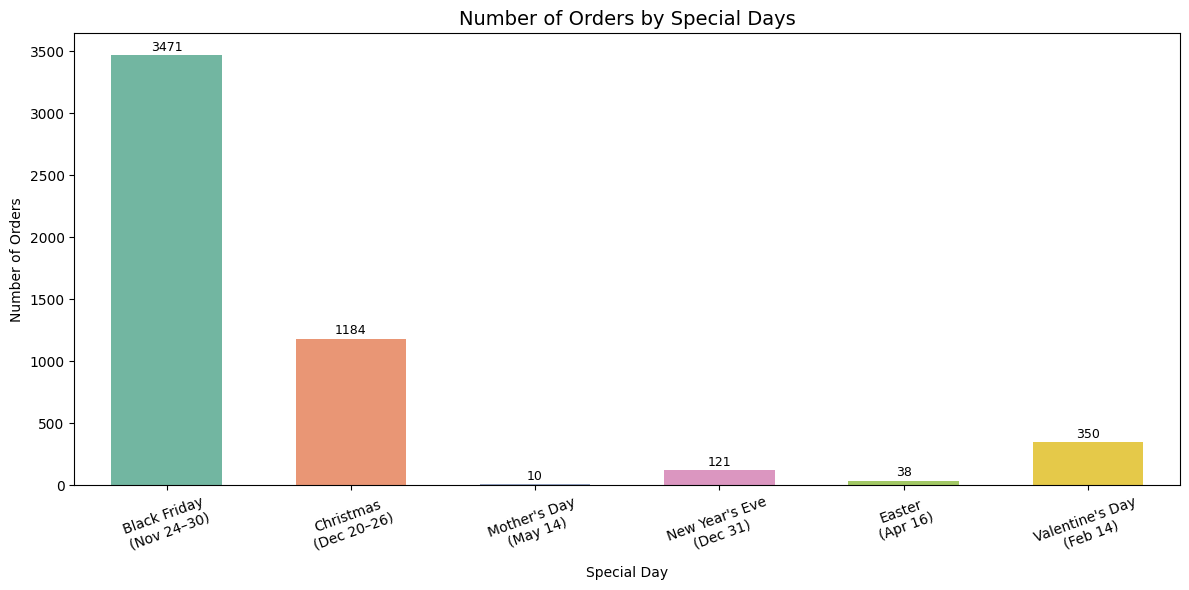

In [ ]:
# Function to assign season by month and day (ignore year)
def assign_season_flexible(date):
    if pd.isnull(date):
        return None

    if date.month == 11 and 24 <= date.day <= 30:
        return 'Black Friday'
    if date.month == 12 and 20 <= date.day <= 26:
        return 'Christmas'
    if date.month == 5 and date.day == 14:
        return "Mother's Day"
    if date.month == 12 and date.day == 31:
        return "New Year's Eve"
    if date.month == 4 and date.day == 16:
        return 'Easter'
    if date.month == 2 and date.day == 14:
        return "Valentine's Day"

    return None  # Exclude Regular

# Assign season column to merged_orders_with_discount
merged_orders_with_discount['season'] = merged_orders_with_discount['created_date'].apply(assign_season_flexible)

# Filter only special days (exclude Regular/None)
special_days_orders = merged_orders_with_discount[merged_orders_with_discount['season'].notna()]

# Count number of unique orders per special day
season_summary = special_days_orders.groupby('season')['order_id'].nunique().reset_index()
season_summary.rename(columns={'order_id': 'num_orders'}, inplace=True)

# Define order of special days to keep plot consistent
all_special_days = [
    'Black Friday', 'Christmas', "Mother's Day", "New Year's Eve", 'Easter', "Valentine's Day"
]

# Reindex so all special days appear, fill missing with 0
season_summary = season_summary.set_index('season').reindex(all_special_days).fillna(0).reset_index()

# Add readable labels
season_dates = {
    'Black Friday': 'Black Friday\n(Nov 24–30)',
    'Christmas': 'Christmas\n(Dec 20–26)',
    "Mother's Day": "Mother's Day\n(May 14)",
    "New Year's Eve": "New Year's Eve\n(Dec 31)",
    'Easter': 'Easter\n(Apr 16)',
    "Valentine's Day": "Valentine's Day\n(Feb 14)"
}

season_summary['label'] = season_summary['season'].map(season_dates)

# Plot
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Set2", len(season_summary))
ax = sns.barplot(data=season_summary, x='label', y='num_orders', palette=palette, width=0.6)

# Annotate bars with smaller font size for clarity
for i, row in season_summary.iterrows():
    ax.text(i, row['num_orders'] + max(season_summary['num_orders'])*0.01, f"{int(row['num_orders'])}",
            ha='center', fontsize=9)

plt.title("Number of Orders by Special Days", fontsize=14)
plt.ylabel("Number of Orders")
plt.xlabel("Special Day")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Daily Total Revenue'}, xlabel='created_date'>

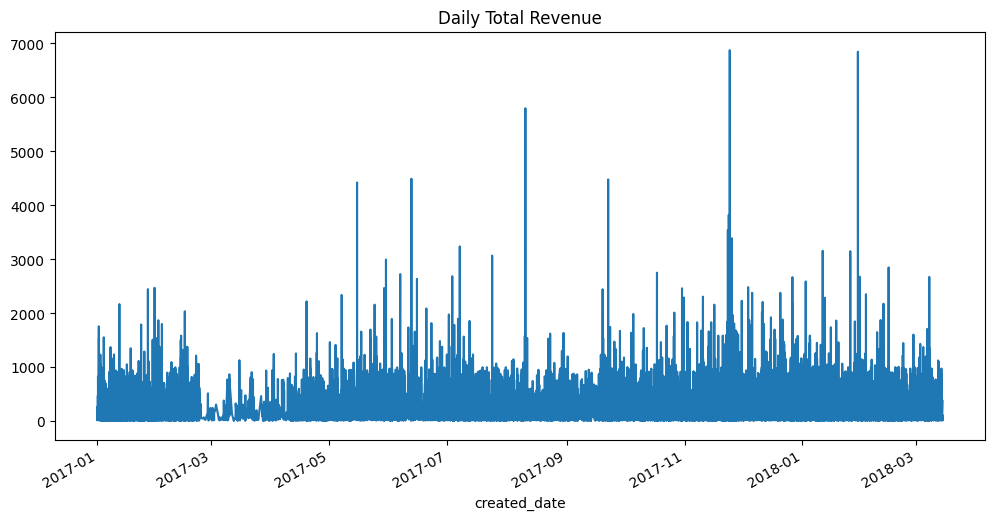

In [ ]:
daily_sales = merged_orders_df.groupby('created_date')['total_paid'].sum()

daily_sales.plot(title="Daily Total Revenue", figsize=(12,6))


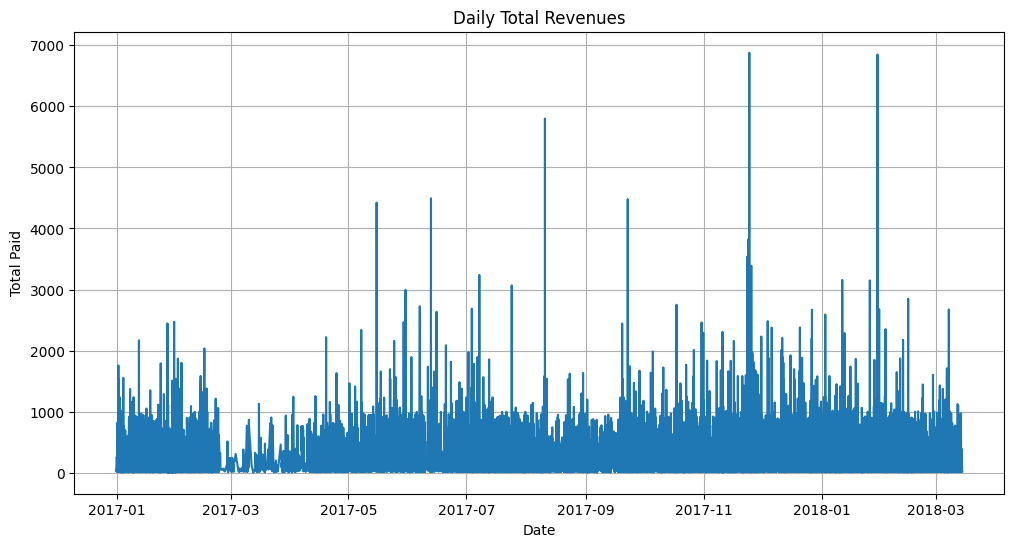

In [ ]:
# Use seaborn to create the line plot
daily_sales = merged_orders_df.groupby('created_date')['total_paid'].sum().reset_index() # added reset_index()

import seaborn as sns
plt.figure(figsize=(12, 6))  # Set the figure size
sns.lineplot(x='created_date', y='total_paid', data=daily_sales)
plt.title("Daily Total Revenues")
plt.xlabel("Date")
plt.ylabel("Total Paid")
plt.grid(True)
plt.show()

# Monthly Total Revenue

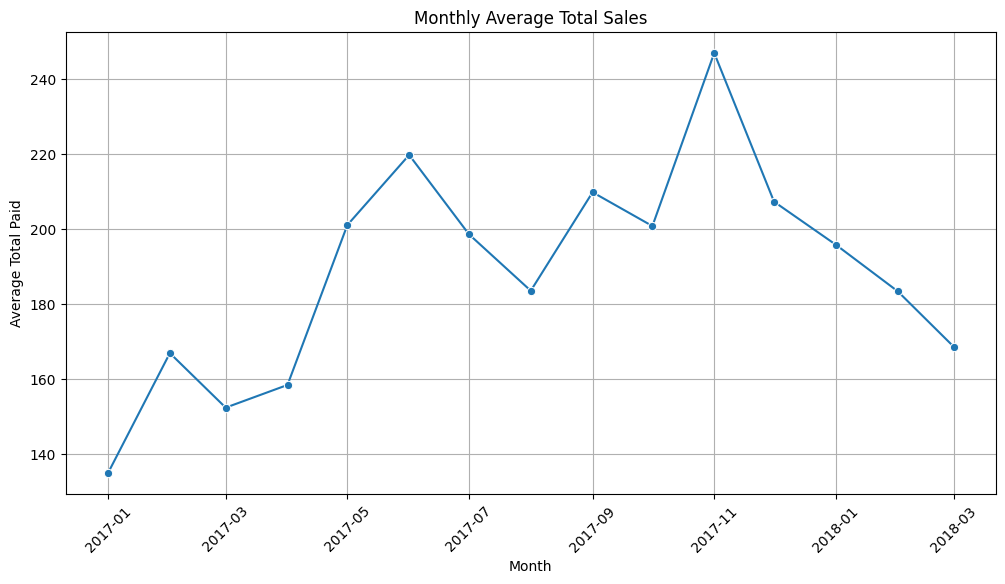

In [ ]:
# Convert created_date to monthly period (year-month)
daily_sales['month'] = daily_sales['created_date'].dt.to_period('M')

# Group by month and calculate average total sales per month
monthly_avg_sales = daily_sales.groupby('month')['total_paid'].mean().reset_index()

# Convert 'month' back to datetime for plotting
monthly_avg_sales['month'] = monthly_avg_sales['month'].dt.to_timestamp()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))  # Set the figure size
sns.lineplot(x='month', y='total_paid', data=monthly_avg_sales, marker='o')
plt.title("Monthly Average Total Sales")
plt.xlabel("Month")
plt.ylabel("Average Total Paid")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# Monthly Sales (Order count)

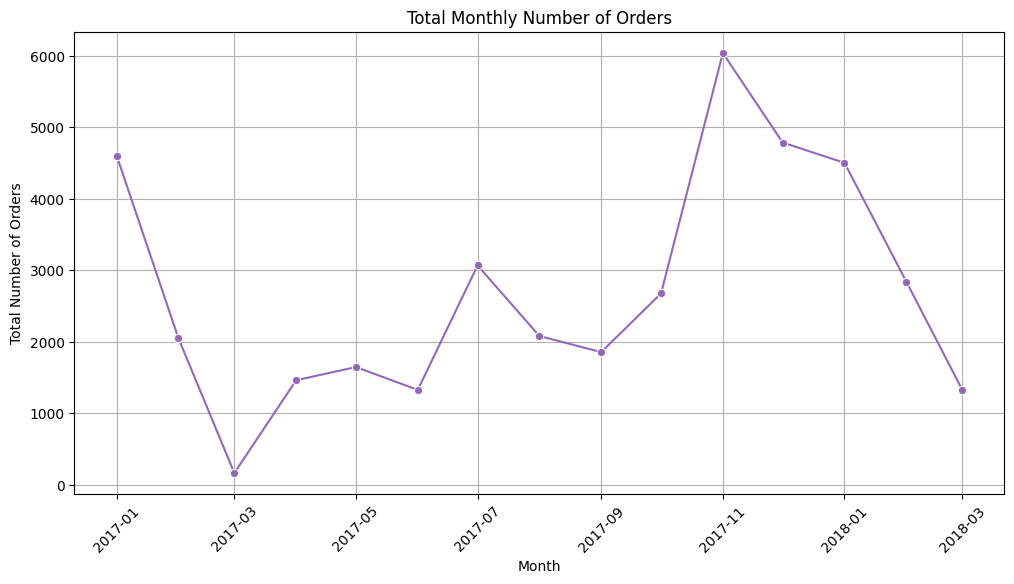

In [ ]:
# Step 1: Get daily order count (assuming 'order_id' uniquely identifies orders)
daily_orders = merged_orders_df.groupby('created_date')['order_id'].nunique().reset_index(name='order_count')

# Step 2: Convert 'created_date' to month period
daily_orders['month'] = daily_orders['created_date'].dt.to_period('M')

# Step 3: Group by month and calculate average daily orders for each month
monthly_avg_orders = daily_orders.groupby('month')['order_count'].sum().reset_index()

# Convert 'month' back to datetime for plotting
monthly_avg_orders['month'] = monthly_avg_orders['month'].dt.to_timestamp()

import matplotlib.pyplot as plt
import seaborn as sns

# Step 4: Plot monthly average daily order counts
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='order_count', data=monthly_avg_orders, marker='o', color='tab:purple')
plt.title("Total Monthly Number of Orders")
plt.xlabel("Month")
plt.ylabel("Total Number of Orders")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# Monthly Average Revenue and Number of Orders Together

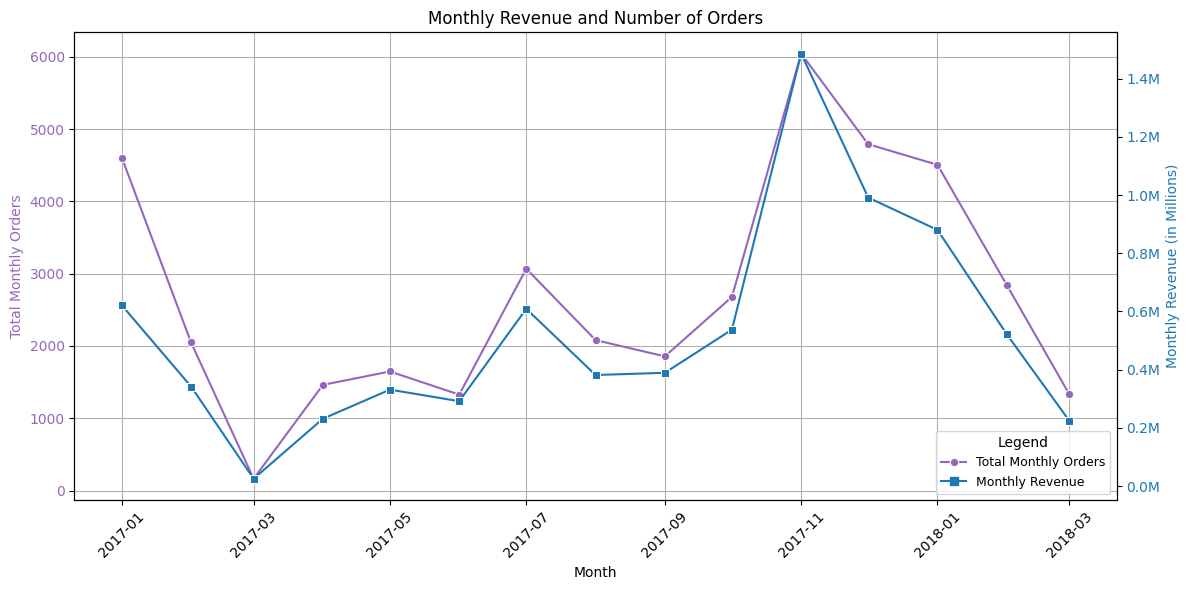

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Assuming monthly_avg_orders and monthly_avg_sales (monthly average daily sales) are prepared as before:

# Prepare monthly average daily sales (total_paid) for plotting
daily_sales = merged_orders_df.groupby('created_date')['total_paid'].sum().reset_index()
daily_sales['month'] = daily_sales['created_date'].dt.to_period('M')
monthly_avg_sales = daily_sales.groupby('month')['total_paid'].sum().reset_index()
monthly_avg_sales['month'] = monthly_avg_sales['month'].dt.to_timestamp()

# Prepare monthly average daily order count (order_id)
daily_orders = merged_orders_df.groupby('created_date')['order_id'].nunique().reset_index(name='order_count')
daily_orders['month'] = daily_orders['created_date'].dt.to_period('M')
monthly_avg_orders = daily_orders.groupby('month')['order_count'].sum().reset_index()
monthly_avg_orders['month'] = monthly_avg_orders['month'].dt.to_timestamp()

# Merge on month for aligned plotting
combined_df = monthly_avg_orders.merge(monthly_avg_sales, on='month')

# Plot with dual y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

color1 = 'tab:purple'
sns.lineplot(data=combined_df, x='month', y='order_count', marker='o', ax=ax1, color=color1, label='Total Monthly Orders')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Monthly Orders', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True)
plt.xticks(rotation=45)

# Revenue on right y-axis
ax2 = ax1.twinx()
color2 = 'tab:blue'
sns.lineplot(data=combined_df, x='month', y='total_paid', marker='s', ax=ax2, color=color2)
ax2.set_ylabel('Monthly Revenue (in Millions)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Format right y-axis to show millions
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Custom combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
custom_line = plt.Line2D([0], [0], marker='s', color=color2, label='Monthly Revenue')
ax1.legend(lines1 + [custom_line], labels1 + ['Monthly Revenue'], loc='lower right', fontsize=9, title='Legend')

plt.title("Monthly Revenue and Number of Orders")
plt.tight_layout()
plt.show()


# Daily

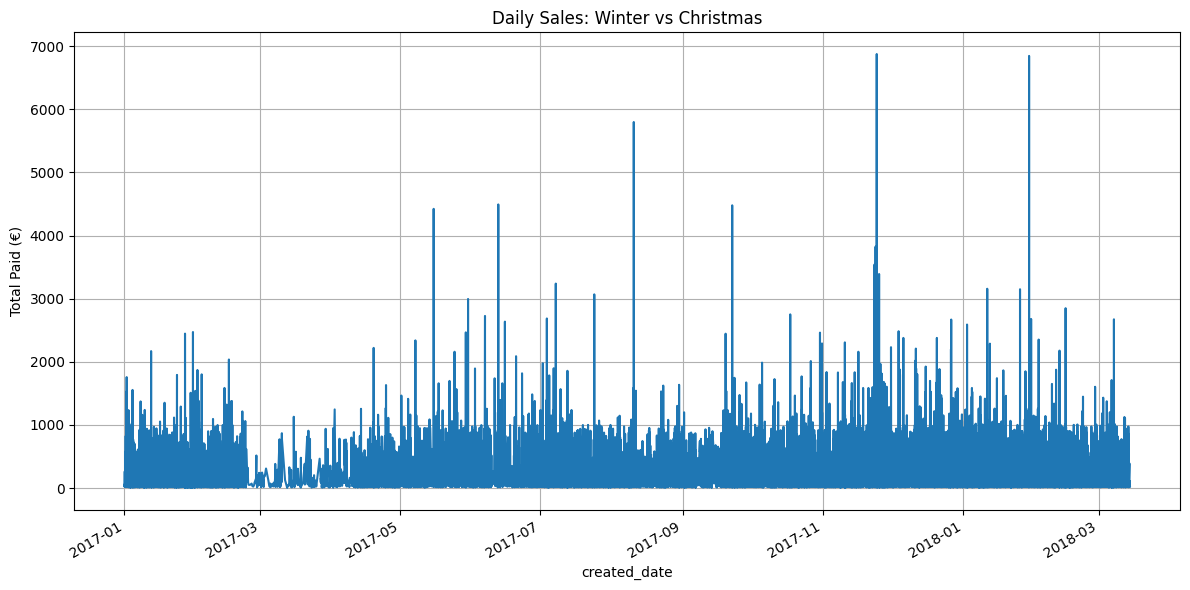

In [ ]:
# Helper columns
merged_orders_df['month'] = merged_orders_df['created_date'].dt.month
merged_orders_df['day'] = merged_orders_df['created_date'].dt.day

# Assign default seasons
def get_season(row):
    month = row['month']
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

merged_orders_df['season'] = merged_orders_df.apply(get_season, axis=1)

# Override for Christmas (Dec 20–26)
is_christmas = (merged_orders_df['month'] == 12) & (merged_orders_df['day'].between(20, 26))
merged_orders_df.loc[is_christmas, 'season'] = 'Christmas'

import matplotlib.pyplot as plt
daily_trend = merged_orders_df.groupby('created_date')['total_paid'].sum()
seasonal_sales = merged_orders_df.groupby('season')['total_paid'].sum().reindex(
    ['Winter', 'Christmas', 'Spring', 'Summer', 'Fall']
)
# Plot
daily_trend.plot(title='Daily Sales: Winter vs Christmas', figsize=(12,6))
plt.ylabel('Total Paid (€)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Daily with Special Days

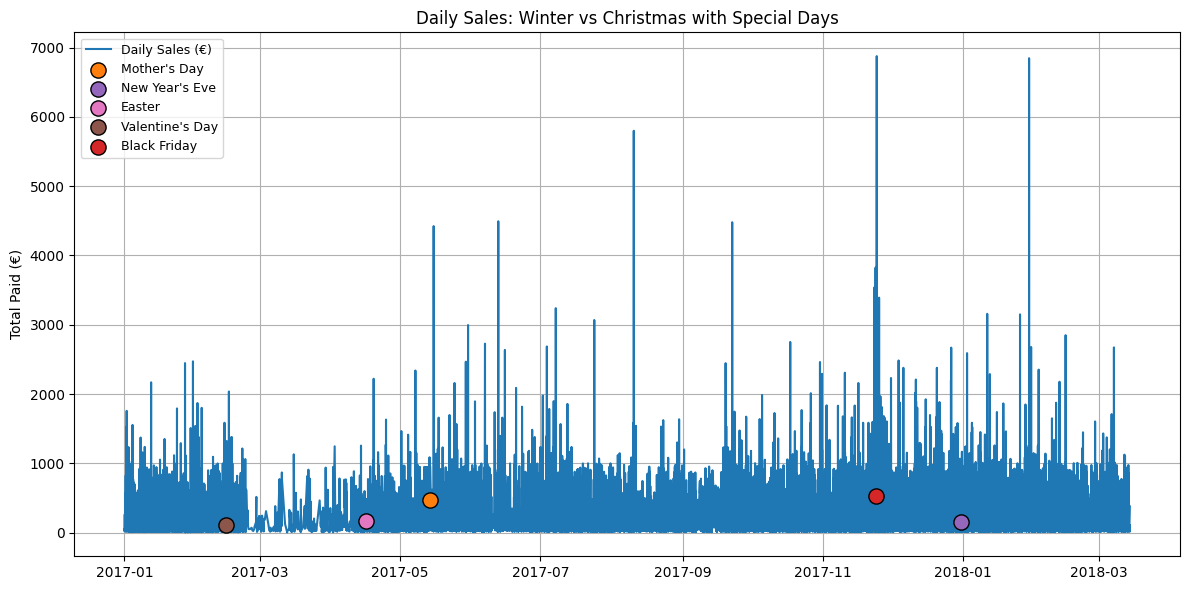

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Helper columns
merged_orders_df['month'] = merged_orders_df['created_date'].dt.month
merged_orders_df['day'] = merged_orders_df['created_date'].dt.day

# Assign default seasons
def get_season(row):
    month = row['month']
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

merged_orders_df['season'] = merged_orders_df.apply(get_season, axis=1)

# Override for Christmas (Dec 20–26)
is_christmas = (merged_orders_df['month'] == 12) & (merged_orders_df['day'].between(20, 26))
merged_orders_df.loc[is_christmas, 'season'] = 'Christmas'

# Daily sales
daily_trend = merged_orders_df.groupby('created_date')['total_paid'].sum()

# Special days and colors
special_days = {
    "Mother's Day": '2017-05-14',
    "New Year's Eve": '2017-12-31',
    "Easter": '2017-04-16',
    "Valentine's Day": '2017-02-14',
    "Black Friday": '2017-11-24',
}
special_colors = {
    "Mother's Day": 'tab:orange',
    "New Year's Eve": 'tab:purple',
    "Easter": 'tab:pink',
    "Valentine's Day": 'tab:brown',
    "Black Friday": 'tab:red',
}

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(daily_trend.index, daily_trend.values, label='Daily Sales (€)', color='tab:blue')
ax.set_title('Daily Sales: Winter vs Christmas with Special Days')
ax.set_ylabel('Total Paid (€)')
ax.grid(True)

# Plot special day markers
for name, date_str in special_days.items():
    date_val = pd.to_datetime(date_str)

    # Find nearest date in daily_trend
    if date_val in daily_trend.index:
        y_val = daily_trend.loc[date_val]
    else:
        # Find the closest available date
        closest_date = daily_trend.index.get_indexer([date_val], method='nearest')
        if closest_date[0] == -1:
            continue  # No match found
        date_val = daily_trend.index[closest_date[0]]
        y_val = daily_trend.iloc[closest_date[0]]

    ax.scatter(date_val, y_val, color=special_colors[name], s=120, edgecolor='black', label=name, zorder=5)

# legend entries
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys(), loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()


# Categories Discount Percentages over Time

In [ ]:
orderlines_products_discount.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50990 entries, 0 to 52554
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             50990 non-null  int64         
 1   product_quantity     50990 non-null  int64         
 2   sku                  50990 non-null  object        
 3   unit_price           50990 non-null  float64       
 4   date                 50990 non-null  datetime64[ns]
 5   name                 50990 non-null  object        
 6   price                50990 non-null  float64       
 7   type                 50983 non-null  object        
 8   main_category        50990 non-null  object        
 9   sub_category         50990 non-null  object        
 10  discount             50990 non-null  float64       
 11  discount_status      50990 non-null  object        
 12  discount_percentage  50990 non-null  float64       
 13  period               50990 non-null 

In [ ]:
# Monthly granularity
orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M')


<ipython-input-131-78d9fd5948f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M')


In [ ]:
category_discounts = (
    orderlines_products_discount
    .groupby(['period', 'main_category'])['discount_percentage']
    .mean()
    .reset_index()
)
discount_trend = category_discounts.pivot(index='period', columns='main_category', values='discount_percentage')


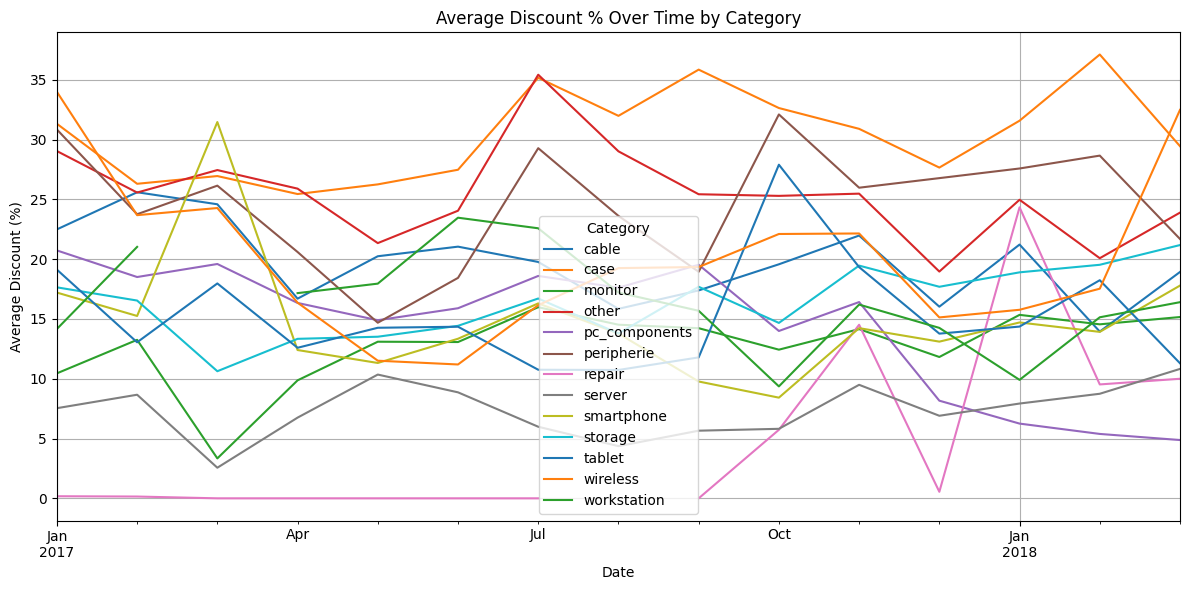

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Optional: convert period to timestamp for plotting
discount_trend.index = discount_trend.index.to_timestamp()

# Plot
discount_trend.plot(figsize=(12, 6), title='Average Discount % Over Time by Category')
plt.ylabel('Average Discount (%)')
plt.xlabel('Date')
plt.grid(True)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


In [ ]:
orderlines_products_discount.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50990 entries, 0 to 52554
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             50990 non-null  int64         
 1   product_quantity     50990 non-null  int64         
 2   sku                  50990 non-null  object        
 3   unit_price           50990 non-null  float64       
 4   date                 50990 non-null  datetime64[ns]
 5   name                 50990 non-null  object        
 6   price                50990 non-null  float64       
 7   type                 50983 non-null  object        
 8   main_category        50990 non-null  object        
 9   sub_category         50990 non-null  object        
 10  discount             50990 non-null  float64       
 11  discount_status      50990 non-null  object        
 12  discount_percentage  50990 non-null  float64       
 13  period               50990 non-null 

MERGED HERE

In [ ]:
orderlines_products_discount["main_category"].value_counts()

main_category
other            11335
peripherie       10648
storage           8589
case              6008
wireless          3086
pc_components     3040
smartphone        2825
tablet            1775
monitor           1355
server            1068
cable             1065
workstation        152
repair              44
Name: count, dtype: int64

In [ ]:
y= orderlines_products_discount.loc[(orderlines_products_discount["main_category"] == "peripherie"), :]
y.head(3)

order_id  product_quantity      sku  unit_price                date  \
5    299563                 1  BEA0065      256.49 2017-01-01 02:42:05   
6    299564                 1  SAT0010       18.99 2017-01-01 02:43:37   
8    299578                 1  LOG0191      142.49 2017-01-01 08:21:26   

                                                name   price  type  \
5   Solo3 Beats Headphones Wireless On-Ear Rose Gold  299.95  5384   
6                      Satechi Aluminum Silver Mouse   29.99  1387   
8  Ultimate Ears Boom 2 Bluetooth Portable Speake...  209.00  5398   

  main_category         sub_category  discount discount_status  \
5    peripherie  headphones, battery     43.46      discounted   
6    peripherie        input_devices     11.00      discounted   
8    peripherie              speaker     66.51      discounted   

   discount_percentage   period   season  unit_price_total year_month  
5                14.49  2017-01  Regular            256.49    2017-01  
6                36.68  2017-01  Regular             18.99    2017-01  
8                31.82  2017-01  Regular            142.49    2017-01

##Peripherie Category Discount Percentage Distribution Over Time

<ipython-input-137-25771bb8cc51>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_filtered['period'] = pd.to_datetime(category_filtered['date'].dt.to_period('M').astype(str))


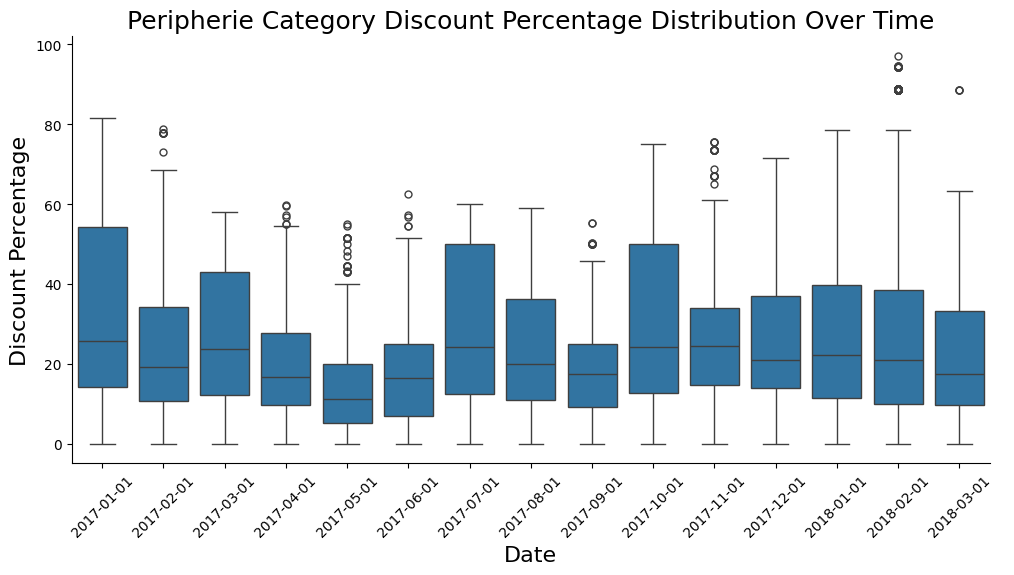

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
category_filtered = orderlines_products_discount.loc[
    (orderlines_products_discount["main_category"] == "peripherie"), :
]
# Convert 'date' to datetime and then to period
category_filtered['period'] = pd.to_datetime(category_filtered['date'].dt.to_period('M').astype(str))


# Use catplot with kind='box' to show the distribution of discount_percentage for each period
x = sns.catplot(
    data=category_filtered,
    x="period",
    y="discount_percentage",
    kind='box',  # Use boxplot
    height=5,
    aspect=2,
)
x.set_xticklabels(rotation=45)
x.ax.set_title("Peripherie Category Discount Percentage Distribution Over Time", fontsize=18)
x.set_axis_labels("Date", "Discount Percentage", fontsize=16)
plt.show()

In [ ]:
orderlines_products_discount.head(2)

order_id  product_quantity      sku  unit_price                date  \
0    299545                 1  OWC0100       47.49 2017-01-01 01:46:16   
1    299546                 1  IOT0014       18.99 2017-01-01 01:50:34   

                                                name  price      type  \
0  OWC In-line Digital Temperature Sensor Kit HDD...  60.99  12755395   
1               iOttie Easy View 2 Car Black Support  22.95      5720   

  main_category sub_category  discount discount_status  discount_percentage  \
0         other        other     13.50      discounted                22.13   
1         other        other      3.96      discounted                17.25   

    period   season  unit_price_total year_month  
0  2017-01  Regular             47.49    2017-01  
1  2017-01  Regular             18.99    2017-01

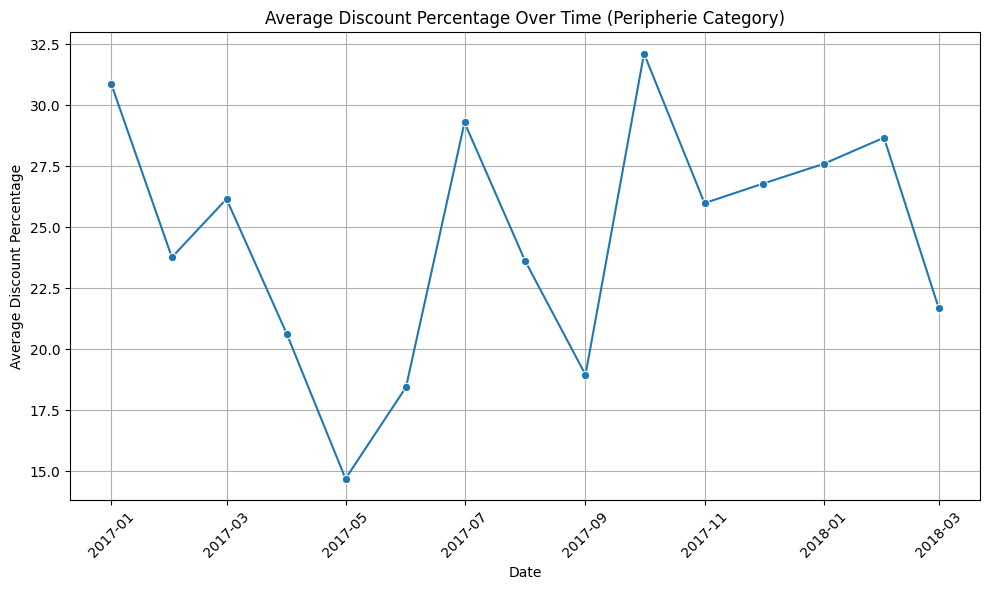

In [ ]:
category_filtered = orderlines_products_discount.loc[
    (orderlines_products_discount["main_category"] == "peripherie"), :
].copy()
# Convert 'date' to datetime and then to period
category_filtered['period'] = pd.to_datetime(category_filtered['date'].dt.to_period('M').astype(str))

# Calculate the mean discount percentage per period
monthly_avg_discount = category_filtered.groupby('period')['discount_percentage'].mean().reset_index()


# Use a line plot to show the trend of average discount percentage over time
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.lineplot(data=monthly_avg_discount, x='period', y='discount_percentage', marker='o')  # 'o' adds markers to the line
plt.title("Average Discount Percentage Over Time (Peripherie Category)")
plt.xlabel("Date")
plt.ylabel("Average Discount Percentage")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## Discount and Revenue Over Time (Peripherie Category)

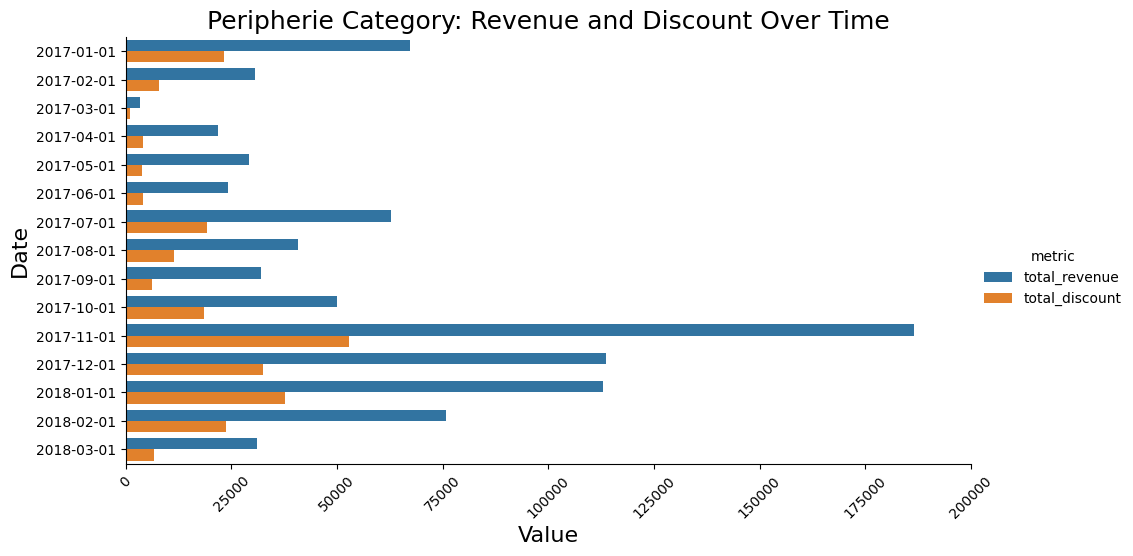

In [ ]:

# Assuming orderlines_products_discount is your DataFrame
category_filtered = orderlines_products_discount.loc[
    (orderlines_products_discount["main_category"] == "peripherie"), :
].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Convert 'date' to datetime and then to period
category_filtered['period'] = pd.to_datetime(category_filtered['date'].dt.to_period('M').astype(str))

# Calculate revenue
category_filtered['revenue'] = category_filtered['unit_price'] * category_filtered['product_quantity']

# Group by period and calculate total revenue and total discount
period_summary = category_filtered.groupby('period').agg(
    total_revenue=('revenue', 'sum'),
    total_discount=('discount', 'sum')  # Changed to sum of discount
).reset_index()

# Melt the DataFrame to combine total_revenue and total_discount into a single column
period_summary_melted = period_summary.melt(
    id_vars='period',
    value_vars=['total_revenue', 'total_discount'],  # Changed to total_discount
    var_name='metric',
    value_name='value'
)
period_summary_melted['period'] = pd.to_datetime(period_summary_melted['period'])

# Use catplot with kind='box' to show the distribution of total_revenue and total_discount for each period
x = sns.catplot(
    data=period_summary_melted, # Use the melted dataframe here
    x="value",
    y="period", # Use 'value' from the melted dataframe
    hue='metric', # Use 'metric' to differentiate between revenue and discount
    kind='bar',  # Use barplot
    height=5,
    aspect=2,
)
x.set_xticklabels(rotation=45)
x.ax.set_title("Peripherie Category: Revenue and Discount Over Time", fontsize=18) # More descriptive title
x.set_axis_labels("Value", "Date", fontsize=16); # Label the axes
plt.show()


In [ ]:
orderlines_products_discount.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50990 entries, 0 to 52554
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             50990 non-null  int64         
 1   product_quantity     50990 non-null  int64         
 2   sku                  50990 non-null  object        
 3   unit_price           50990 non-null  float64       
 4   date                 50990 non-null  datetime64[ns]
 5   name                 50990 non-null  object        
 6   price                50990 non-null  float64       
 7   type                 50983 non-null  object        
 8   main_category        50990 non-null  object        
 9   sub_category         50990 non-null  object        
 10  discount             50990 non-null  float64       
 11  discount_status      50990 non-null  object        
 12  discount_percentage  50990 non-null  float64       
 13  period               50990 non-null 

<ipython-input-142-722a1d762dc5>:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)


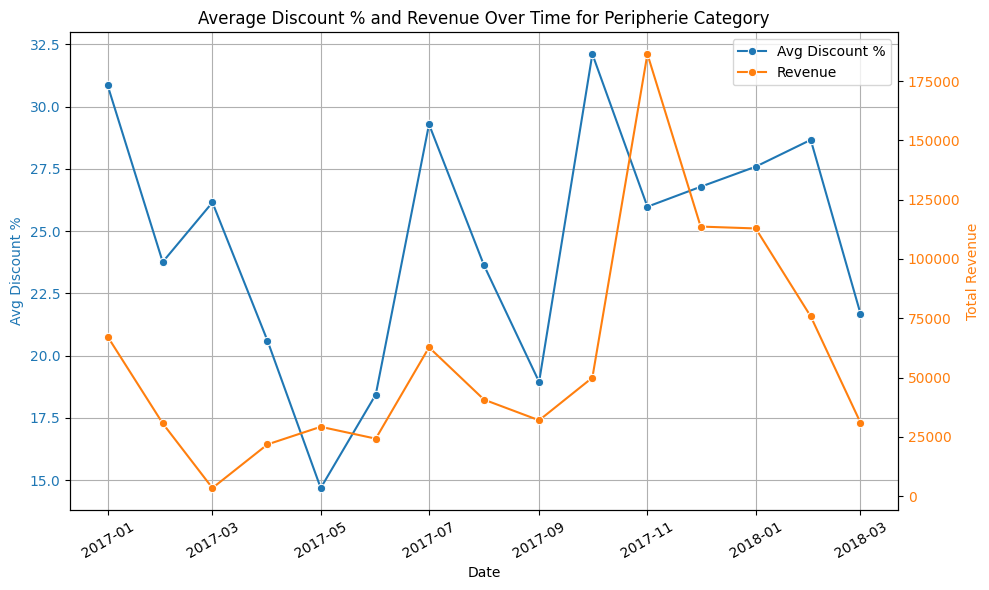

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for your desired category
category_filtered = orderlines_products_discount.loc[
    orderlines_products_discount["main_category"] == "peripherie"
].copy()

# Group by period, aggregate average discount_percentage and total revenue
monthly_stats_category = (
    category_filtered.groupby('period')
    .agg({
        'discount_percentage': 'mean',
        'unit_price_total': 'sum'
    })
    .reset_index()
)

# Convert Period dtype to datetime timestamp for plotting
monthly_stats_category['period'] = monthly_stats_category['period'].dt.to_timestamp()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average discount percentage on primary y-axis with legend
line1 = sns.lineplot(
    data=monthly_stats_category,
    x='period',
    y='discount_percentage',
    marker='o',
    ax=ax1,
    color='tab:blue',
    label='Avg Discount %'
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Discount %', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# Plot monthly revenue on secondary y-axis WITHOUT legend
ax2 = ax1.twinx()
line2 = sns.lineplot(
    data=monthly_stats_category,
    x='period',
    y='unit_price_total',
    marker='o',
    ax=ax2,
    color='tab:orange',
    legend=False
)
ax2.set_ylabel('Total Revenue', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("Average Discount % and Revenue Over Time for Peripherie Category")

# Rotate x-axis labels 30 degrees
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)

# Create combined legend
handles = [line1.lines[0], line2.lines[0]]
labels = ['Avg Discount %', 'Revenue']
ax1.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()


# General Avg Monthly Discount VS Monthly Avg Revenue

<ipython-input-143-5a01c12f7ee7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['period'] = pd.to_datetime(orderlines_products_discount['date'].dt.to_period('M').astype(str))
<ipython-input-143-5a01c12f7ee7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['revenue'] = orderlines_products_discount['unit_price'] * orderlines_products_discount['product_quantity']


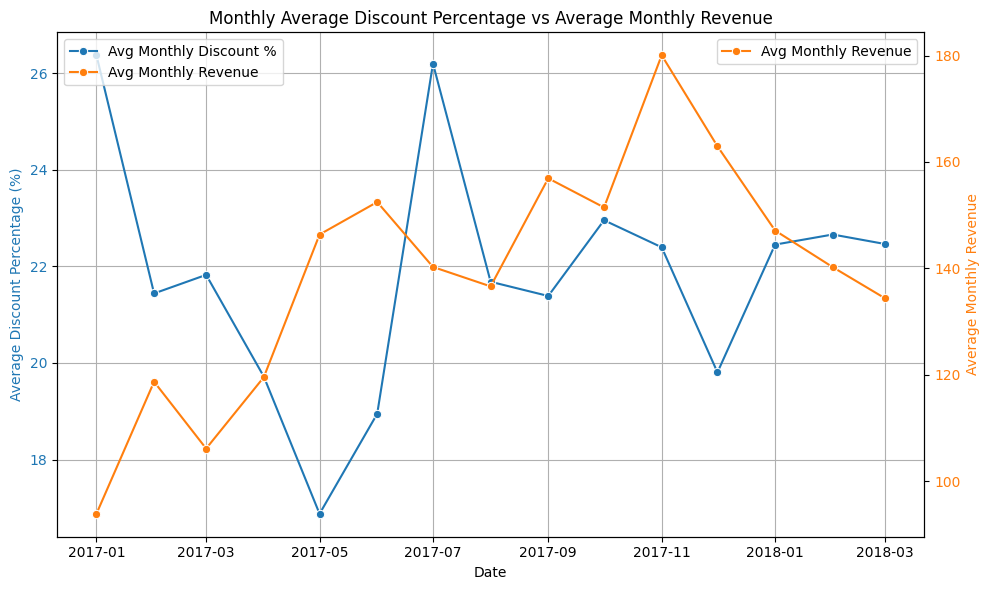

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' to period for monthly grouping
orderlines_products_discount['period'] = pd.to_datetime(orderlines_products_discount['date'].dt.to_period('M').astype(str))

# Calculate average discount percentage per month
monthly_avg_discount_pct = orderlines_products_discount.groupby('period')['discount_percentage'].mean().reset_index()

# Calculate revenue per row
orderlines_products_discount['revenue'] = orderlines_products_discount['unit_price'] * orderlines_products_discount['product_quantity']

# Calculate average monthly revenue (mean revenue per month)
monthly_avg_revenue = orderlines_products_discount.groupby('period')['revenue'].mean().reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Discount percentage on primary y-axis
sns.lineplot(data=monthly_avg_discount_pct, x='period', y='discount_percentage', marker='o', ax=ax1, color='tab:blue', label='Avg Monthly Discount %')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Discount Percentage (%)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# Revenue on secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=monthly_avg_revenue, x='period', y='revenue', marker='o', ax=ax2, color='tab:orange', label='Avg Monthly Revenue')
ax2.set_ylabel('Average Monthly Revenue', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Monthly Average Discount Percentage vs Average Monthly Revenue')
plt.xticks(rotation=45)

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()


## General Avg Monthly Discount VS Monthly Revenue (sum)

<ipython-input-144-55d7648c444f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['period'] = pd.to_datetime(orderlines_products_discount['date'].dt.to_period('M').astype(str))
<ipython-input-144-55d7648c444f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['revenue'] = orderlines_products_discount['unit_price'] * orderlines_products_discount['product_quantity']


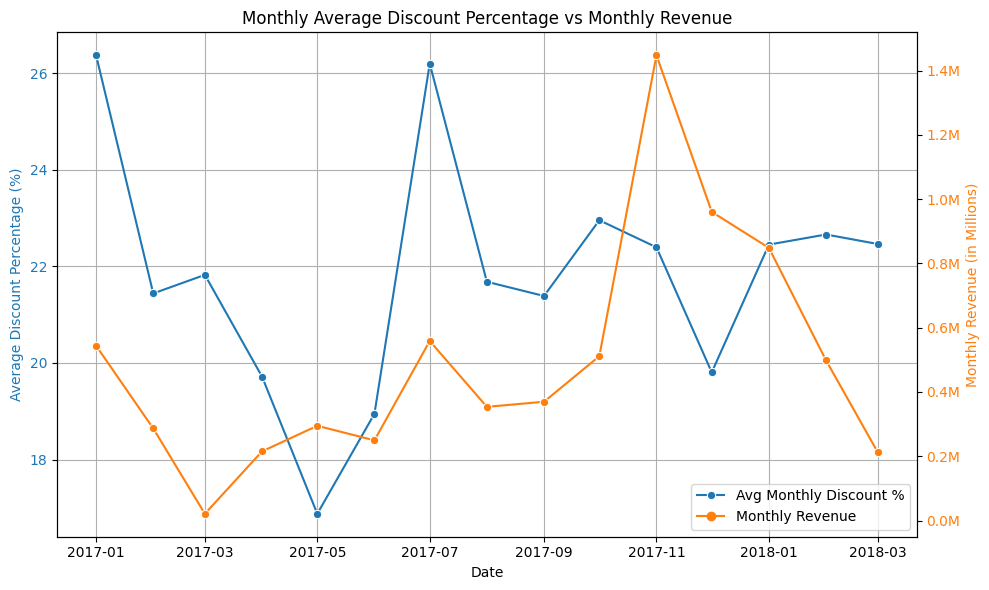

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Convert 'date' to period for monthly grouping
orderlines_products_discount['period'] = pd.to_datetime(orderlines_products_discount['date'].dt.to_period('M').astype(str))

# Calculate average discount percentage per month
monthly_avg_discount_pct = orderlines_products_discount.groupby('period')['discount_percentage'].mean().reset_index()

# Calculate revenue per row
orderlines_products_discount['revenue'] = orderlines_products_discount['unit_price'] * orderlines_products_discount['product_quantity']

# Calculate total monthly revenue
monthly_avg_revenue = orderlines_products_discount.groupby('period')['revenue'].sum().reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average discount percentage
sns.lineplot(
    data=monthly_avg_discount_pct,
    x='period',
    y='discount_percentage',
    marker='o',
    ax=ax1,
    color='tab:blue',
    label='Avg Monthly Discount %'
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Discount Percentage (%)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# Plot monthly revenue on secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(
    data=monthly_avg_revenue,
    x='period',
    y='revenue',
    marker='o',
    ax=ax2,
    color='tab:orange'
)
ax2.set_ylabel('Monthly Revenue (in Millions)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Format y-axis to show millions
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

plt.title('Monthly Average Discount Percentage vs Monthly Revenue')
plt.xticks(rotation=45)

# Custom combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
custom_line = plt.Line2D([0], [0], marker='o', color='tab:orange', label='Monthly Revenue')
ax1.legend(lines_1 + [custom_line], labels_1 + ['Monthly Revenue'], loc='lower right')

plt.tight_layout()
plt.show()


In [ ]:
orderlines_products_discount["main_category"].value_counts()

main_category
other            11335
peripherie       10648
storage           8589
case              6008
wireless          3086
pc_components     3040
smartphone        2825
tablet            1775
monitor           1355
server            1068
cable             1065
workstation        152
repair              44
Name: count, dtype: int64

In [ ]:
orderlines_products_discount.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50990 entries, 0 to 52554
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             50990 non-null  int64         
 1   product_quantity     50990 non-null  int64         
 2   sku                  50990 non-null  object        
 3   unit_price           50990 non-null  float64       
 4   date                 50990 non-null  datetime64[ns]
 5   name                 50990 non-null  object        
 6   price                50990 non-null  float64       
 7   type                 50983 non-null  object        
 8   main_category        50990 non-null  object        
 9   sub_category         50990 non-null  object        
 10  discount             50990 non-null  float64       
 11  discount_status      50990 non-null  object        
 12  discount_percentage  50990 non-null  float64       
 13  period               50990 non-null 

In [ ]:
orderlines_products_discount["sub_category"].value_counts()

sub_category
other                     10215
iphone_case                4200
external_storage           3553
memory                     3039
wirless_device             3002
                          ...  
external_storage, ipad        1
memory, open                  1
battery, open                 1
speaker, open, battery        1
screen_protector, open        1
Name: count, Length: 84, dtype: int64

# **Check how Revenue is affected due to discount sales**

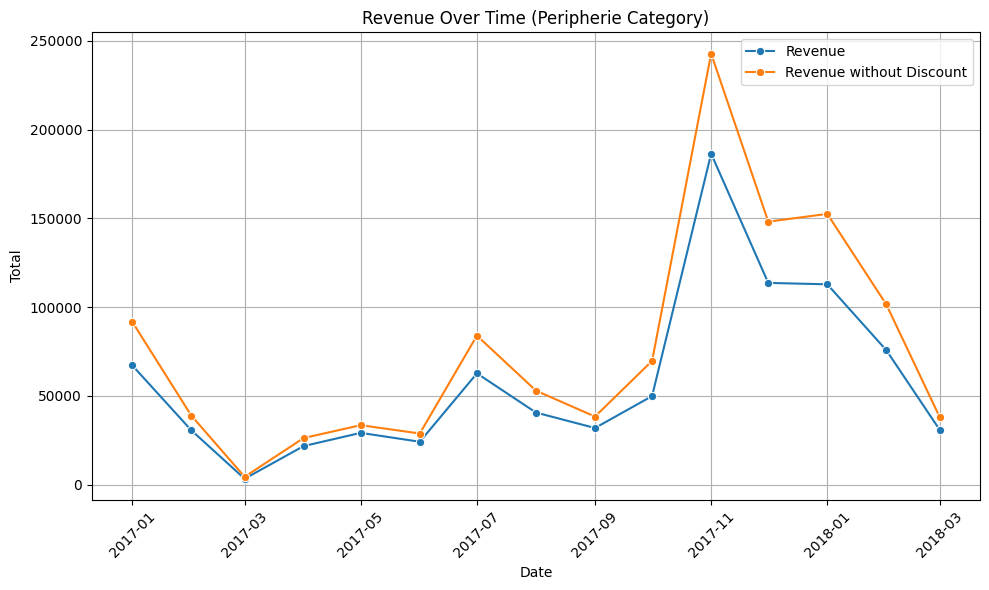

In [ ]:
category_filtered = orderlines_products_discount.loc[
    (orderlines_products_discount["main_category"] == "peripherie"), :
].copy()
# Convert 'date' to datetime and then to period
category_filtered['period'] = pd.to_datetime(category_filtered['date'].dt.to_period('M').astype(str))

# unit_price_total (revenue with discount)
category_filtered['unit_price_total'] = category_filtered['unit_price'] * category_filtered['product_quantity']

# revenue without discount
category_filtered['revenue_without_discount'] = category_filtered['price'] * category_filtered['product_quantity']

# the revenue per period
monthly_revenue_peripherie = category_filtered.groupby('period')['unit_price_total'].sum().reset_index()
monthly_revenue_without_discount = category_filtered.groupby('period')['revenue_without_discount'].sum().reset_index()


# Use a line plot to show  revenue over time
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.lineplot(data=monthly_revenue_peripherie, x='period', y='unit_price_total', marker='o', label='Revenue')
sns.lineplot(data=monthly_revenue_without_discount, x='period', y='revenue_without_discount', marker='o', label='Revenue without Discount')
plt.title("Revenue Over Time (Peripherie Category)")
plt.xlabel("Date")
plt.ylabel("Total")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.legend()
plt.show()

## Total Revenue (sum) with and without Discount (sum)

<ipython-input-149-3766efd59abe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['period'] = pd.to_datetime(orderlines_products_discount['date'].dt.to_period('M').astype(str))
<ipython-input-149-3766efd59abe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['unit_price_total'] = orderlines_products_discount['unit_price'] * orderlines_products_discount['product_quantity']
<ipython-input-149-3766efd59abe>:8: SettingWithCopyWarning: 
A value is trying 

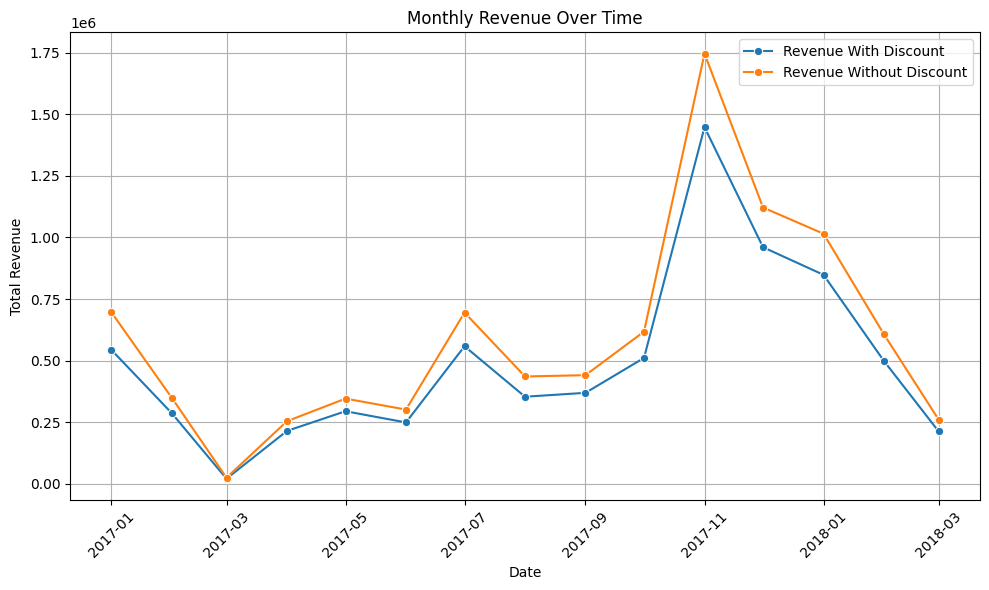

In [ ]:
# Convert 'date' to datetime and then to period
orderlines_products_discount['period'] = pd.to_datetime(orderlines_products_discount['date'].dt.to_period('M').astype(str))

# Calculate unit_price_total (revenue with discount)
orderlines_products_discount['unit_price_total'] = orderlines_products_discount['unit_price'] * orderlines_products_discount['product_quantity']

# Calculate revenue without discount
orderlines_products_discount['revenue_without_discount'] = orderlines_products_discount['price'] * orderlines_products_discount['product_quantity']

# Calculate the revenue per period
monthly_revenue_with_discount = orderlines_products_discount.groupby('period').agg(
    Revenue=('unit_price_total', 'sum')
).reset_index()
monthly_revenue_without_discount = orderlines_products_discount.groupby('period').agg(
    Revenue_without_Discount=('revenue_without_discount', 'sum')
).reset_index()


# Use a line plot to show  revenue over time
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.lineplot(data=monthly_revenue_with_discount, x='period', y='Revenue', marker='o', label='Revenue With Discount')
sns.lineplot(data=monthly_revenue_without_discount, x='period', y='Revenue_without_Discount', marker='o', label='Revenue Without Discount')
plt.title("Monthly Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.legend()
plt.show();


# Monthly Order Counts VS Monthly Avg Delivery Costs

<ipython-input-150-e405e463955a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['season'] = 'Regular'
<ipython-input-150-e405e463955a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)


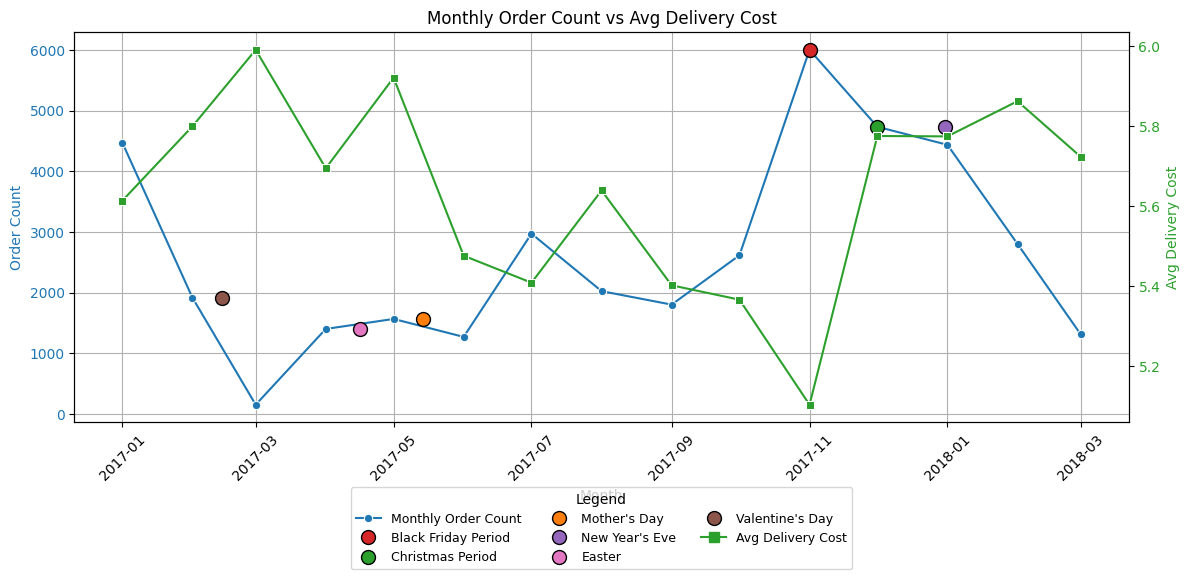

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Season assignment ---
black_friday_range = ((orderlines_products_discount['date'].dt.month == 11) &
                      (orderlines_products_discount['date'].dt.day >= 24) &
                      (orderlines_products_discount['date'].dt.day <= 30))

christmas_range = ((orderlines_products_discount['date'].dt.month == 12) &
                   (orderlines_products_discount['date'].dt.day >= 20) &
                   (orderlines_products_discount['date'].dt.day <= 26))

orderlines_products_discount['season'] = 'Regular'
orderlines_products_discount.loc[black_friday_range, 'season'] = 'Black Friday'
orderlines_products_discount.loc[christmas_range, 'season'] = 'Christmas'

# --- Create period column for monthly grouping ---
orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)
orders_with_delivery_costs['period'] = orders_with_delivery_costs['created_date'].dt.to_period('M').astype(str)

# --- Monthly order counts ---
monthly_order_counts = orderlines_products_discount.groupby('period')['order_id'].nunique().reset_index()
monthly_order_counts.rename(columns={'order_id': 'order_count'}, inplace=True)

# Assign season to monthly_order_counts
monthly_order_counts['season'] = 'Regular'
monthly_order_counts.loc[
    monthly_order_counts['period'].isin(orderlines_products_discount.loc[black_friday_range, 'period']),
    'season'] = 'Black Friday'
monthly_order_counts.loc[
    monthly_order_counts['period'].isin(orderlines_products_discount.loc[christmas_range, 'period']),
    'season'] = 'Christmas'

# --- Monthly average delivery cost (not percentage) ---
monthly_avg_delivery_cost = orders_with_delivery_costs.groupby('period')['delivery_costs'].mean().reset_index()
monthly_avg_delivery_cost.rename(columns={'delivery_costs': 'avg_delivery_cost'}, inplace=True)

# Convert period columns to datetime for plotting
monthly_order_counts['period'] = pd.to_datetime(monthly_order_counts['period'])
monthly_avg_delivery_cost['period'] = pd.to_datetime(monthly_avg_delivery_cost['period'])

# Merge the two datasets
combined_df = pd.merge(monthly_order_counts, monthly_avg_delivery_cost, on='period', how='inner')

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot order count on primary y-axis
color1 = 'tab:blue'
line1 = sns.lineplot(data=combined_df, x='period', y='order_count', marker='o', ax=ax1, color=color1, label='Monthly Order Count')
ax1.set_xlabel('Month')
ax1.set_ylabel('Order Count', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_title("Monthly Order Count vs Avg Delivery Cost")
ax1.grid(True)
plt.xticks(rotation=45)

# Highlight seasons
for season, color in {'Black Friday': 'tab:red', 'Christmas': 'tab:green'}.items():
    season_data = combined_df[combined_df['season'] == season]
    ax1.scatter(season_data['period'], season_data['order_count'], s=100, color=color, label=f'{season} Period', zorder=5, edgecolor='black')

# Special days
special_days = {
    'Mother\'s Day': '2017-05-14',
    'New Year\'s Eve': '2017-12-31',
    'Easter': '2017-04-16',
    'Valentine\'s Day': '2017-02-14',
}
special_colors = {
    'Mother\'s Day': 'tab:orange',
    'New Year\'s Eve': 'tab:purple',
    'Easter': 'tab:pink',
    'Valentine\'s Day': 'tab:brown',
}

special_days_dt = {k: pd.to_datetime(v) for k, v in special_days.items()}
for day, dt_val in special_days_dt.items():
    period_str = dt_val.to_period('M').strftime('%Y-%m')
    day_data = combined_df[combined_df['period'] == pd.to_datetime(period_str)]
    if not day_data.empty:
        y_val = day_data['order_count'].values[0]
        ax1.scatter(dt_val, y_val, s=100, color=special_colors[day], label=day, zorder=6, edgecolor='black')

# Plot average delivery cost on secondary y-axis
ax2 = ax1.twinx()
color2 = 'tab:green'
line2 = sns.lineplot(data=combined_df, x='period', y='avg_delivery_cost', marker='s', ax=ax2, color=color2)
ax2.set_ylabel('Avg Delivery Cost', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Legend
handles = [line1.get_lines()[0]]
labels = ['Monthly Order Count']

for season, color in {'Black Friday': 'tab:red', 'Christmas': 'tab:green'}.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, markeredgecolor='black'))
    labels.append(f'{season} Period')

for day, color in special_colors.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, markeredgecolor='black'))
    labels.append(day)

handles.append(plt.Line2D([0], [0], marker='s', color=color2, linestyle='-', markersize=7))
labels.append('Avg Delivery Cost')

ax1.legend(
    handles, labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    title='Legend',
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout()
plt.show()


## Monthly Order Counts VS Monthly Avg Delivery Costs Percentage

<ipython-input-151-aff6119581ba>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['season'] = 'Regular'
<ipython-input-151-aff6119581ba>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)


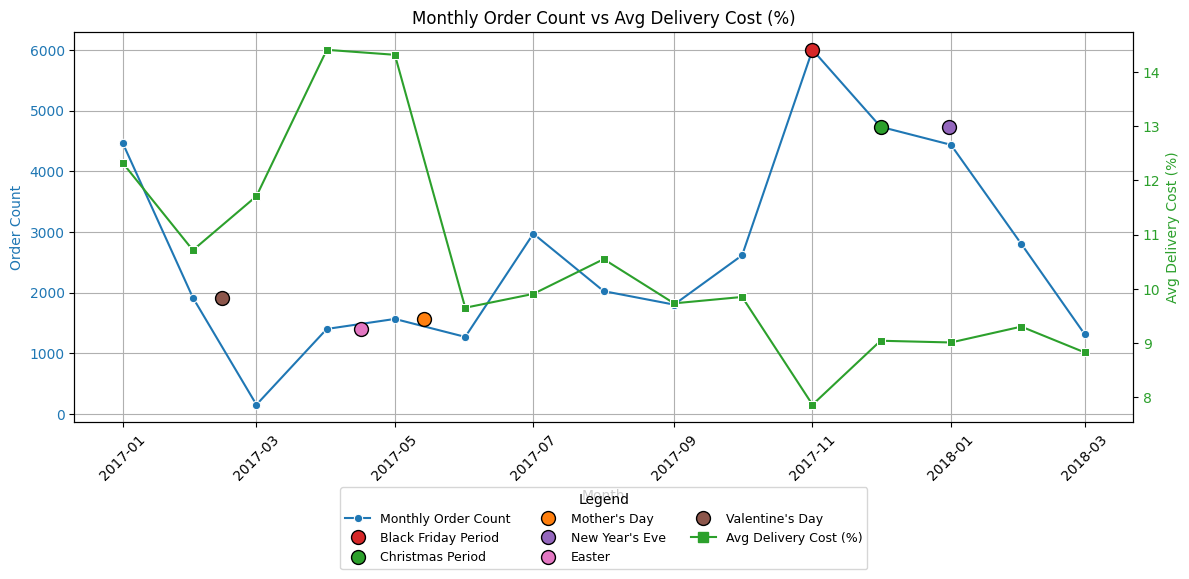

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Season assignment ---
black_friday_range = ((orderlines_products_discount['date'].dt.month == 11) &
                      (orderlines_products_discount['date'].dt.day >= 24) &
                      (orderlines_products_discount['date'].dt.day <= 30))

christmas_range = ((orderlines_products_discount['date'].dt.month == 12) &
                   (orderlines_products_discount['date'].dt.day >= 20) &
                   (orderlines_products_discount['date'].dt.day <= 26))

orderlines_products_discount['season'] = 'Regular'
orderlines_products_discount.loc[black_friday_range, 'season'] = 'Black Friday'
orderlines_products_discount.loc[christmas_range, 'season'] = 'Christmas'

# --- Create period column for monthly grouping ---
orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').astype(str)
orders_with_delivery_costs['period'] = orders_with_delivery_costs['created_date'].dt.to_period('M').astype(str)

# --- Monthly order counts ---
monthly_order_counts = orderlines_products_discount.groupby('period')['order_id'].nunique().reset_index()
monthly_order_counts.rename(columns={'order_id': 'order_count'}, inplace=True)

# Assign season to monthly_order_counts
monthly_order_counts['season'] = 'Regular'
monthly_order_counts.loc[
    monthly_order_counts['period'].isin(orderlines_products_discount.loc[black_friday_range, 'period']),
    'season'] = 'Black Friday'
monthly_order_counts.loc[
    monthly_order_counts['period'].isin(orderlines_products_discount.loc[christmas_range, 'period']),
    'season'] = 'Christmas'

# --- Monthly average delivery cost percentage ---
monthly_avg_delivery_cost_pct = orders_with_delivery_costs.groupby('period')['delivery_cost_percentages'].mean().reset_index()
monthly_avg_delivery_cost_pct.rename(columns={'delivery_cost_percentages': 'avg_delivery_cost_pct'}, inplace=True)

# Convert period columns to datetime for plotting
monthly_order_counts['period'] = pd.to_datetime(monthly_order_counts['period'])
monthly_avg_delivery_cost_pct['period'] = pd.to_datetime(monthly_avg_delivery_cost_pct['period'])

# Merge the two datasets
combined_df = pd.merge(monthly_order_counts, monthly_avg_delivery_cost_pct, on='period', how='inner')

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot order count on primary y-axis
color1 = 'tab:blue'
line1 = sns.lineplot(data=combined_df, x='period', y='order_count', marker='o', ax=ax1, color=color1, label='Monthly Order Count')
ax1.set_xlabel('Month')
ax1.set_ylabel('Order Count', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_title("Monthly Order Count vs Avg Delivery Cost (%)")
ax1.grid(True)
plt.xticks(rotation=45)

# Highlight seasons
for season, color in {'Black Friday': 'tab:red', 'Christmas': 'tab:green'}.items():
    season_data = combined_df[combined_df['season'] == season]
    ax1.scatter(season_data['period'], season_data['order_count'], s=100, color=color, label=f'{season} Period', zorder=5, edgecolor='black')

# Special days
special_days = {
    'Mother\'s Day': '2017-05-14',
    'New Year\'s Eve': '2017-12-31',
    'Easter': '2017-04-16',
    'Valentine\'s Day': '2017-02-14',
}
special_colors = {
    'Mother\'s Day': 'tab:orange',
    'New Year\'s Eve': 'tab:purple',
    'Easter': 'tab:pink',
    'Valentine\'s Day': 'tab:brown',
}

special_days_dt = {k: pd.to_datetime(v) for k, v in special_days.items()}
for day, dt_val in special_days_dt.items():
    period_str = dt_val.to_period('M').strftime('%Y-%m')
    day_data = combined_df[combined_df['period'] == pd.to_datetime(period_str)]
    if not day_data.empty:
        y_val = day_data['order_count'].values[0]
        ax1.scatter(dt_val, y_val, s=100, color=special_colors[day], label=day, zorder=6, edgecolor='black')

# Plot average delivery cost percentage on secondary y-axis
ax2 = ax1.twinx()
color2 = 'tab:green'
line2 = sns.lineplot(data=combined_df, x='period', y='avg_delivery_cost_pct', marker='s', ax=ax2, color=color2)
ax2.set_ylabel('Avg Delivery Cost (%)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

#
handles = [line1.get_lines()[0]]
labels = ['Monthly Order Count']

for season, color in {'Black Friday': 'tab:red', 'Christmas': 'tab:green'}.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, markeredgecolor='black'))
    labels.append(f'{season} Period')

for day, color in special_colors.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, markeredgecolor='black'))
    labels.append(day)

handles.append(plt.Line2D([0], [0], marker='s', color=color2, linestyle='-', markersize=7))
labels.append('Avg Delivery Cost (%)')

ax1.legend(
    handles, labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    title='Legend',
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout()
plt.show()


# Distribution of Main Categories

## Distribution of Product Prices (unit_price_total) in different Main Categories over Time (Monthly)

<ipython-input-152-5b500524ac95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['period'] = pd.to_datetime(orderlines_products_discount['period'])


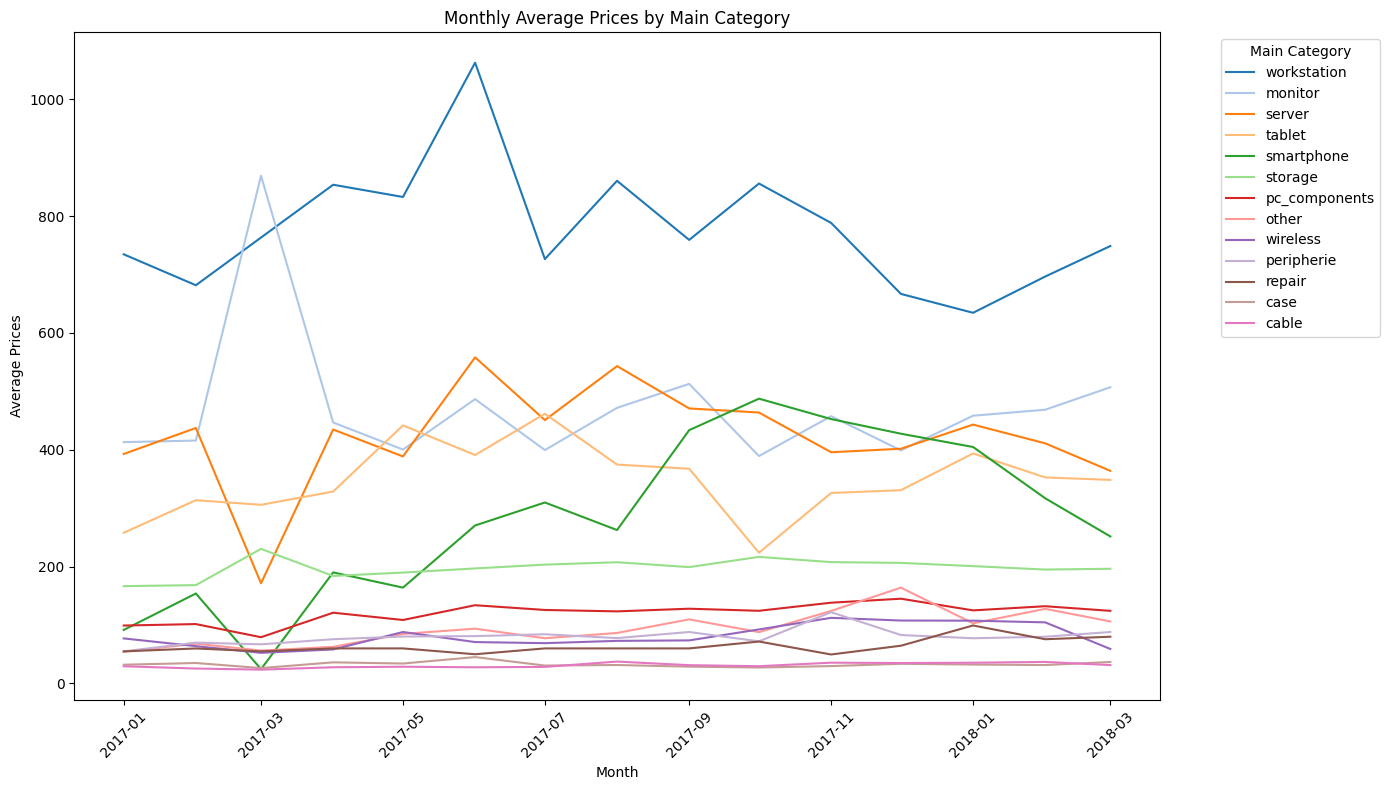

In [ ]:
# Ensure 'period' is datetime type for sorting and plotting
orderlines_products_discount['period'] = pd.to_datetime(orderlines_products_discount['period'])

# Group by period and main_category, then calculate average unit_price_total
monthly_avg_price = (
    orderlines_products_discount
    .groupby(['period', 'main_category'])['unit_price_total']
    .mean()
    .reset_index()
)

# Optional: Sort categories by overall mean price or frequency for better legend ordering
category_order = (
    monthly_avg_price.groupby('main_category')['unit_price_total']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

plt.figure(figsize=(14, 8))

# Plot with seaborn lineplot for each main_category
sns.lineplot(
    data=monthly_avg_price,
    x='period',
    y='unit_price_total',
    hue='main_category',
    palette='tab20',
    hue_order=category_order
)

plt.title('Monthly Average Prices by Main Category')
plt.xlabel('Month')
plt.ylabel('Average Prices')
plt.xticks(rotation=45)
plt.legend(title='Main Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## the plot divided to 2

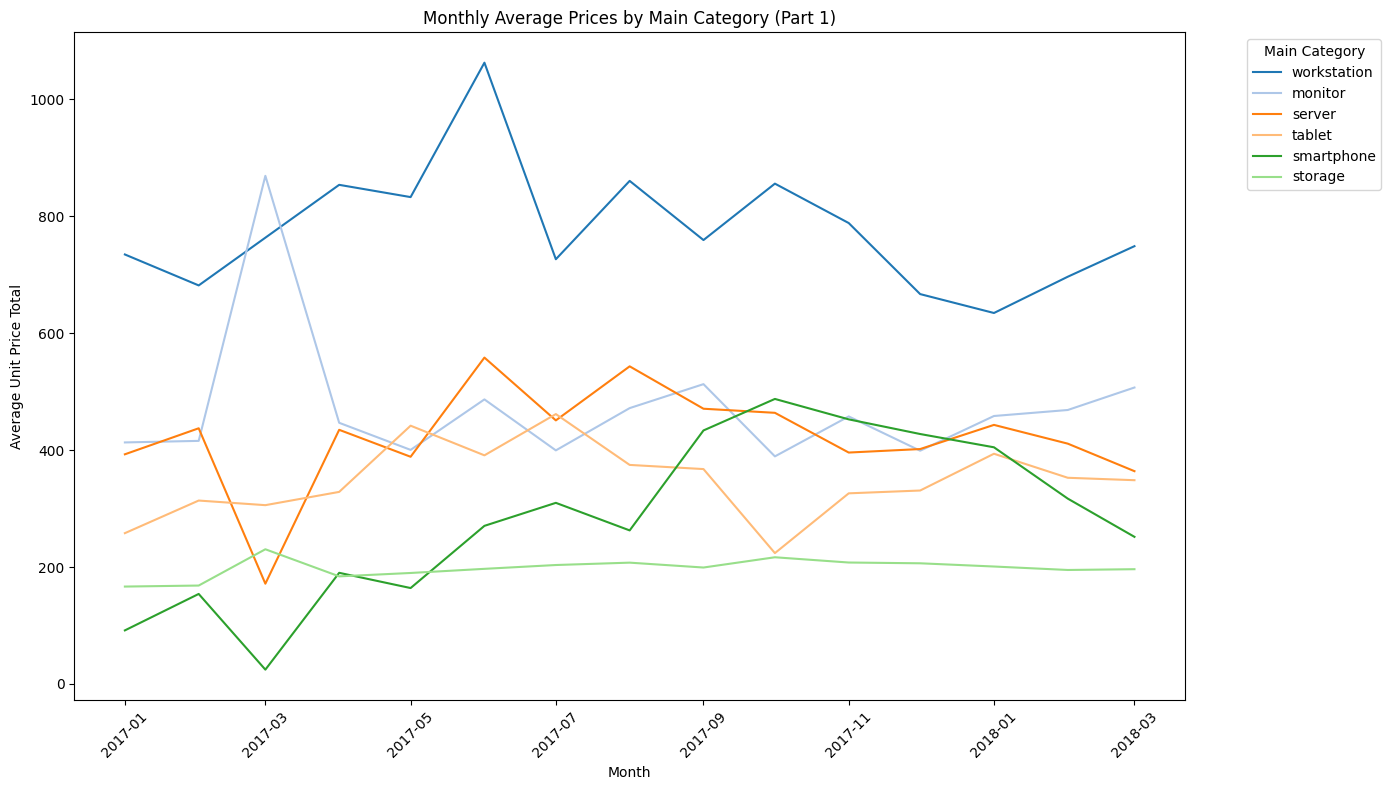

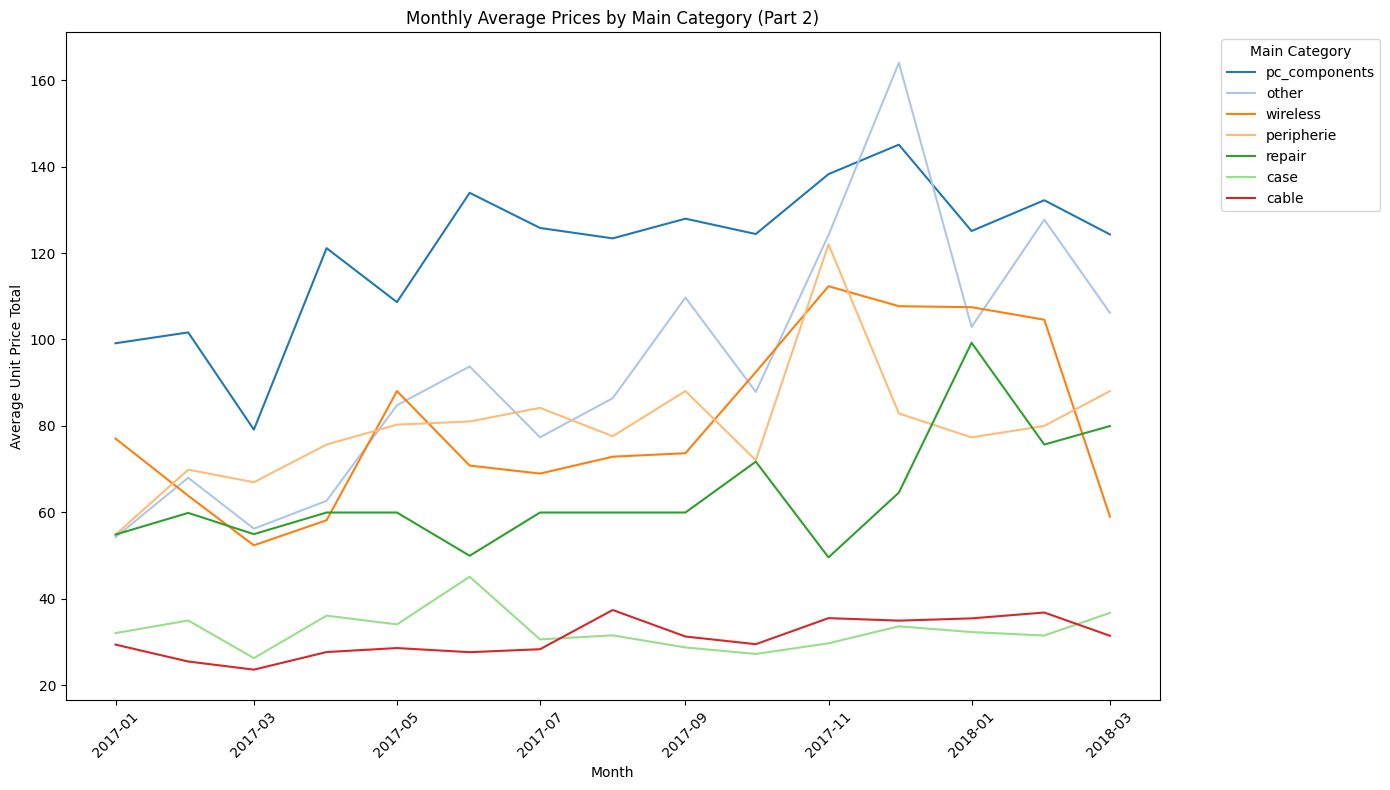

In [ ]:
# Group by period and main_category, then calculate average unit_price_total
monthly_avg_price = (
    orderlines_products_discount
    .groupby(['period', 'main_category'])['unit_price_total']
    .mean()
    .reset_index()
)

# Sort categories by overall mean price descending
category_order = (
    monthly_avg_price.groupby('main_category')['unit_price_total']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

# Split categories into two halves
half = len(category_order) // 2
first_half = category_order[:half]
second_half = category_order[half:]

# Plot 1 - first half of categories
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=monthly_avg_price[monthly_avg_price['main_category'].isin(first_half)],
    x='period',
    y='unit_price_total',
    hue='main_category',
    palette='tab20',
    hue_order=first_half
)
plt.title('Monthly Average Prices by Main Category (Part 1)')
plt.xlabel('Month')
plt.ylabel('Average Unit Price Total')
plt.xticks(rotation=45)
plt.legend(title='Main Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot 2 - second half of categories
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=monthly_avg_price[monthly_avg_price['main_category'].isin(second_half)],
    x='period',
    y='unit_price_total',
    hue='main_category',
    palette='tab20',
    hue_order=second_half
)
plt.title('Monthly Average Prices by Main Category (Part 2)')
plt.xlabel('Month')
plt.ylabel('Average Unit Price Total')
plt.xticks(rotation=45)
plt.legend(title='Main Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Distribution of Product Discounts (discount_percentage) in different Main Categories over Time (Monthly)

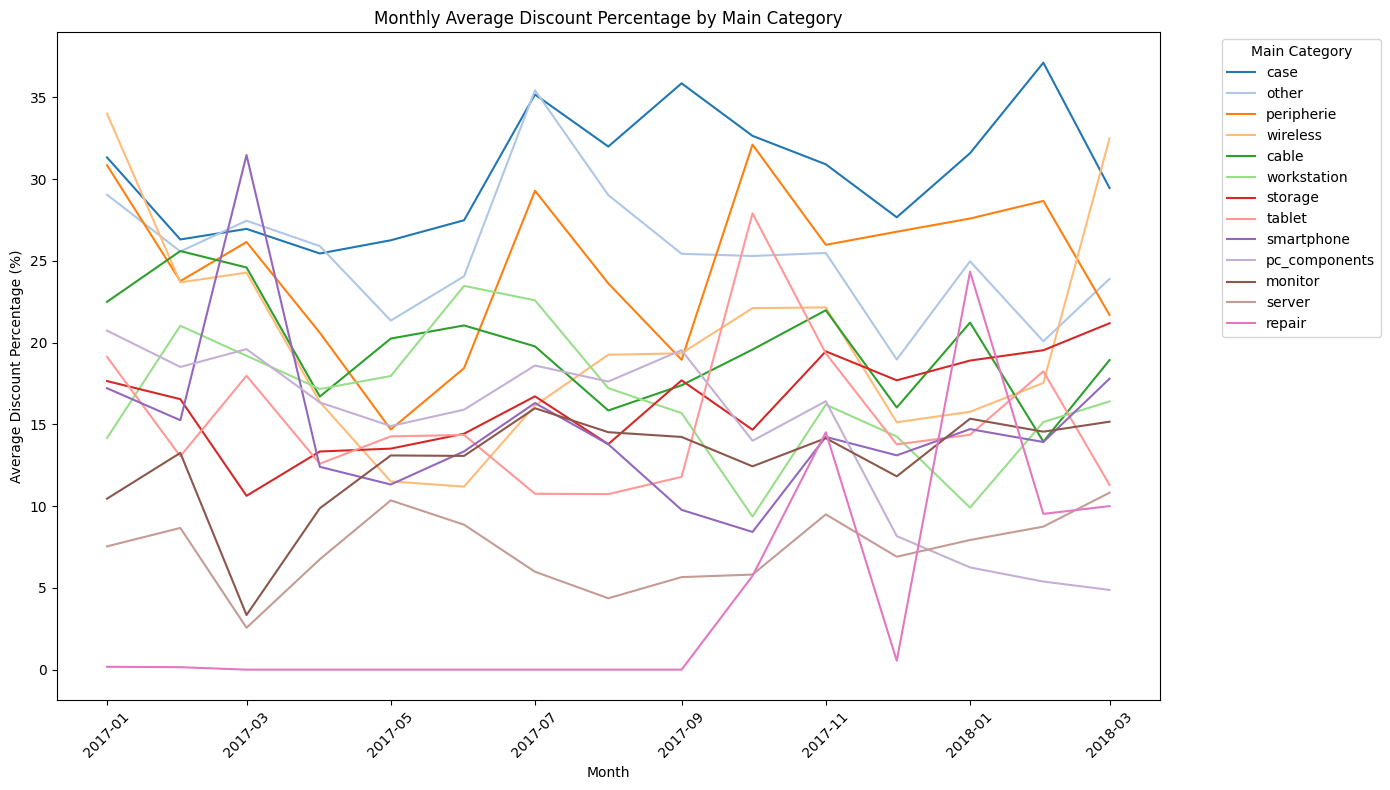

In [ ]:
# Group by period and main_category, then calculate average discount_percentage
monthly_avg_discount = (
    orderlines_products_discount
    .groupby(['period', 'main_category'])['discount_percentage']
    .mean()
    .reset_index()
)

# Sort main_categories by overall average discount for better legend order
category_order = (
    monthly_avg_discount.groupby('main_category')['discount_percentage']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

plt.figure(figsize=(14, 8))

# Plot monthly average discount percentage per main_category
sns.lineplot(
    data=monthly_avg_discount,
    x='period',
    y='discount_percentage',
    hue='main_category',
    palette='tab20',
    hue_order=category_order
)

plt.title('Monthly Average Discount Percentage by Main Category')
plt.xlabel('Month')
plt.ylabel('Average Discount Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Main Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Distribution of Product Number of Orders/sales (order_id(sum)) in different Main Categories over Time (Monthly)

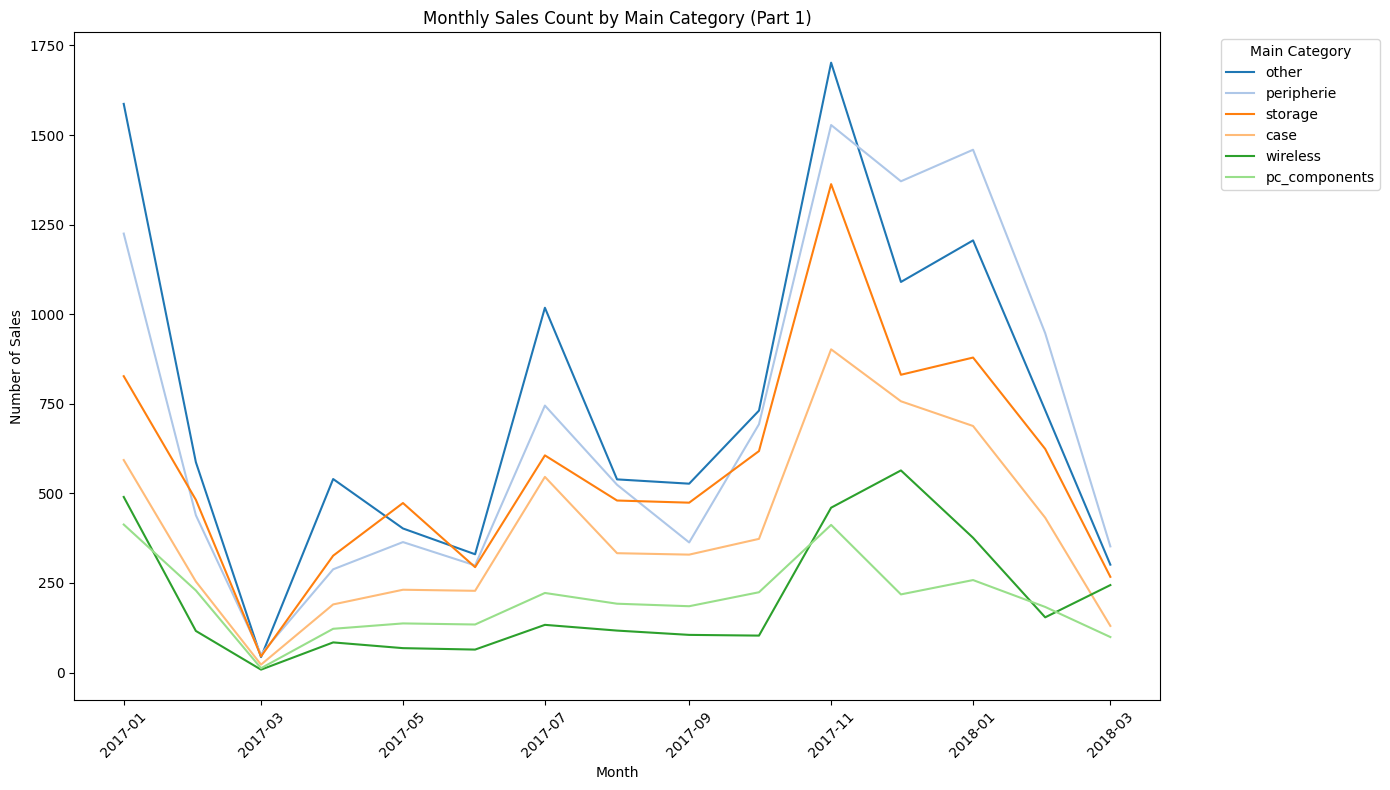

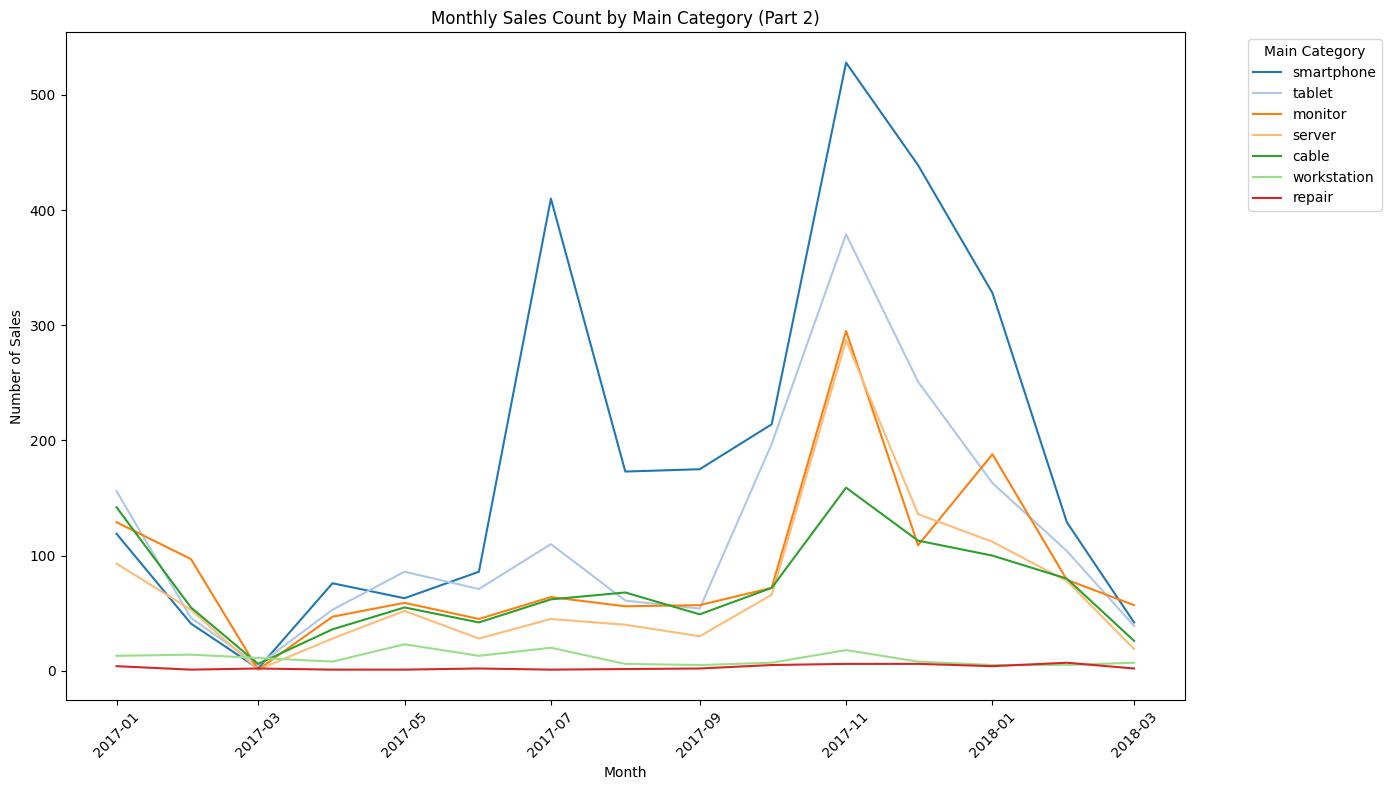

In [ ]:
# Group by period and main_category, then count number of sales
monthly_sales_count = (
    orderlines_products_discount
    .groupby(['period', 'main_category'])['order_id']  # counting orders per category
    .count()
    .reset_index(name='sales_count')
)

# Sort categories by overall total sales descending
category_order = (
    monthly_sales_count.groupby('main_category')['sales_count']
    .sum()
    .sort_values(ascending=False)
    .index.tolist()
)

# Split categories into two halves
half = len(category_order) // 2
first_half = category_order[:half]
second_half = category_order[half:]

# Plot 1 - first half of categories
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=monthly_sales_count[monthly_sales_count['main_category'].isin(first_half)],
    x='period',
    y='sales_count',
    hue='main_category',
    palette='tab20',
    hue_order=first_half
)
plt.title('Monthly Sales Count by Main Category (Part 1)')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.legend(title='Main Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot 2 - second half of categories
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=monthly_sales_count[monthly_sales_count['main_category'].isin(second_half)],
    x='period',
    y='sales_count',
    hue='main_category',
    palette='tab20',
    hue_order=second_half
)
plt.title('Monthly Sales Count by Main Category (Part 2)')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.legend(title='Main Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Avg Discount % AOP (Average Order Price)


## AOP= Revenue/ Order Count

<ipython-input-156-f427f0d96e9b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['date'] = pd.to_datetime(orderlines_products_discount['date'])
<ipython-input-156-f427f0d96e9b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').dt.to_timestamp()
<ipython-input-156-f427f0d96e9b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

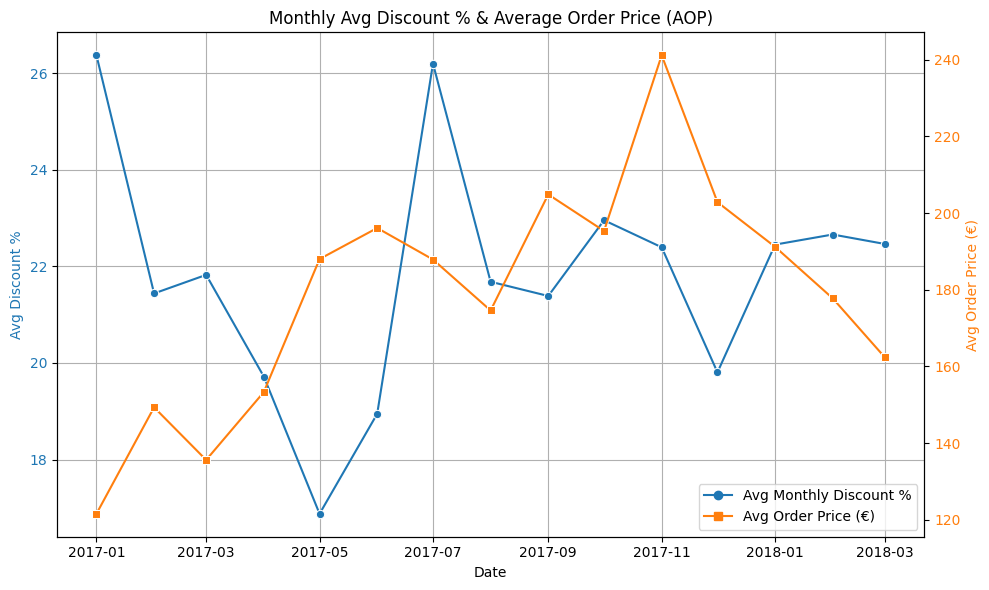

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Ensure 'date' is datetime
orderlines_products_discount['date'] = pd.to_datetime(orderlines_products_discount['date'])

# Create 'period' column as YYYY-MM
orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').dt.to_timestamp()

# Calculate revenue per row
orderlines_products_discount['revenue'] = (
    orderlines_products_discount['unit_price'] * orderlines_products_discount['product_quantity']
)

# --- Monthly average discount percentage ---
monthly_avg_discount_pct = (
    orderlines_products_discount
    .groupby('period')['discount_percentage']
    .mean()
    .reset_index()
)

# --- Monthly total revenue and order count ---
monthly_stats = (
    orderlines_products_discount
    .groupby('period')
    .agg(total_revenue=('revenue', 'sum'),
         order_count=('order_id', 'nunique'))  # Unique order IDs per month
    .reset_index()
)

# Calculate AOP
monthly_stats['avg_order_price'] = monthly_stats['total_revenue'] / monthly_stats['order_count']

# --- Merge with discount data ---
combined_df = pd.merge(monthly_avg_discount_pct, monthly_stats, on='period', how='inner')

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Avg Discount % on left y-axis
sns.lineplot(
    data=combined_df,
    x='period',
    y='discount_percentage',
    marker='o',
    ax=ax1,
    color='tab:blue',
    label='Avg Monthly Discount %'
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Discount %', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# Avg Order Price on right y-axis
ax2 = ax1.twinx()
sns.lineplot(
    data=combined_df,
    x='period',
    y='avg_order_price',
    marker='s',
    ax=ax2,
    color='tab:orange'
)
ax2.set_ylabel('Avg Order Price (€)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Legend
custom_lines = [
    plt.Line2D([0], [0], color='tab:blue', marker='o', label='Avg Monthly Discount %'),
    plt.Line2D([0], [0], color='tab:orange', marker='s', label='Avg Order Price (€)')
]
ax1.legend(handles=custom_lines, loc='lower right')

plt.title('Monthly Avg Discount % & Average Order Price (AOP)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## With special days included

<ipython-input-157-7865702f8172>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['date'] = pd.to_datetime(orderlines_products_discount['date'])
<ipython-input-157-7865702f8172>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').dt.to_timestamp()
<ipython-input-157-7865702f8172>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

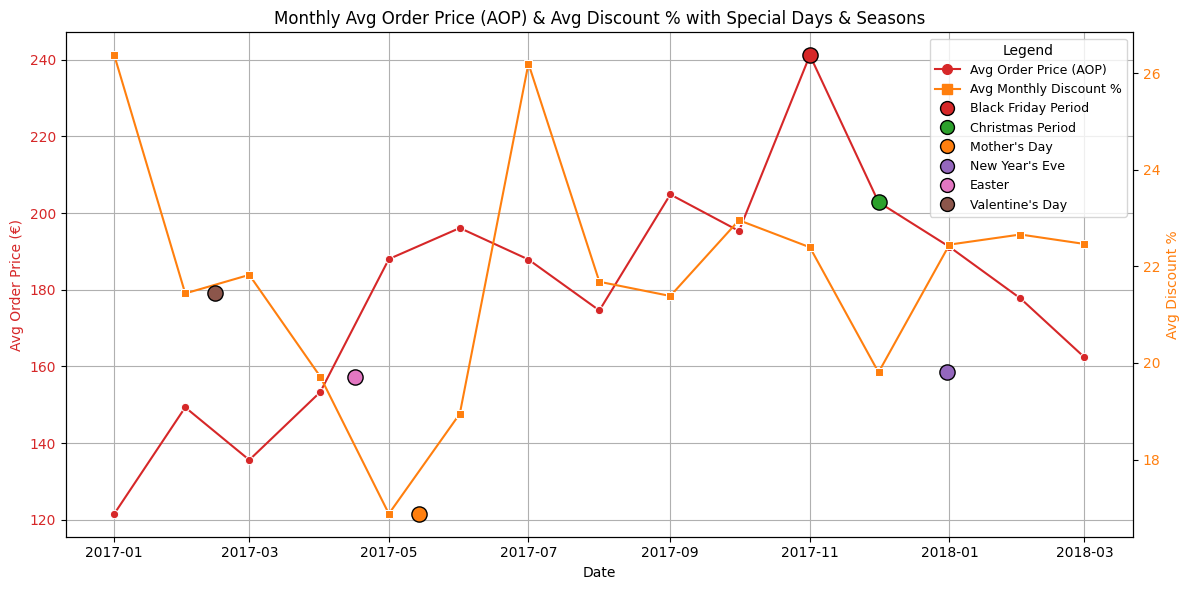

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'date' is datetime
orderlines_products_discount['date'] = pd.to_datetime(orderlines_products_discount['date'])

# Create 'period' column as YYYY-MM timestamp
orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').dt.to_timestamp()

# Calculate revenue per row
orderlines_products_discount['revenue'] = (
    orderlines_products_discount['unit_price'] * orderlines_products_discount['product_quantity']
)

# --- Monthly average discount percentage ---
monthly_avg_discount_pct = (
    orderlines_products_discount
    .groupby('period')['discount_percentage']
    .mean()
    .reset_index()
)

# --- Monthly total revenue and order count ---
monthly_stats = (
    orderlines_products_discount
    .groupby('period')
    .agg(total_revenue=('revenue', 'sum'),
         order_count=('order_id', 'nunique'))  # Unique order IDs per month
    .reset_index()
)

# Calculate AOP
monthly_stats['avg_order_price'] = monthly_stats['total_revenue'] / monthly_stats['order_count']

# --- Merge with discount data ---
combined_df = pd.merge(monthly_avg_discount_pct, monthly_stats, on='period', how='inner')

# --- Season assignment for special periods ---
black_friday_range = ((orderlines_products_discount['date'].dt.month == 11) &
                      (orderlines_products_discount['date'].dt.day >= 24) &
                      (orderlines_products_discount['date'].dt.day <= 30))

christmas_range = ((orderlines_products_discount['date'].dt.month == 12) &
                   (orderlines_products_discount['date'].dt.day >= 20) &
                   (orderlines_products_discount['date'].dt.day <= 26))

orderlines_products_discount['season'] = 'Regular'
orderlines_products_discount.loc[black_friday_range, 'season'] = 'Black Friday'
orderlines_products_discount.loc[christmas_range, 'season'] = 'Christmas'

# Assign season to combined_df based on period
combined_df['season'] = 'Regular'
combined_df.loc[
    combined_df['period'].isin(orderlines_products_discount.loc[black_friday_range, 'period']),
    'season'] = 'Black Friday'
combined_df.loc[
    combined_df['period'].isin(orderlines_products_discount.loc[christmas_range, 'period']),
    'season'] = 'Christmas'

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Avg Order Price (AOP) on left y-axis (red), no legend auto
sns.lineplot(
    data=combined_df,
    x='period',
    y='avg_order_price',
    marker='o',
    ax=ax1,
    color='tab:red',
    label=None  # disable auto legend here
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Order Price (€)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.grid(True)

# Avg Discount % on right y-axis (orange), no legend auto
ax2 = ax1.twinx()
sns.lineplot(
    data=combined_df,
    x='period',
    y='discount_percentage',
    marker='s',
    ax=ax2,
    color='tab:orange',
    label=None  # disable auto legend here
)
ax2.set_ylabel('Avg Discount %', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# --- Special days ---
special_days = {
    "Mother's Day": '2017-05-14',
    "New Year's Eve": '2017-12-31',
    "Easter": '2017-04-16',
    "Valentine's Day": '2017-02-14',
}
special_colors = {
    "Mother's Day": 'tab:orange',
    "New Year's Eve": 'tab:purple',
    "Easter": 'tab:pink',
    "Valentine's Day": 'tab:brown',
}

special_days_dt = {k: pd.to_datetime(v) for k, v in special_days.items()}

for day, dt_val in special_days_dt.items():
    period_start = dt_val.to_period('M').to_timestamp()
    day_data = combined_df[combined_df['period'] == period_start]
    if not day_data.empty:
        y_val = day_data['discount_percentage'].values[0]
        ax2.scatter(dt_val, y_val, s=120, color=special_colors[day], label=day, zorder=6, edgecolor='black')

# --- Highlight seasons on AOP line (left axis) ---
for season, color in {'Black Friday': 'tab:red', 'Christmas': 'tab:green'}.items():
    season_data = combined_df[combined_df['season'] == season]
    ax1.scatter(season_data['period'], season_data['avg_order_price'], s=120, color=color, label=f'{season} Period', zorder=5, edgecolor='black')

# --- Create manual legend ---

handles = []
labels = []

# Add lines for Avg Order Price and Avg Discount %
handles.append(plt.Line2D([0], [0], color='tab:red', marker='o', label='Avg Order Price (AOP)', markersize=7))
labels.append('Avg Order Price (AOP)')

handles.append(plt.Line2D([0], [0], color='tab:orange', marker='s', label='Avg Monthly Discount %', markersize=7))
labels.append('Avg Monthly Discount %')

# Add season dots
for season, color in {'Black Friday': 'tab:red', 'Christmas': 'tab:green'}.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, markeredgecolor='black'))
    labels.append(f'{season} Period')

# Add special days dots
for day, color in special_colors.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, markeredgecolor='black'))
    labels.append(day)

ax1.legend(handles=handles, labels=labels, loc='upper right', fontsize=9, title='Legend', title_fontsize=10)

plt.title('Monthly Avg Order Price (AOP) & Avg Discount % with Special Days & Seasons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Christmas is exacly on 25th Dec, and Black friday is on 25th November on the plot.

<ipython-input-158-c38beda35814>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['date'] = pd.to_datetime(orderlines_products_discount['date'])
<ipython-input-158-c38beda35814>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').dt.to_timestamp()
<ipython-input-158-c38beda35814>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

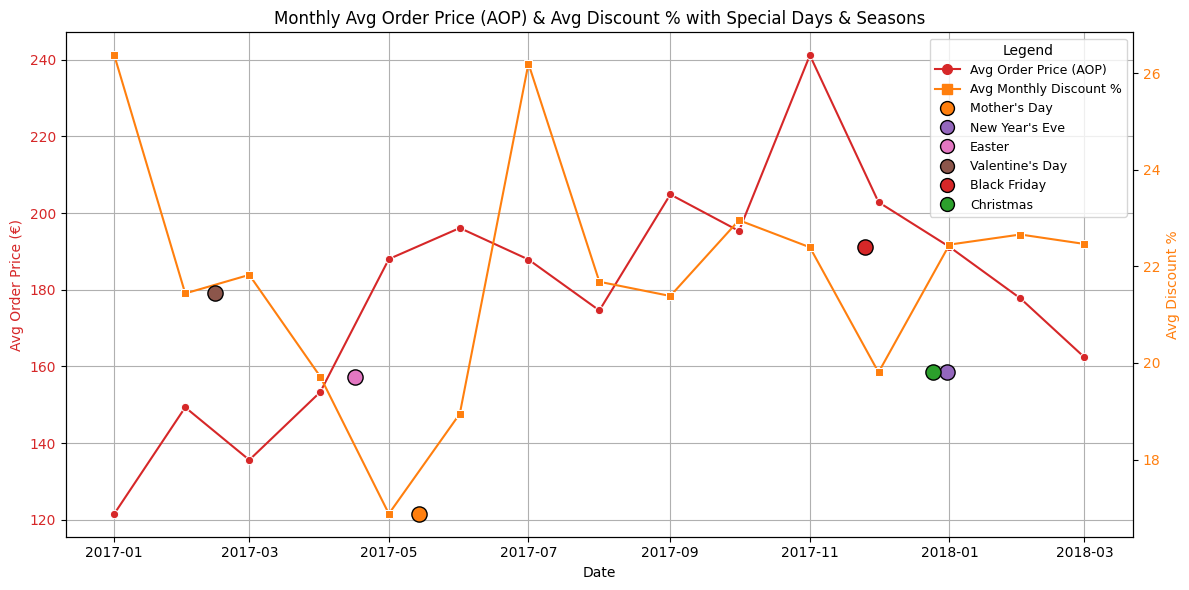

In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Christmas is exacly on 25th Dec, and Black friday is on 25th November on the plot.
# Plot point is not located on the month average but on exact day

# Ensure 'date' is datetime
orderlines_products_discount['date'] = pd.to_datetime(orderlines_products_discount['date'])

# Create 'period' column as YYYY-MM timestamp
orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').dt.to_timestamp()

# Calculate revenue per row
orderlines_products_discount['revenue'] = (
    orderlines_products_discount['unit_price'] * orderlines_products_discount['product_quantity']
)

# --- Monthly average discount percentage ---
monthly_avg_discount_pct = (
    orderlines_products_discount
    .groupby('period')['discount_percentage']
    .mean()
    .reset_index()
)

# --- Monthly total revenue and order count ---
monthly_stats = (
    orderlines_products_discount
    .groupby('period')
    .agg(total_revenue=('revenue', 'sum'),
         order_count=('order_id', 'nunique'))  # Unique order IDs per month
    .reset_index()
)

# Calculate AOP
monthly_stats['avg_order_price'] = monthly_stats['total_revenue'] / monthly_stats['order_count']

# --- Merge with discount data ---
combined_df = pd.merge(monthly_avg_discount_pct, monthly_stats, on='period', how='inner')

# --- Season assignment for special periods ---
black_friday_range = ((orderlines_products_discount['date'].dt.month == 11) &
                      (orderlines_products_discount['date'].dt.day >= 24) &
                      (orderlines_products_discount['date'].dt.day <= 30))

christmas_range = ((orderlines_products_discount['date'].dt.month == 12) &
                   (orderlines_products_discount['date'].dt.day >= 20) &
                   (orderlines_products_discount['date'].dt.day <= 26))

orderlines_products_discount['season'] = 'Regular'
orderlines_products_discount.loc[black_friday_range, 'season'] = 'Black Friday'
orderlines_products_discount.loc[christmas_range, 'season'] = 'Christmas'

# Assign season to combined_df based on period
combined_df['season'] = 'Regular'
combined_df.loc[
    combined_df['period'].isin(orderlines_products_discount.loc[black_friday_range, 'period']),
    'season'] = 'Black Friday'
combined_df.loc[
    combined_df['period'].isin(orderlines_products_discount.loc[christmas_range, 'period']),
    'season'] = 'Christmas'

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Avg Order Price (AOP) on left y-axis (red), no legend auto
sns.lineplot(
    data=combined_df,
    x='period',
    y='avg_order_price',
    marker='o',
    ax=ax1,
    color='tab:red',
    label=None  # disable auto legend here
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Order Price (€)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.grid(True)

# Avg Discount % on right y-axis (orange), no legend auto
ax2 = ax1.twinx()
sns.lineplot(
    data=combined_df,
    x='period',
    y='discount_percentage',
    marker='s',
    ax=ax2,
    color='tab:orange',
    label=None  # disable auto legend here
)
ax2.set_ylabel('Avg Discount %', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# --- Define special days with exact dates ---
special_days = {
    "Mother's Day": '2017-05-14',
    "New Year's Eve": '2017-12-31',
    "Easter": '2017-04-16',
    "Valentine's Day": '2017-02-14',
    "Black Friday": '2017-11-25',  # Exact Black Friday date
    "Christmas": '2017-12-25'      # Exact Christmas date
}

special_colors = {
    "Mother's Day": 'tab:orange',
    "New Year's Eve": 'tab:purple',
    "Easter": 'tab:pink',
    "Valentine's Day": 'tab:brown',
    "Black Friday": 'tab:red',
    "Christmas": 'tab:green'
}

special_days_dt = {k: pd.to_datetime(v) for k, v in special_days.items()}

# Plot special days dots on discount % line (right y-axis) at exact day
for day, dt_val in special_days_dt.items():
    period_start = dt_val.to_period('M').to_timestamp()
    day_data = combined_df[combined_df['period'] == period_start]
    if not day_data.empty:
        y_val = day_data['discount_percentage'].values[0]
        ax2.scatter(dt_val, y_val, s=120, color=special_colors[day], label=day,
                    zorder=6, edgecolor='black')


# --- Create manual legend ---
handles = []
labels = []

# Add lines for Avg Order Price and Avg Discount %
handles.append(plt.Line2D([0], [0], color='tab:red', marker='o', label='Avg Order Price (AOP)', markersize=7))
labels.append('Avg Order Price (AOP)')

handles.append(plt.Line2D([0], [0], color='tab:orange', marker='s', label='Avg Monthly Discount %', markersize=7))
labels.append('Avg Monthly Discount %')

# Add special days dots only (including Black Friday and Christmas)
for day, color in special_colors.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, markeredgecolor='black'))
    labels.append(day)

ax1.legend(handles=handles, labels=labels, loc='upper right', fontsize=9, title='Legend', title_fontsize=10)

plt.title('Monthly Avg Order Price (AOP) & Avg Discount % with Special Days & Seasons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Define exact dates for Black Friday and Christmas dots
black_friday_date = pd.to_datetime('2017-11-25')
christmas_date = pd.to_datetime('2017-12-25')

# Get discount % for Black Friday and Christmas months
bf_month = black_friday_date.to_period('M').to_timestamp()
xmas_month = christmas_date.to_period('M').to_timestamp()

bf_discount = combined_df.loc[combined_df['period'] == bf_month, 'discount_percentage']
xmas_discount = combined_df.loc[combined_df['period'] == xmas_month, 'discount_percentage']

# Plot Black Friday dot
if not bf_discount.empty:
    ax2.scatter(black_friday_date, bf_discount.values[0], s=150,
                color='tab:red', label='Black Friday Period',
                edgecolor='black', alpha=0.7, zorder=6)

# Plot Christmas dot
if not xmas_discount.empty:
    ax2.scatter(christmas_date, xmas_discount.values[0], s=150,
                color='tab:green', label='Christmas Period',
                edgecolor='black', alpha=0.7, zorder=6)


## AOP highllighted

<ipython-input-160-c49c306459b6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['date'] = pd.to_datetime(orderlines_products_discount['date'])
<ipython-input-160-c49c306459b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').dt.to_timestamp()
<ipython-input-160-c49c306459b6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

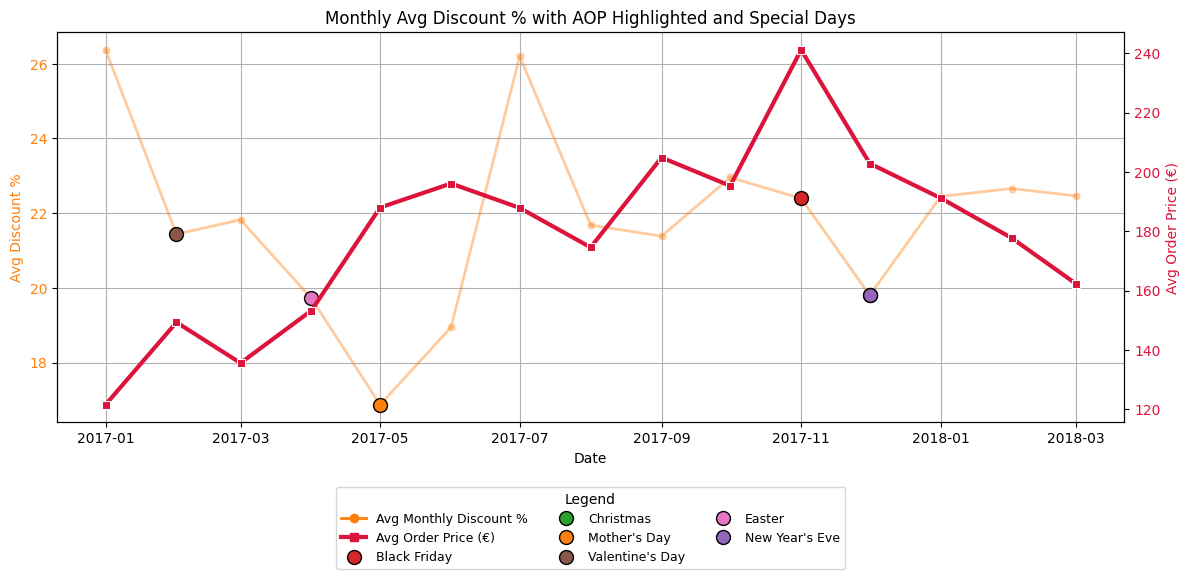

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Ensure 'date' is datetime
orderlines_products_discount['date'] = pd.to_datetime(orderlines_products_discount['date'])

# Create 'period' column as month timestamp
orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').dt.to_timestamp()

# Calculate revenue
orderlines_products_discount['revenue'] = (
    orderlines_products_discount['unit_price'] * orderlines_products_discount['product_quantity']
)

# --- Monthly Aggregation ---
monthly_avg_discount_pct = (
    orderlines_products_discount
    .groupby('period')['discount_percentage']
    .mean()
    .reset_index()
)

monthly_stats = (
    orderlines_products_discount
    .groupby('period')
    .agg(
        total_revenue=('revenue', 'sum'),
        order_count=('order_id', 'nunique')
    )
    .reset_index()
)
monthly_stats['avg_order_price'] = monthly_stats['total_revenue'] / monthly_stats['order_count']

# Merge
combined_df = pd.merge(monthly_avg_discount_pct, monthly_stats, on='period', how='inner')

# --- Define Special Dates & Seasonal Periods ---
special_days = {
    "Mother's Day": '2017-05-14',
    "Valentine's Day": '2017-02-14',
    "Easter": '2017-04-16',
    "New Year's Eve": '2017-12-31',
}
special_colors = {
    "Mother's Day": 'tab:orange',
    "Valentine's Day": 'tab:brown',
    "Easter": 'tab:pink',
    "New Year's Eve": 'tab:purple',
}

# Black Friday & Christmas periods
black_friday_months = pd.to_datetime(['2017-11-01'])
christmas_months = pd.to_datetime(['2017-12-01'])

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left axis: Avg Discount %
line1 = sns.lineplot(
    data=combined_df,
    x='period',
    y='discount_percentage',
    marker='o',
    ax=ax1,
    color='tab:orange',
    label='Avg Monthly Discount %',
    linewidth=2,
    alpha=0.4
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Discount %', color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')
ax1.grid(True)

# Right axis: AOP (highlighted)
ax2 = ax1.twinx()
line2 = sns.lineplot(
    data=combined_df,
    x='period',
    y='avg_order_price',
    marker='s',
    ax=ax2,
    color='crimson',
    linewidth=3,
    alpha=1
)
ax2.set_ylabel('Avg Order Price (€)', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# --- Highlight Special Days on Discount Line ---
for day, date_str in special_days.items():
    dt = pd.to_datetime(date_str).to_period('M').to_timestamp()
    match = combined_df[combined_df['period'] == dt]
    if not match.empty:
        y_val = match['discount_percentage'].values[0]
        ax1.scatter(dt, y_val, s=100, color=special_colors[day], label=day, zorder=5, edgecolor='black')

# --- Highlight Black Friday & Christmas months ---
for label, dates, color in [
    ('Black Friday', black_friday_months, 'tab:red'),
    ('Christmas', christmas_months, 'tab:green')
]:
    for dt in dates:
        match = combined_df[combined_df['period'] == dt]
        if not match.empty:
            y_val = match['discount_percentage'].values[0]
            ax1.scatter(dt, y_val, s=100, color=color, label=label, zorder=4, edgecolor='black')

# --- Custom Legend ---
custom_lines = [
    plt.Line2D([0], [0], color='tab:orange', marker='o', linewidth=2, label='Avg Monthly Discount %'),
    plt.Line2D([0], [0], color='crimson', marker='s', linewidth=3, label='Avg Order Price (€)'),
]

for label, color in {
    "Black Friday": 'tab:red',
    "Christmas": 'tab:green',
    **special_colors
}.items():
    custom_lines.append(
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color,
                   markeredgecolor='black', label=label, markersize=10)
    )

ax1.legend(custom_lines, [line.get_label() for line in custom_lines],
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, title='Legend', fontsize=9, title_fontsize=10)

plt.title('Monthly Avg Discount % with AOP Highlighted and Special Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-161-7eb146100efe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['date'] = pd.to_datetime(orderlines_products_discount['date'])
<ipython-input-161-7eb146100efe>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').dt.to_timestamp()
<ipython-input-161-7eb146100efe>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

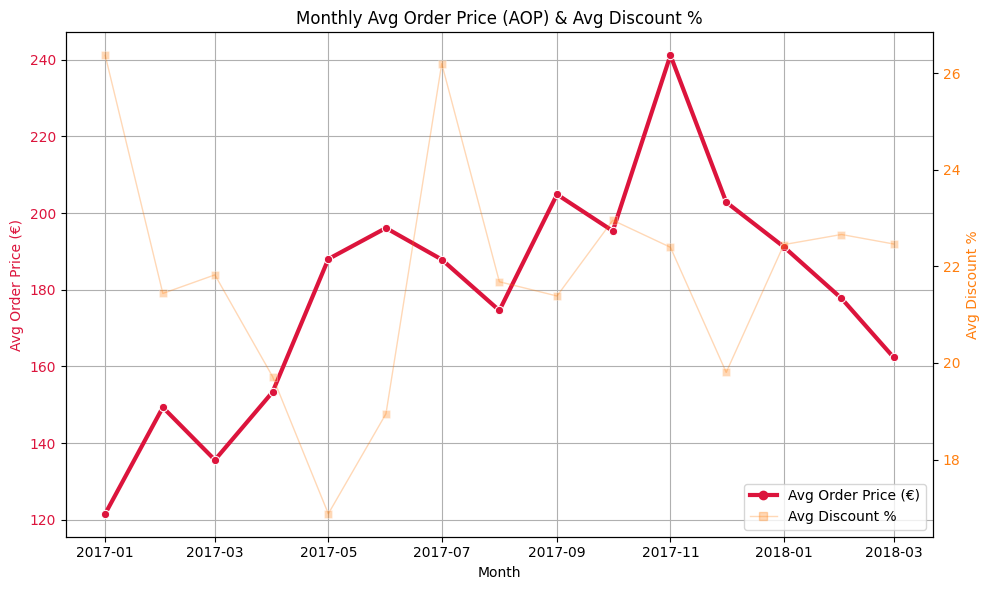

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Ensure 'date' is datetime
orderlines_products_discount['date'] = pd.to_datetime(orderlines_products_discount['date'])

# Create 'period' column for monthly grouping
orderlines_products_discount['period'] = orderlines_products_discount['date'].dt.to_period('M').dt.to_timestamp()

# Calculate revenue
orderlines_products_discount['revenue'] = (
    orderlines_products_discount['unit_price'] * orderlines_products_discount['product_quantity']
)

# --- Monthly average discount percentage ---
monthly_avg_discount_pct = (
    orderlines_products_discount
    .groupby('period')['discount_percentage']
    .mean()
    .reset_index()
)

# --- Monthly revenue and order count ---
monthly_stats = (
    orderlines_products_discount
    .groupby('period')
    .agg(
        total_revenue=('revenue', 'sum'),
        order_count=('order_id', 'nunique')
    )
    .reset_index()
)

# --- AOP Calculation ---
monthly_stats['avg_order_price'] = monthly_stats['total_revenue'] / monthly_stats['order_count']

# --- Merge dataframes ---
combined_df = pd.merge(monthly_avg_discount_pct, monthly_stats, on='period', how='inner')

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# AOP: Highlighted on left axis (crimson, bold)
sns.lineplot(
    data=combined_df,
    x='period',
    y='avg_order_price',
    marker='o',
    ax=ax1,
    color='crimson',
    linewidth=3,
    alpha=1
)
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Order Price (€)', color='crimson')
ax1.tick_params(axis='y', labelcolor='crimson')
ax1.grid(True)

# Discount %: Dimmed on right axis (orange)
ax2 = ax1.twinx()
sns.lineplot(
    data=combined_df,
    x='period',
    y='discount_percentage',
    marker='s',
    ax=ax2,
    color='tab:orange',
    linewidth=1,
    alpha=0.3
)
ax2.set_ylabel('Avg Discount %', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Custom legend matching highlight style
custom_lines = [
    plt.Line2D([0], [0], color='crimson', marker='o', linewidth=3, label='Avg Order Price (€)'),
    plt.Line2D([0], [0], color='tab:orange', marker='s', linewidth=1, alpha=0.3, label='Avg Discount %')
]
ax1.legend(handles=custom_lines, loc='lower right')

plt.title('Monthly Avg Order Price (AOP) & Avg Discount %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# By Categories

## Revenue vs Avg Discount Percentage by categories

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40449 entries, 0 to 40448
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      40449 non-null  int64         
 1   created_date  40449 non-null  datetime64[ns]
 2   total_paid    40449 non-null  float64       
 3   state         40449 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.2+ MB


changed

<ipython-input-163-14ff1a94cf93>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['revenue'] = (


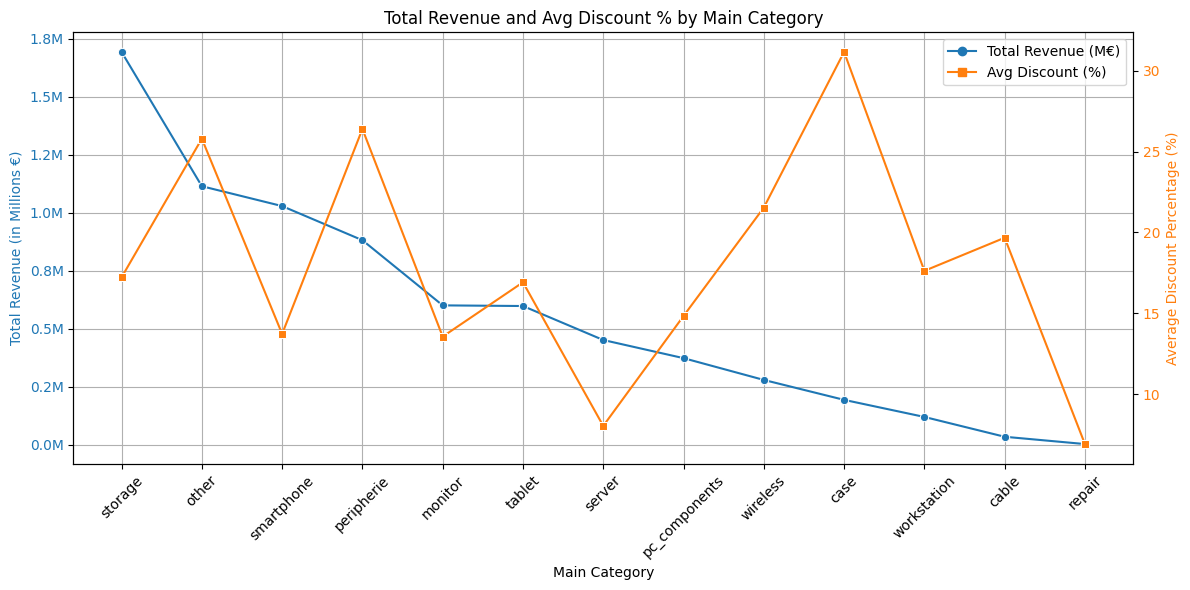

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Calculate revenue
orderlines_products_discount['revenue'] = (
    orderlines_products_discount['unit_price'] * orderlines_products_discount['product_quantity']
)

# Group by main category
grouped = orderlines_products_discount.groupby('main_category').agg({
    'revenue': 'sum',
    'discount_percentage': 'mean'
}).reset_index()

# Sort categories by total revenue
grouped = grouped.sort_values('revenue', ascending=False)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary axis: Total Revenue
color1 = 'tab:blue'
line1 = sns.lineplot(data=grouped, x='main_category', y='revenue', marker='o', ax=ax1, color=color1)
ax1.set_xlabel('Main Category')
ax1.set_ylabel('Total Revenue (in Millions €)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# Format y-axis as millions
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))

# Secondary axis: Avg Discount %
ax2 = ax1.twinx()
color2 = 'tab:orange'
line2 = sns.lineplot(data=grouped, x='main_category', y='discount_percentage', marker='s', ax=ax2, color=color2)
ax2.set_ylabel('Average Discount Percentage (%)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Combined legend
custom_lines = [
    plt.Line2D([0], [0], color=color1, marker='o', label='Total Revenue (M€)'),
    plt.Line2D([0], [0], color=color2, marker='s', label='Avg Discount (%)')
]
ax1.legend(handles=custom_lines, loc='upper right')

plt.title('Total Revenue and Avg Discount % by Main Category')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate gross revenue per row
orderlines_products_discount['gross_revenue'] = (
    orderlines_products_discount['unit_price'] * orderlines_products_discount['product_quantity']
)

# Group by main_category and calculate total revenue and average discount percentage
category_summary = orderlines_products_discount.groupby('main_category').agg({
    'gross_revenue': 'sum',
    'discount_percentage': 'mean'
}).reset_index()

# Rename the discount column for clarity
category_summary.rename(columns={'discount_percentage': 'avg_discount_percentage'}, inplace=True)


<ipython-input-164-759777ca0db2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_products_discount['gross_revenue'] = (


In [ ]:
# Filter to include only the specified categories
filtered_categories = ['storage', 'server', 'tablet', 'case']
filtered_summary = category_summary[category_summary['main_category'].isin(filtered_categories)]


## Order Counts & Avg Discount Percentage by Some Categories

<ipython-input-166-11cfad01cdd2>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-166-11cfad01cdd2>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


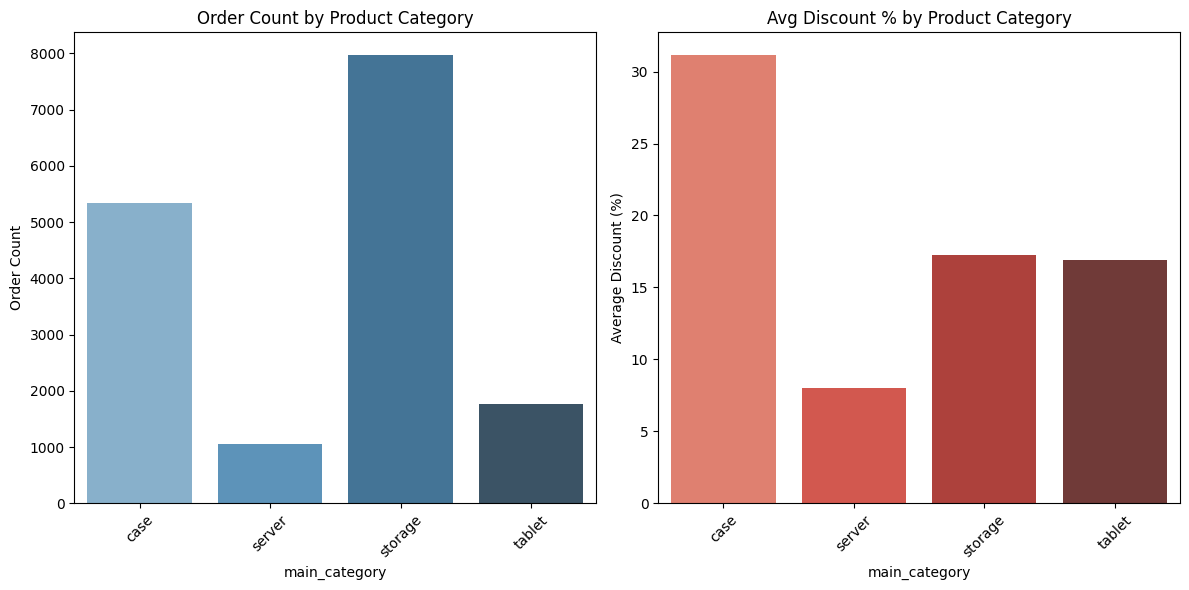

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define categories to keep and their order
order_categories = ['case', 'server', 'storage', 'tablet']

# Filter original data to keep only these categories
filtered_data = orderlines_products_discount[
    orderlines_products_discount['main_category'].isin(order_categories)
].copy()

# Calculate distinct order count per category
order_counts = (
    filtered_data.groupby('main_category')['order_id']
    .nunique()
    .reset_index(name='order_count')
)

# Calculate average discount % per category
avg_discount = (
    filtered_data.groupby('main_category')['discount_percentage']
    .mean()
    .reset_index(name='avg_discount_percentage')
)

# Merge order count and avg discount into one summary DataFrame
filtered_summary = pd.merge(order_counts, avg_discount, on='main_category')

# Plot side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(
    data=filtered_summary,
    x='main_category',
    y='order_count',
    ax=axes[0],
    palette='Blues_d',
    order=order_categories
)
axes[0].set_title('Order Count by Product Category')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Order Count')

sns.barplot(
    data=filtered_summary,
    x='main_category',
    y='avg_discount_percentage',
    ax=axes[1],
    palette='Reds_d',
    order=order_categories
)
axes[1].set_title('Avg Discount % by Product Category')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Average Discount (%)')

plt.tight_layout()
plt.show()
